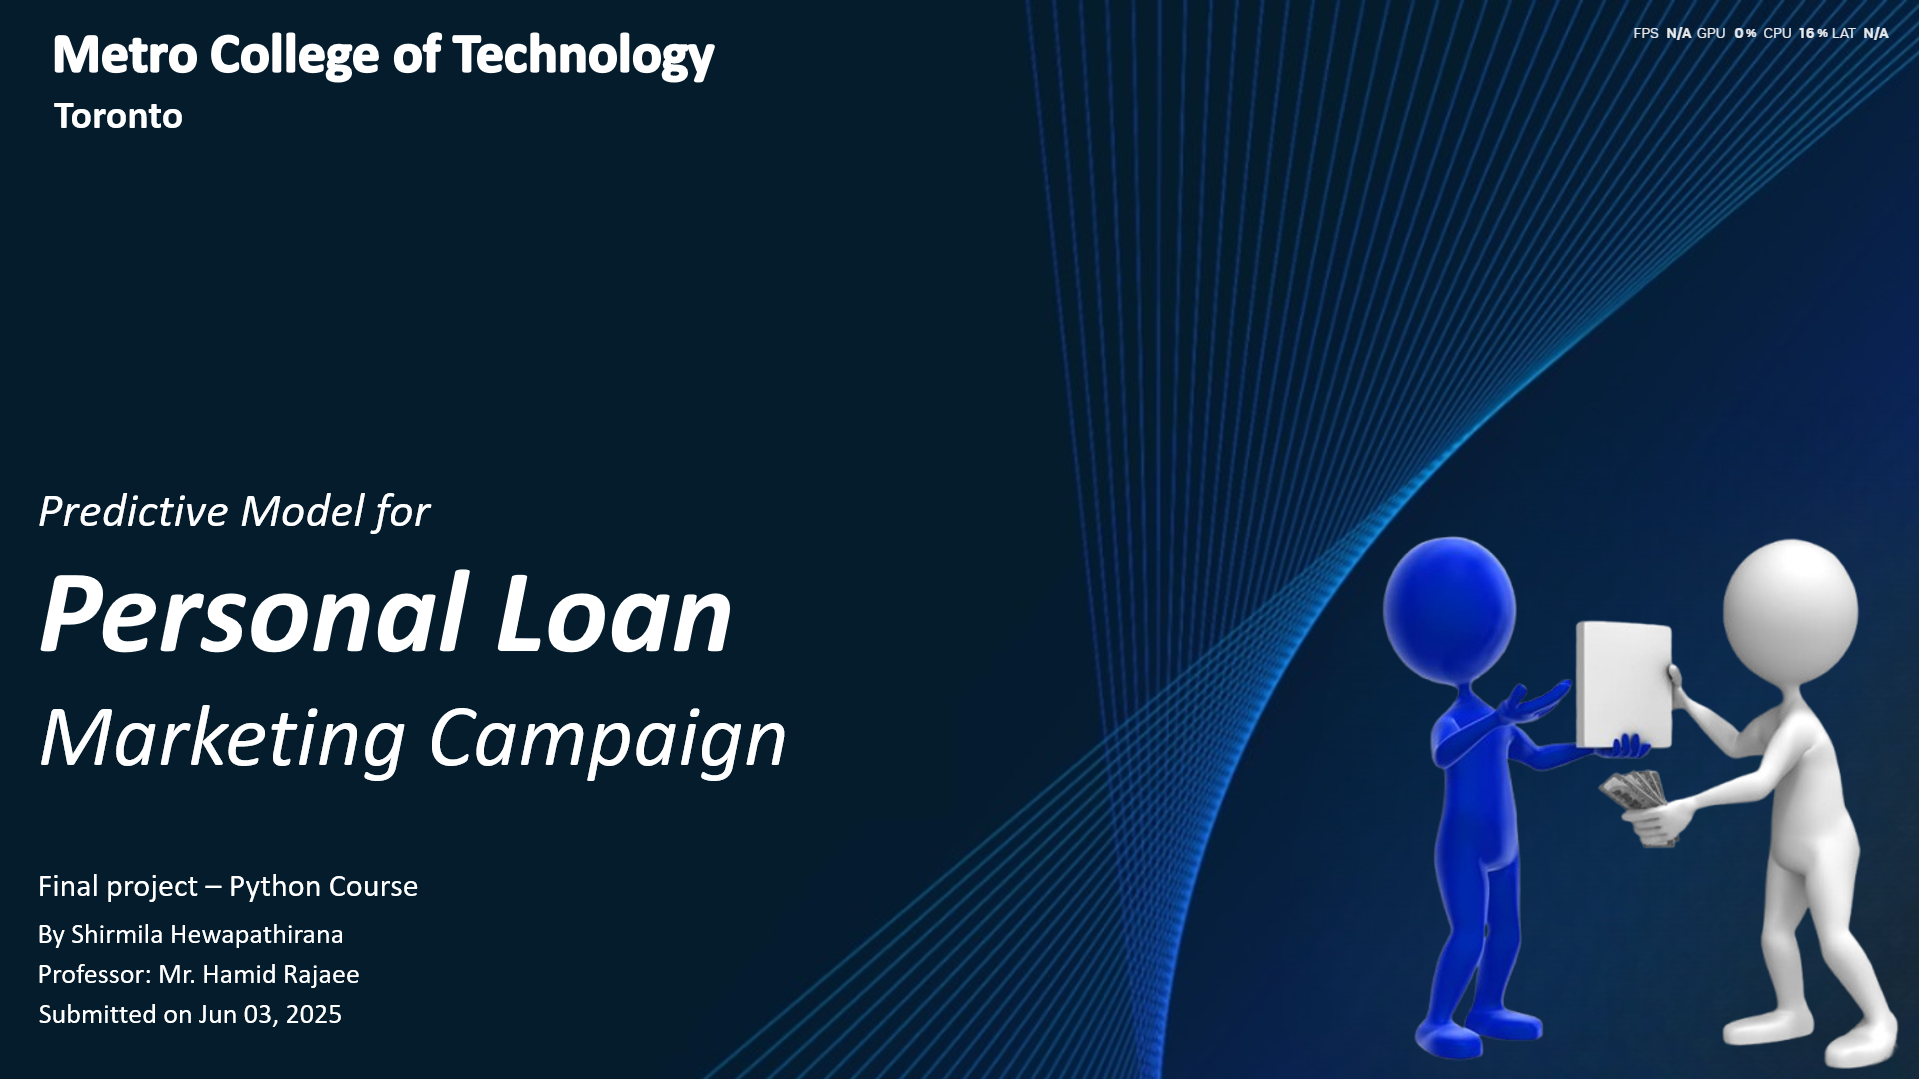

### Import Required Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Sklearn modules for modeling, splitting, and evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, validation_curve
from sklearn.metrics import (accuracy_score, precision_score, recall_score, classification_report,
                             confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score)
from sklearn.preprocessing import StandardScaler

from scipy import stats

# Statistical tests
from scipy.stats import chi2_contingency, ttest_ind, levene
import pingouin as pg

# Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Outlier Detection
from sklearn.neighbors import LocalOutlierFactor

# Classifiers and ensemble methods
from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression # ,SGDClassifier, PassiveAggressiveClassifier, RidgeClassifier, RidgeClassifierCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC #,LinearSVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier # , ExtraTreesClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# For ZIP code geocoding
import pgeocode

# For saving models
import joblib


### Change directory

In [2]:
os.chdir(r'C:\\Users\\shirm\\Data_Science\\pythonCapstoneProj')
os.getcwd()

'C:\\Users\\shirm\\Data_Science\\pythonCapstoneProj'

### Import data with csv format

In [3]:
df = pd.read_csv(r'loanClassification.csv')
df.shape

(5000, 14)

### Dictionary of features

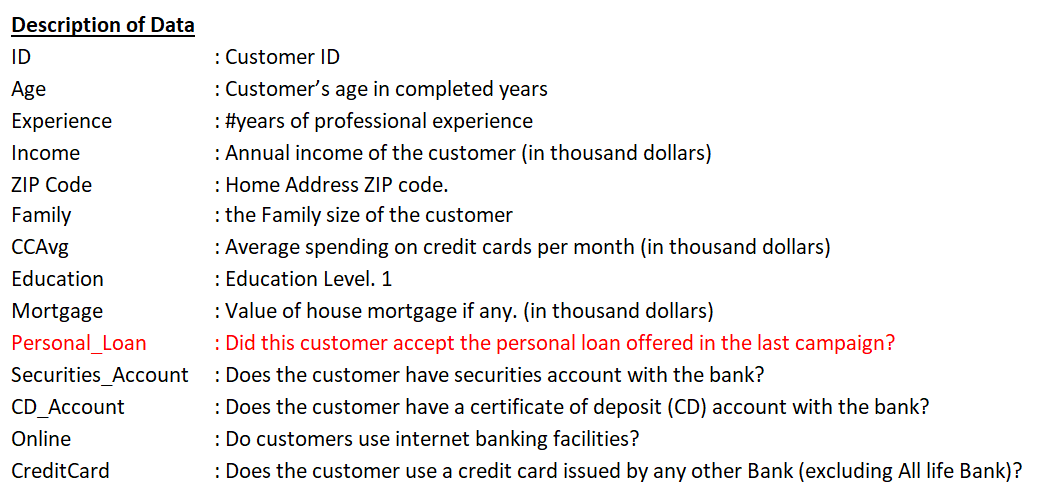

### Check head of data

In [4]:
df.head()

ID   Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1 25.00           1      49  91107.00       4   1.60          1         0   
1   2 45.00          19      34  90089.00       3   1.50          1         0   
2   3 39.00          15      11       NaN       1   1.00          1         0   
3   4 35.00           9     100  94112.00       1   2.70          2         0   
4   5 35.00           8      45  91330.00       4   1.00          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

### Check tail of data

In [5]:
df.tail()

ID   Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
4995  4996 29.00           3      40  92697.00       1   1.90          3   
4996  4997 30.00           4      15  92037.00       4   0.40          1   
4997  4998 63.00          39      24  93023.00       2   0.30          3   
4998  4999 65.00          40      49  90034.00       3   0.50          2   
4999  5000 28.00           4      83  92612.00       3   0.80          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

### Check a sample of the dataset

In [6]:
df.sample(10)

ID   Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
467    468   NaN          20      39  90232.00       1   2.40          1   
881    882 44.00          19     154  92116.00       2   8.80          1   
11      12 29.00           5      45  90277.00       3   0.10          2   
1911  1912 60.00          35      52  94709.00       3   0.50          2   
3027  3028 53.00          29      50  93305.00       4   0.10          3   
2349  2350 59.00          35      94  94610.00       1   4.30          1   
3585  3586 45.00          18      45  92037.00       3   1.00          2   
4396  4397 30.00           5      14  95014.00       4   0.50          3   
3667  3668 27.00           3      59  94590.00       4   1.60          1   
2864  2865 65.00          41      84  95762.00       2   0.00          3   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
467          0              0                   0           0       0   
881          0              0                   0           0       1   
11           0              0                   0           0       1   
1911         0              0                   0           0       0   
3027       152              0                   0           0       1   
2349        76              0                   1           1       1   
3585         0              0                   0           0       1   
4396         0              0                   0           0       1   
3667         0              0                   0           0       1   
2864         0              0                   0           0       1   

      CreditCard  
467            1  
881            0  
11             0  
1911           0  
3027           0  
2349           0  
3585           0  
4396           0  
3667           0  
2864           1

### Check data types of varibles

In [7]:
# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 4975 non-null   float64
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            4980 non-null   float64
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 547.0 KB


### Rename columns

In [8]:
df.columns = df.columns.str.lower()

In [9]:
df.rename(columns = {'zip code' : 'zipCode', 
                     'personal loan': 'personalLoan', 
                     'securities account': 'securitiesAccount', 
                     'cd account' : 'cdAccount'}, inplace=True)

In [10]:
df.columns

Index(['id', 'age', 'experience', 'income', 'zipCode', 'family', 'ccavg',
       'education', 'mortgage', 'personalLoan', 'securitiesAccount',
       'cdAccount', 'online', 'creditcard'],
      dtype='object')

### Check duplicated records

In [11]:
df.duplicated().sum()

0

If I had any duplicate records, I could drop them with
```Python
df.drop_duplicates(inplace = True)

### Check missing values

In [12]:
# df.isnull().sum()
# df.apply(lambda x: sum(x.isnull()))
df.isna().sum().sort_values(ascending=False)

age                  25
zipCode              20
id                    0
experience            0
income                0
family                0
ccavg                 0
education             0
mortgage              0
personalLoan          0
securitiesAccount     0
cdAccount             0
online                0
creditcard            0
dtype: int64

#### Calculatin no. of missing values for each column and it's percentage 

In [13]:
def percentage_of_miss():
  df1=df[df.columns[df.isnull().sum()>=1]]# I get a subset of data that contain columns that have at least one missing values
  total_miss = df1.isnull().sum().sort_values(ascending=False)
  percent_miss = (df1.isnull().sum()/df.shape[0]).sort_values(ascending=False)

  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_data)

In [14]:
percentage_of_miss()

Number of Missing  Percentage
age                     25        0.01
zipCode                 20        0.00

#### Checking Data types, Missing values, No of unique values, average and median

In [15]:
def inforamation(df):
    df_information= pd.concat([df.dtypes, df.isna().sum(), df.nunique(),df.mean(),df.median()], 
                              axis=1, 
                              keys=['Data types','Number of Missing', 'Number of uique values','Average','Median'])
    return(df_information)

In [16]:
inforamation(df)

Data types  Number of Missing  Number of uique values  \
id                     int64                  0                    5000   
age                  float64                 25                      45   
experience             int64                  0                      47   
income                 int64                  0                     162   
zipCode              float64                 20                     467   
family                 int64                  0                       4   
ccavg                float64                  0                     108   
education              int64                  0                       3   
mortgage               int64                  0                     347   
personalLoan           int64                  0                       2   
securitiesAccount      int64                  0                       2   
cdAccount              int64                  0                       2   
online                 int64                  0                       2   
creditcard             int64                  0                       2   

                   Average   Median  
id                 2500.50  2500.50  
age                  45.34    45.00  
experience           20.10    20.00  
income               73.77    64.00  
zipCode           93162.29 93407.00  
family                2.40     2.00  
ccavg                 1.94     1.50  
education             1.88     2.00  
mortgage             56.50     0.00  
personalLoan          0.10     0.00  
securitiesAccount     0.10     0.00  
cdAccount             0.06     0.00  
online                0.60     1.00  
creditcard            0.29     0.00

#### Impute missing values
- Age: with mean of age
- ZIP Code with mode of ZIP code

Keep a deep copy of the original df before alter it

In [17]:
df_original = df.copy()

In [18]:
# impute missing 'age' values by mean of 'age'
df['age'].fillna(df['age'].mean(), inplace=True)

# impute missing 'zipCode' values by mode of 'zipCode'
df['zipCode'].fillna(df['zipCode'].mode()[0], inplace=True)

In [19]:
df.isna().sum().sum()

0

### Check descriptive statistics of the dataset

In [20]:
df.describe().T

count     mean     std      min      25%      50%  \
id                5000.00  2500.50 1443.52     1.00  1250.75  2500.50   
age               5000.00    45.34   11.46    23.00    35.00    45.34   
experience        5000.00    20.10   11.47    -3.00    10.00    20.00   
income            5000.00    73.77   46.03     8.00    39.00    64.00   
zipCode           5000.00 93168.52 1758.15 90005.00 91911.00 93437.00   
family            5000.00     2.40    1.15     1.00     1.00     2.00   
ccavg             5000.00     1.94    1.75     0.00     0.70     1.50   
education         5000.00     1.88    0.84     1.00     1.00     2.00   
mortgage          5000.00    56.50  101.71     0.00     0.00     0.00   
personalLoan      5000.00     0.10    0.29     0.00     0.00     0.00   
securitiesAccount 5000.00     0.10    0.31     0.00     0.00     0.00   
cdAccount         5000.00     0.06    0.24     0.00     0.00     0.00   
online            5000.00     0.60    0.49     0.00     0.00     1.00   
creditcard        5000.00     0.29    0.46     0.00     0.00     0.00   

                       75%      max  
id                 3750.25  5000.00  
age                  55.00    67.00  
experience           30.00    43.00  
income               98.00   224.00  
zipCode           94608.00 96150.00  
family                3.00     4.00  
ccavg                 2.50    10.00  
education             3.00     3.00  
mortgage            101.00   635.00  
personalLoan          0.00     1.00  
securitiesAccount     0.00     1.00  
cdAccount             0.00     1.00  
online                1.00     1.00  
creditcard            1.00     1.00

In [21]:
# df.describe(include='all')
# df.describe(include='object')
df.astype('object').describe().T

count  unique      top    freq
id                5000.00 5000.00     1.00    1.00
age               5000.00   46.00    35.00  151.00
experience        5000.00   47.00    32.00  154.00
income            5000.00  162.00    44.00   85.00
zipCode           5000.00  467.00 94720.00  169.00
family            5000.00    4.00     1.00 1472.00
ccavg             5000.00  108.00     0.30  241.00
education         5000.00    3.00     1.00 2096.00
mortgage          5000.00  347.00     0.00 3462.00
personalLoan      5000.00    2.00     0.00 4520.00
securitiesAccount 5000.00    2.00     0.00 4478.00
cdAccount         5000.00    2.00     0.00 4698.00
online            5000.00    2.00     1.00 2984.00
creditcard        5000.00    2.00     0.00 3530.00

#### Check unique levels of features in detail

In [22]:
for col in df.columns:
    print (f'\nFrequency of levels for {col} column')
    print('='*(len(col)+31))
    print(df[col].value_counts())


Frequency of levels for id column
id
1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
5000    1
Name: count, Length: 5000, dtype: int64

Frequency of levels for age column
age
35.00    151
43.00    149
52.00    145
54.00    143
58.00    143
50.00    138
41.00    136
30.00    136
56.00    135
34.00    134
39.00    133
57.00    132
59.00    132
51.00    129
60.00    127
46.00    127
42.00    126
55.00    125
31.00    125
40.00    125
29.00    123
62.00    123
61.00    122
44.00    121
32.00    120
33.00    120
48.00    118
38.00    115
49.00    115
47.00    113
53.00    112
63.00    108
36.00    107
37.00    106
28.00    103
45.00    102
27.00     91
65.00     80
64.00     78
26.00     78
25.00     53
24.00     28
45.34     25
66.00     24
67.00     12
23.00     12
Name: count, dtype: int64

Frequency of levels for experience column
experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18   

#### Observations
- 'id' is not an essential feature for this analysis. Hence, we can drop it.
- We can tri to reduce levels of 'age', 'income' and 'spending' by binning.
- Negetive values in 'experience' need to be investigated.
- May be location zipCode be a good feature for prediction. However, in order to use the location as afeature for analysis we need to downsize the number of levels in 'zipCode'
- Even though 'family', 'education', 'personalLoan', 'securitiesAccount', 'cdAccount', 'online', 'creditcard' and 'zipCode' features carry numerical values based on the umber of levels it carry we need to consider them as categorical features.

### Drop 'id' feature

In [23]:
df.drop(columns='id', inplace=True)

### Binning 'age', 'income', 'spending'

#### 'age'
- 'age' can be a vital factor in borrowing loan, splitting age into bins would help us to explore any patterns

In [24]:
df['ageBin'] = pd.cut(df['age'], bins = [21, 30, 40, 50, 60, 70], labels = ['21-30', '31-40', '41-50', '51-60', '61-70'])

#### 'income'
- To understand customers segments derving new columns which will help us identify if customer belongs to Upper , middle or lower income group

In [25]:
df["incomeBin"] = pd.cut(x=df["income"], bins=[0, 50, 140, 224], labels=["lower", "middle", "high"])

#### 'spending' 
- To understand customers spending derving new columns which will say if customer belongs to Upper , middle or lower spending

In [26]:
df["spendingBin"] = pd.cut( x=df["ccavg"], bins=[0.00000, 0.70000, 2.50000, 10.00000], labels=["low", "medium", "high"],include_lowest=True)

In [27]:
# df.drop(columns='ageBin', inplace=True)

In [28]:
df.sample(10)

age  experience  income  zipCode  family  ccavg  education  mortgage  \
4571 58.00          28      95 94304.00       1   3.00          3         0   
3817 65.00          40     140 92093.00       1   0.90          1         0   
4127 43.00          19      82 95758.00       2   1.80          2         0   
3638 47.00          22      38 92866.00       4   1.90          3         0   
4414 33.00           8     178 94720.00       3   8.50          1         0   
555  34.00           8      35 92037.00       4   0.80          1       137   
1398 42.00          18     141 93407.00       1   3.50          1         0   
2969 43.00          18      60 95039.00       2   2.20          3       115   
3833 33.00           9      83 93943.00       1   0.10          1         0   
546  27.00           2      68 94025.00       3   2.60          3       203   

      personalLoan  securitiesAccount  cdAccount  online  creditcard ageBin  \
4571             0                  0          0       0           0  51-60   
3817             0                  0          0       0           0  61-70   
4127             0                  0          0       1           1  41-50   
3638             0                  0          0       1           0  41-50   
4414             1                  1          1       1           0  31-40   
555              0                  0          1       1           1  31-40   
1398             0                  0          0       0           0  41-50   
2969             0                  0          0       0           0  41-50   
3833             0                  0          0       1           0  31-40   
546              0                  1          0       0           0  21-30   

     incomeBin spendingBin  
4571    middle        high  
3817    middle      medium  
4127    middle      medium  
3638     lower      medium  
4414      high        high  
555      lower      medium  
1398      high        high  
2969    middle      medium  
3833    middle         low  
546     middle        high

### Explore negetive values in 'experience'

In [29]:
df[df['experience'] < 0 ]['age'].describe()

count   52.00
mean    24.52
std      1.48
min     23.00
25%     24.00
50%     24.00
75%     25.00
max     29.00
Name: age, dtype: float64

- 52 customers within the ages of 23-29 are holding negetive values as experience.
- Either I can replace negetive values with 0 or I need to explore deep to take a decision.
- I prefer to explore this a bit more and then treat the negetive values.

In [30]:
df[df['experience'] < 0].sort_values(by='experience', ascending=True)

age  experience  income  zipCode  family  ccavg  education  mortgage  \
4514 24.00          -3      41 91768.00       4   1.00          3         0   
2618 23.00          -3      55 92704.00       3   2.40          2       145   
4285 23.00          -3     149 93555.00       2   7.20          1         0   
3626 24.00          -3      28 90089.00       4   1.00          3         0   
2717 23.00          -2      45 95422.00       4   0.60          2         0   
2876 24.00          -2      80 91107.00       2   1.60          3       238   
3130 23.00          -2      82 92152.00       2   1.80          2         0   
2466 24.00          -2      80 94105.00       2   1.60          3         0   
3796 24.00          -2      50 94920.00       3   2.40          2         0   
2962 23.00          -2      81 91711.00       2   1.80          2         0   
793  24.00          -2     150 94720.00       2   2.00          1         0   
3887 24.00          -2     118 92634.00       2   7.20          1         0   
889  24.00          -2      82 91103.00       2   1.60          3         0   
597  24.00          -2     125 92835.00       2   7.20          1         0   
315  24.00          -2      51 90630.00       3   0.30          3         0   
451  28.00          -2      48 94132.00       2   1.75          3        89   
4116 24.00          -2     135 90065.00       2   7.20          1         0   
4481 25.00          -2      35 95045.00       4   1.00          3         0   
4411 23.00          -2      75 90291.00       2   1.80          2         0   
4015 25.00          -1     139 93106.00       2   2.00          1         0   
3157 23.00          -1      13 94720.00       4   1.00          1        84   
3279 26.00          -1      44 94901.00       1   2.00          2         0   
3284 25.00          -1     101 95819.00       4   2.10          3         0   
3292 25.00          -1      13 95616.00       4   0.40          1         0   
3394 25.00          -1     113 90089.00       4   2.10          3         0   
3425 23.00          -1      12 91605.00       4   1.00          1        90   
4088 29.00          -1      71 94801.00       2   1.75          3         0   
3824 23.00          -1      12 95064.00       4   1.00          1         0   
3946 25.00          -1      40 93117.00       3   2.40          2         0   
3076 29.00          -1      62 92672.00       2   1.75          3         0   
89   25.00          -1     113 94303.00       4   2.30          3         0   
2848 24.00          -1      78 94720.00       2   1.80          2         0   
226  24.00          -1      39 94085.00       2   1.70          2         0   
524  24.00          -1      75 93014.00       4   0.20          1         0   
536  25.00          -1      43 92173.00       3   2.40          2       176   
540  25.00          -1     109 94010.00       4   2.30          3       314   
576  25.00          -1      48 92870.00       3   0.30          3         0   
583  24.00          -1      38 95045.00       2   1.70          2         0   
649  25.00          -1      82 92677.00       4   2.10          3         0   
670  23.00          -1      61 92374.00       4   2.60          1       239   
2980 25.00          -1      53 94305.00       3   2.40          2         0   
686  24.00          -1      38 92612.00       4   0.60          2         0   
1173 24.00          -1      35 94305.00       2   1.70          2         0   
1428 25.00          -1      21 94583.00       4   0.40          1        90   
1522 25.00          -1     101 94720.00       4   2.30          3       256   
1905 25.00          -1     112 92507.00       2   2.00          1       241   
2102 25.00          -1      81 92647.00       2   1.60          3         0   
2430 23.00          -1      73 92120.00       4   2.60          1         0   
2545 25.00          -1      39 94720.00       3   2.40          2         0   
4582 25.00          -1      69 92691.00       3   0.30   

Let's check 'experience' with 'age' and 'education' to have a better understanding whether these negetive values are mear typo errors or not.

In [31]:
df.groupby(['age', 'education'])['experience'].describe().head(20)

count  mean  std   min   25%   50%   75%   max
age   education                                                
23.00 1           7.00 -1.29 0.76 -3.00 -1.00 -1.00 -1.00 -1.00
      2           5.00 -2.20 0.45 -3.00 -2.00 -2.00 -2.00 -2.00
24.00 1          13.00 -0.69 0.95 -2.00 -2.00  0.00  0.00  0.00
      2           8.00 -0.88 0.64 -2.00 -1.00 -1.00 -0.75  0.00
      3           7.00 -2.00 1.00 -3.00 -2.50 -2.00 -2.00  0.00
25.00 1          23.00  0.52 0.79 -1.00  0.00  1.00  1.00  1.00
      2          11.00 -0.27 0.65 -1.00 -1.00  0.00  0.00  1.00
      3          19.00 -0.53 0.70 -2.00 -1.00 -1.00  0.00  1.00
26.00 1          30.00  1.43 0.82  0.00  1.00  2.00  2.00  2.00
      2          24.00  0.75 0.85 -1.00  0.00  1.00  1.00  2.00
      3          24.00  0.58 0.72  0.00  0.00  0.00  1.00  2.00
27.00 1          39.00  2.46 0.76  1.00  2.00  3.00  3.00  3.00
      2          24.00  1.67 1.05  0.00  1.00  1.50  3.00  3.00
      3          28.00  1.39 0.99  0.00  1.00  1.00  2.00  3.00
28.00 1          47.00  3.26 0.77  2.00  3.00  3.00  4.00  4.00
      2          34.00  2.91 0.93  1.00  2.00  3.00  4.00  4.00
      3          22.00  2.41 1.18 -2.00  2.00  2.50  3.00  4.00
29.00 1          50.00  4.08 0.90  3.00  3.00  4.00  5.00  5.00
      2          38.00  3.79 1.12  2.00  3.00  4.00  5.00  5.00
      3          35.00  3.11 1.62 -1.00  3.00  3.00  4.00  5.00

In [32]:
df[df['experience'] < 0].groupby(['age', 'education']).describe().head(20)

experience                                          income  \
                     count  mean  std   min   25%   50%   75%   max  count   
age   education                                                              
23.00 1               7.00 -1.29 0.76 -3.00 -1.00 -1.00 -1.00 -1.00   7.00   
      2               5.00 -2.20 0.45 -3.00 -2.00 -2.00 -2.00 -2.00   5.00   
24.00 1               5.00 -1.80 0.45 -2.00 -2.00 -2.00 -2.00 -1.00   5.00   
      2               6.00 -1.17 0.41 -2.00 -1.00 -1.00 -1.00 -1.00   6.00   
      3               6.00 -2.33 0.52 -3.00 -2.75 -2.00 -2.00 -2.00   6.00   
25.00 1               4.00 -1.00 0.00 -1.00 -1.00 -1.00 -1.00 -1.00   4.00   
      2               4.00 -1.00 0.00 -1.00 -1.00 -1.00 -1.00 -1.00   4.00   
      3              10.00 -1.10 0.32 -2.00 -1.00 -1.00 -1.00 -1.00  10.00   
26.00 2               1.00 -1.00  NaN -1.00 -1.00 -1.00 -1.00 -1.00   1.00   
28.00 3               1.00 -2.00  NaN -2.00 -2.00 -2.00 -2.00 -2.00   1.00   
29.00 3               3.00 -1.00 0.00 -1.00 -1.00 -1.00 -1.00 -1.00   3.00   

                        ... online      creditcard                           \
                  mean  ...    75%  max      count mean  std  min  25%  50%   
age   education         ...                                                   
23.00 1          67.00  ...   1.00 1.00       7.00 0.29 0.49 0.00 0.00 0.00   
      2          67.60  ...   1.00 1.00       5.00 0.60 0.55 0.00 0.00 1.00   
24.00 1         120.60  ...   1.00 1.00       5.00 0.20 0.45 0.00 0.00 0.00   
      2          46.33  ...   0.75 1.00       6.00 0.00 0.00 0.00 0.00 0.00   
      3          60.33  ...   1.00 1.00       6.00 0.17 0.41 0.00 0.00 0.00   
25.00 1          71.25  ...   1.00 1.00       4.00 0.25 0.50 0.00 0.00 0.00   
      2          43.75  ...   1.00 1.00       4.00 0.00 0.00 0.00 0.00 0.00   
      3          85.20  ...   1.00 1.00      10.00 0.50 0.53 0.00 0.00 0.50   
26.00 2          44.00  ...   0.00 0.00       1.00 0.00  NaN 0.00 0.00 0.00   
28.00 3          48.00  ...   1.00 1.00       1.00 0.00  NaN 0.00 0.00 0.00   
29.00 3          61.00  ...   0.00 0.00       3.00 0.67 0.58 0.00 0.50 1.00   

                           
                 75%  max  
age   education            
23.00 1         0.50 1.00  
      2         1.00 1.00  
24.00 1         0.00 1.00  
      2         0.00 0.00  
      3         0.00 1.00  
25.00 1         0.25 1.00  
      2         0.00 0.00  
      3         1.00 1.00  
26.00 2         0.00 0.00  
28.00 3         0.00 0.00  
29.00 3         1.00 1.00  

[11 rows x 88 columns]

It seems that experience values are negative for almost all observations of age 23 and mostof ages 24, 25 and a few others. \
Given their age and education levels, these negative values would be treated as typo errors. \
To rectify this, they will be converted to absolute values.

In [33]:
df.loc[df['experience']<0,'experience'] = np.abs(df['experience'])
print(len(df[df['experience'] < 0 ]['age']))

0


### Downsize 'zipCode'

We can try to downsize the 'zipCode' by xpanding the area to either 'counties' or 'regions' relevant to them. \
For this task we can use the 'pgeodode' libraryin Python (ref: https://pgeocode.readthedocs.io/en/latest/)\

note: Initially I tried this by loading a different dataset containing zip details and merged it with the dataset by 'zipCode'

In [34]:
# !pip install uszipcode
# !pip install --upgrade sqlalchemy_mate
# !pip install pgeocode

#### Find the Counties in respect of zip code

In [35]:
# import pgeocode
# Initialize the geocoder for US
nomi = pgeocode.Nominatim('US')
# Ensure ZIP codes are strings without decimals
zipCodes = df.zipCode.dropna().astype(int).astype(str).unique()
# Get location information for each ZIP code
locationData = [nomi.query_postal_code(zipCode).to_dict() for zipCode in zipCodes]
# Convert to a DataFrame
dfZip = pd.DataFrame(locationData)
# Display relevant columns
# print(df_zip[['postalCode', 'placeName', 'countyName', 'stateName']])
dfZip[['postal_code', 'place_name', 'county_name', 'state_name']].head()

postal_code     place_name                       county_name  state_name
0       91107       Pasadena                       Los Angeles  California
1       90089    Los Angeles                       Los Angeles  California
2       94720       Berkeley                           Alameda  California
3       94112  San Francisco  City and County of San Francisco  California
4       91330     Northridge                       Los Angeles  California

In [36]:
dfZip.describe(include=object)

postal_code country_code   place_name  state_name state_code  \
count          467          464          464         464        464   
unique         467            1          245           1          1   
top          91107           US  Los Angeles  California         CA   
freq             1          464           35         464        464   

        county_name  
count           464  
unique           38  
top     Los Angeles  
freq            116

It is observed that out of 467 zip codes 464 are pertaining to 38 counties in the California state.

### Only 'postal_code' and 'county_name' are relevant to us for this analysis

In [37]:
dfCounty = dfZip[['postal_code', 'county_name']]
dfCounty

postal_code                       county_name
0         91107                       Los Angeles
1         90089                       Los Angeles
2         94720                           Alameda
3         94112  City and County of San Francisco
4         91330                       Los Angeles
..          ...                               ...
462       90068                       Los Angeles
463       94970                             Marin
464       90813                       Los Angeles
465       94404                         San Mateo
466       94598                      Contra Costa

[467 rows x 2 columns]

In [38]:
dfCounty[dfCounty['county_name'].isna()]

postal_code county_name
79        92717         NaN
236       92634         NaN
293       92709         NaN

Seems the above zip codes r not included in 'pgeocode' library\
Lets Google to find above postal_codes ['92717', '92634', '92709'].\
(ref: https://www.zipdatamaps.com/96051)

In [39]:
missingPostalCodes = {'92717':'Orange', '92634':'Orange', '92709': 'Orange',} 
dfCounty['county_name'] = dfCounty['postal_code'].map(missingPostalCodes).fillna(dfCounty['county_name'])
print(len(dfCounty[dfCounty['county_name'].isna()]))

0


#### Merge df and dfCounty

In [40]:
df['zipCode'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: zipCode
Non-Null Count  Dtype  
--------------  -----  
5000 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB


In [41]:
dfCounty['postal_code'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 467 entries, 0 to 466
Series name: postal_code
Non-Null Count  Dtype 
--------------  ----- 
467 non-null    object
dtypes: object(1)
memory usage: 3.8+ KB


#### change data type of 'postal_code' to 'float64' to merge dfCounty with df

In [42]:
# df_county['postal_code'].astype(float64)
dfCounty['postal_code'] = dfCounty['postal_code'].astype('float64')

#### Merge df and dfCounty

In [43]:
df = df.merge(dfCounty, left_on='zipCode', right_on='postal_code', how='left').drop(columns='postal_code')
df.head()

age  experience  income  zipCode  family  ccavg  education  mortgage  \
0 25.00           1      49 91107.00       4   1.60          1         0   
1 45.00          19      34 90089.00       3   1.50          1         0   
2 39.00          15      11 94720.00       1   1.00          1         0   
3 35.00           9     100 94112.00       1   2.70          2         0   
4 35.00           8      45 91330.00       4   1.00          2         0   

   personalLoan  securitiesAccount  cdAccount  online  creditcard ageBin  \
0             0                  1          0       0           0  21-30   
1             0                  1          0       0           0  41-50   
2             0                  0          0       0           0  31-40   
3             0                  0          0       0           0  31-40   
4             0                  0          0       0           1  31-40   

  incomeBin spendingBin                       county_name  
0     lower      medium                       Los Angeles  
1     lower      medium                       Los Angeles  
2     lower      medium                           Alameda  
3    middle        high  City and County of San Francisco  
4     lower      medium                       Los Angeles

In [44]:
df.isna().sum().sum()

0

In [45]:
df['county_name'].nunique()

38

- We still have 38 levels for the location. \
- Lets Google how to bin these counties under regions which inturn will help for modeling.
- Converting the county to regions can be done based on data available in https://www.calbhbc.org/region-map-and-listing.html
- Based on the data available in the above website, we need to create a dictionary {'county_name' : 'region'} and connect region in to the dataframe.

In [46]:
counties = {
    'Alameda' : 'Bay area', 'City and County of San Francisco' : 'Bay area', 'Monterey' : 'Bay area', 'Marin' : 'Bay area', 'Santa Clara' : 'Bay area', 
    'Santa Cruz' : 'Bay area', 'San Mateo' : 'Bay area', 'Contra Costa' : 'Bay area', 'Sonoma' : 'Bay area', 'San Benito' : 'Bay area', 'Solano' : 'Bay area', 
    'Napa' : 'Bay area', 'Sacramento' : 'Central', 'Yolo' : 'Central', 'Placer' : 'Central', 'Fresno' : 'Central', 'El Dorado' : 'Central', 'San Joaquin' : 'Central', 
    'Merced' : 'Central', 'Stanislaus' : 'Central', 'Tuolumne' : 'Central', 'Los Angeles' : 'Los Angeles', 'San Diego' : 'Southern', 'Ventura' : 'Southern', 
    'Santa Barbara' : 'Southern', 'Orange' : 'Southern', 'San Bernardino' : 'Southern', 'San Luis Obispo' : 'Southern', 'Riverside' : 'Southern', 'Kern' : 'Southern', 
    'Imperial' : 'Southern', 'Humboldt' : 'Superior', 'Butte' : 'Superior', 'Mendocino' : 'Superior', 'Siskiyou' : 'Superior', 'Trinity' : 'Superior', 
    'Shasta' : 'Superior', 'Lake' : 'Superior'
}

In [47]:
df['region'] = df['county_name'].map(counties)
df.sample(5)

age  experience  income  zipCode  family  ccavg  education  mortgage  \
3618 35.00           8      48 92697.00       2   1.00          2         0   
1747 29.00           5      21 90717.00       4   0.40          2        89   
1647 35.00           5      68 90509.00       4   1.80          3         0   
2218 38.00          13       9 92634.00       2   0.30          2         0   
767  64.00          39      38 92024.00       1   1.10          3       108   

      personalLoan  securitiesAccount  cdAccount  online  creditcard ageBin  \
3618             0                  0          0       1           0  31-40   
1747             0                  0          0       0           1  21-30   
1647             0                  0          0       0           0  31-40   
2218             0                  0          0       0           0  31-40   
767              0                  0          0       0           0  61-70   

     incomeBin spendingBin  county_name       region  
3618     lower      medium       Orange     Southern  
1747     lower         low  Los Angeles  Los Angeles  
1647    middle      medium  Los Angeles  Los Angeles  
2218     lower         low       Orange     Southern  
767      lower      medium    San Diego     Southern

In [48]:
df['region'].isna().sum()

0

In [49]:
df['region'].value_counts()

region
Bay area       1937
Southern       1450
Los Angeles    1095
Central         420
Superior         98
Name: count, dtype: int64

#### Keep a copy of the df

In [50]:
df_original2 = df.copy()

### Let's convert categorical type features to 'category' data type

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                5000 non-null   float64 
 1   experience         5000 non-null   int64   
 2   income             5000 non-null   int64   
 3   zipCode            5000 non-null   float64 
 4   family             5000 non-null   int64   
 5   ccavg              5000 non-null   float64 
 6   education          5000 non-null   int64   
 7   mortgage           5000 non-null   int64   
 8   personalLoan       5000 non-null   int64   
 9   securitiesAccount  5000 non-null   int64   
 10  cdAccount          5000 non-null   int64   
 11  online             5000 non-null   int64   
 12  creditcard         5000 non-null   int64   
 13  ageBin             5000 non-null   category
 14  incomeBin          5000 non-null   category
 15  spendingBin        5000 non-null   category
 16  county

In [52]:
df.nunique()

age                   46
experience            44
income               162
zipCode              467
family                 4
ccavg                108
education              3
mortgage             347
personalLoan           2
securitiesAccount      2
cdAccount              2
online                 2
creditcard             2
ageBin                 5
incomeBin              3
spendingBin            3
county_name           38
region                 5
dtype: int64

In [53]:
catFeatures = ['zipCode', 'family','education', 'personalLoan', 
               'securitiesAccount', 'cdAccount', 'online', 'creditcard', 
               'ageBin', 'incomeBin', 'spendingBin', 'county_name', 'region']
df[catFeatures] = df[catFeatures].astype('category')

In [54]:
numFeatures = ['age', 'experience','income', 'ccavg', 'mortgage']

In [55]:
print(f'Categorical Features:\n{catFeatures}\n\nNumerical Features::\n{numFeatures}')

Categorical Features:
['zipCode', 'family', 'education', 'personalLoan', 'securitiesAccount', 'cdAccount', 'online', 'creditcard', 'ageBin', 'incomeBin', 'spendingBin', 'county_name', 'region']

Numerical Features::
['age', 'experience', 'income', 'ccavg', 'mortgage']


In [56]:
print(f'{df[catFeatures].shape} + {df[numFeatures].shape} = {df.shape}')

(5000, 13) + (5000, 5) = (5000, 18)


## Univatiate Analysis

### The statistical summary of the dataset

#### Descriptive Statistic

In [57]:
pd.options.display.float_format = "{:.2f}".format
df.describe().T

count  mean    std   min   25%   50%    75%    max
age        5000.00 45.34  11.46 23.00 35.00 45.34  55.00  67.00
experience 5000.00 20.13  11.42  0.00 10.00 20.00  30.00  43.00
income     5000.00 73.77  46.03  8.00 39.00 64.00  98.00 224.00
ccavg      5000.00  1.94   1.75  0.00  0.70  1.50   2.50  10.00
mortgage   5000.00 56.50 101.71  0.00  0.00  0.00 101.00 635.00

In [58]:
df.describe(include=['category']).T

count unique          top   freq
zipCode           5000.00 467.00     94720.00 169.00
family               5000      4            1   1472
education            5000      3            1   2096
personalLoan         5000      2            0   4520
securitiesAccount    5000      2            0   4478
cdAccount            5000      2            0   4698
online               5000      2            1   2984
creditcard           5000      2            0   3530
ageBin               5000      5        51-60   1323
incomeBin            5000      3       middle   2524
spendingBin          5000      3       medium   2371
county_name          5000     38  Los Angeles   1095
region               5000      5     Bay area   1937

In [59]:
df.describe(include='all').T

count unique          top    freq  mean    std   min  \
age               5000.00    NaN          NaN     NaN 45.34  11.46 23.00   
experience        5000.00    NaN          NaN     NaN 20.13  11.42  0.00   
income            5000.00    NaN          NaN     NaN 73.77  46.03  8.00   
zipCode           5000.00 467.00     94720.00  169.00   NaN    NaN   NaN   
family            5000.00   4.00         1.00 1472.00   NaN    NaN   NaN   
ccavg             5000.00    NaN          NaN     NaN  1.94   1.75  0.00   
education         5000.00   3.00         1.00 2096.00   NaN    NaN   NaN   
mortgage          5000.00    NaN          NaN     NaN 56.50 101.71  0.00   
personalLoan      5000.00   2.00         0.00 4520.00   NaN    NaN   NaN   
securitiesAccount 5000.00   2.00         0.00 4478.00   NaN    NaN   NaN   
cdAccount         5000.00   2.00         0.00 4698.00   NaN    NaN   NaN   
online            5000.00   2.00         1.00 2984.00   NaN    NaN   NaN   
creditcard        5000.00   2.00         0.00 3530.00   NaN    NaN   NaN   
ageBin               5000      5        51-60    1323   NaN    NaN   NaN   
incomeBin            5000      3       middle    2524   NaN    NaN   NaN   
spendingBin          5000      3       medium    2371   NaN    NaN   NaN   
county_name          5000     38  Los Angeles    1095   NaN    NaN   NaN   
region               5000      5     Bay area    1937   NaN    NaN   NaN   

                    25%   50%    75%    max  
age               35.00 45.34  55.00  67.00  
experience        10.00 20.00  30.00  43.00  
income            39.00 64.00  98.00 224.00  
zipCode             NaN   NaN    NaN    NaN  
family              NaN   NaN    NaN    NaN  
ccavg              0.70  1.50   2.50  10.00  
education           NaN   NaN    NaN    NaN  
mortgage           0.00  0.00 101.00 635.00  
personalLoan        NaN   NaN    NaN    NaN  
securitiesAccount   NaN   NaN    NaN    NaN  
cdAccount           NaN   NaN    NaN    NaN  
online              NaN   NaN    NaN    NaN  
creditcard          NaN   NaN    NaN    NaN  
ageBin              NaN   NaN    NaN    NaN  
incomeBin           NaN   NaN    NaN    NaN  
spendingBin         NaN   NaN    NaN    NaN  
county_name         NaN   NaN    NaN    NaN  
region              NaN   NaN    NaN    NaN

### Finding unique values

In [60]:
df.astype('object').describe().T

count unique          top   freq
age               5000.00  46.00        35.00 151.00
experience           5000     44           32    154
income               5000    162           44     85
zipCode           5000.00 467.00     94720.00 169.00
family               5000      4            1   1472
ccavg             5000.00 108.00         0.30 241.00
education            5000      3            1   2096
mortgage             5000    347            0   3462
personalLoan         5000      2            0   4520
securitiesAccount    5000      2            0   4478
cdAccount            5000      2            0   4698
online               5000      2            1   2984
creditcard           5000      2            0   3530
ageBin               5000      5        51-60   1323
incomeBin            5000      3       middle   2524
spendingBin          5000      3       medium   2371
county_name          5000     38  Los Angeles   1095
region               5000      5     Bay area   1937

#### Univariate Visualizations for Categorical Features

In [61]:
catFeatures0 = ['personalLoan', 'securitiesAccount', 'cdAccount', 'online', 'creditcard','education', 'incomeBin', 'spendingBin', 'family', 'ageBin', 'region']
catFeatures1 = ['personalLoan', 'securitiesAccount', 'cdAccount', 'online', 'creditcard']
catFeatures2 = ['education', 'incomeBin', 'spendingBin', 'family', 'ageBin', 'region']

Check seabron 'cmap'

In [62]:
# import matplotlib
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

### I created a function to show Crosstab and visualize data in  bar and pie charts
note: each task in the following function was initialy performed separately and later combined into a single function.

In [63]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

def plot_catFeatures(catFeatures, df):
    # Sort features by ascending number of unique levels
    sorted_features = sorted(catFeatures, key=lambda x: df[x].nunique())

    for feature in sorted_features:  # Loop through sorted features
        print(f"Value counts for {feature}:\n")
        result = pd.concat([df[feature].value_counts().sort_values(ascending=False),
                            df[feature].value_counts(normalize=True).round(3) * 100], axis=1)
        result.columns = ['Count', 'Percentage (%)']
        print(result.T)

        # Create subplots: Bar chart on the left and Pie chart on the right
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # Bar chart
        ax = sns.countplot(x=df[feature], data=df,
                           palette=sns.color_palette("viridis", len(df[feature].unique())), ax=axes[0])
        axes[0].set_title(f'Distribution of "{feature}"')

        # Conditionally rotate x-axis labels
        if df[feature].nunique() > 5:  
            axes[0].tick_params(axis='x', rotation=45)

        # Add values on top of bars
        for bar in ax.patches:
            count = int(bar.get_height())
            percentage = (count / len(df)) * 100
            ax.annotate(f'{count}\n({percentage:.1f}%)',
                        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                        ha='center', va='bottom', fontsize=10)
        ax.set_ylim(0, ax.get_ylim()[1] * 1.03)

        # Pie chart enhancements
        labels = df[feature].value_counts().index.tolist()
        values = df[feature].value_counts()

        # Find the largest category
        largest_category = values.idxmax()
        largest_index = labels.index(largest_category)

        # Explode only the largest slice
        explode = [0.2 if i == largest_index else 0 for i in range(len(labels))]

        wedges, texts, autotexts = axes[1].pie(values, autopct='%1.1f%%', startangle=75,
                                               colors=sns.color_palette("viridis", len(values)),
                                               labels=labels, explode=explode, shadow=True, counterclock=False)

        axes[1].set_title(f'Distribution of "{feature}"')
        axes[1].set_ylabel('')

        # Enhanced legend positioning
        axes[1].legend(labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

        sns.despine(top=True, right=True)  # Remove side lines from graph
        plt.tight_layout()
        plt.show()
        print("\n")

Value counts for personalLoan:

personalLoan         0      1
Count          4520.00 480.00
Percentage (%)   90.40   9.60


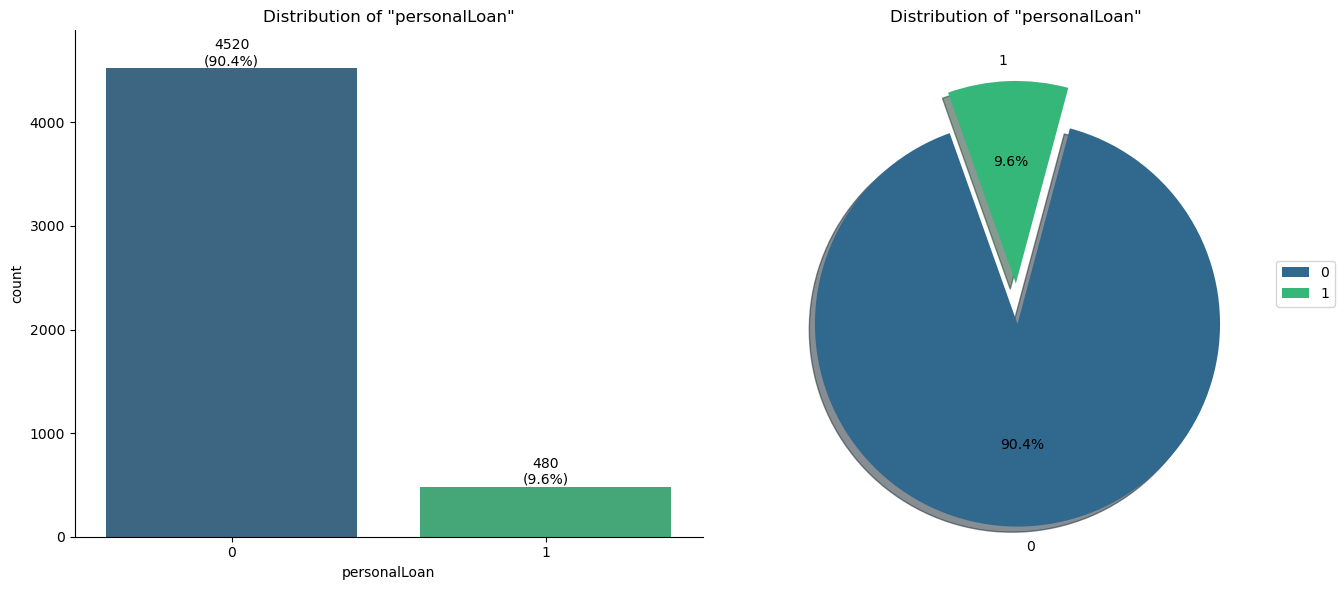



Value counts for securitiesAccount:

securitiesAccount       0      1
Count             4478.00 522.00
Percentage (%)      89.60  10.40


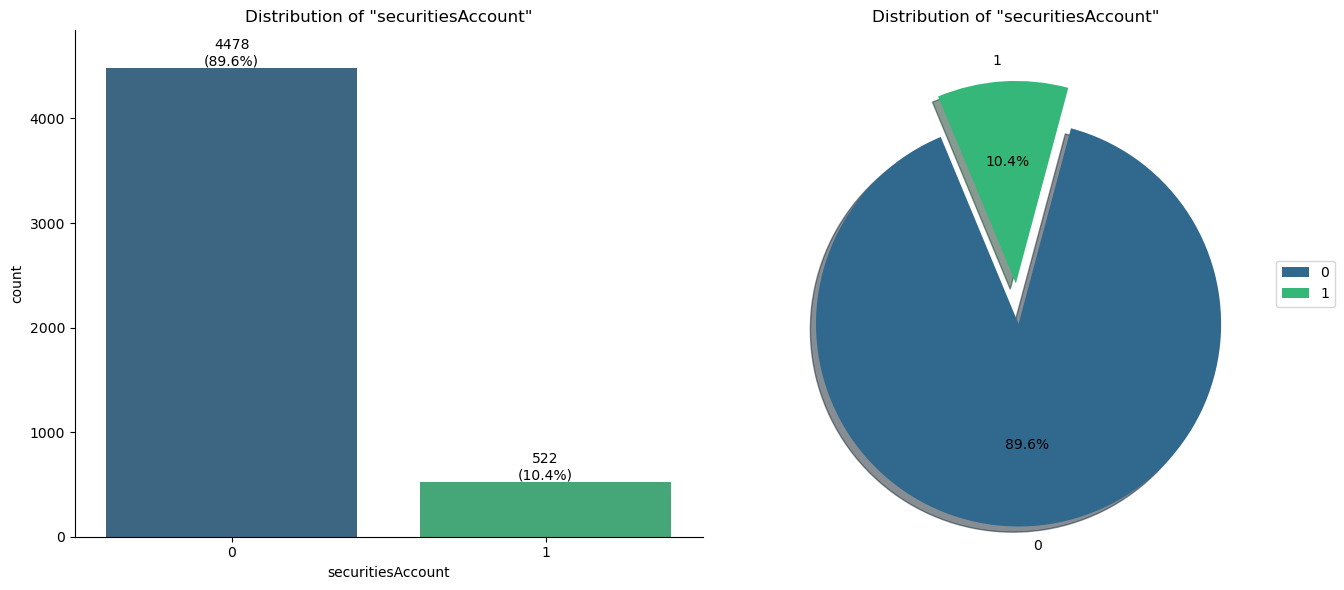



Value counts for cdAccount:

cdAccount            0      1
Count          4698.00 302.00
Percentage (%)   94.00   6.00


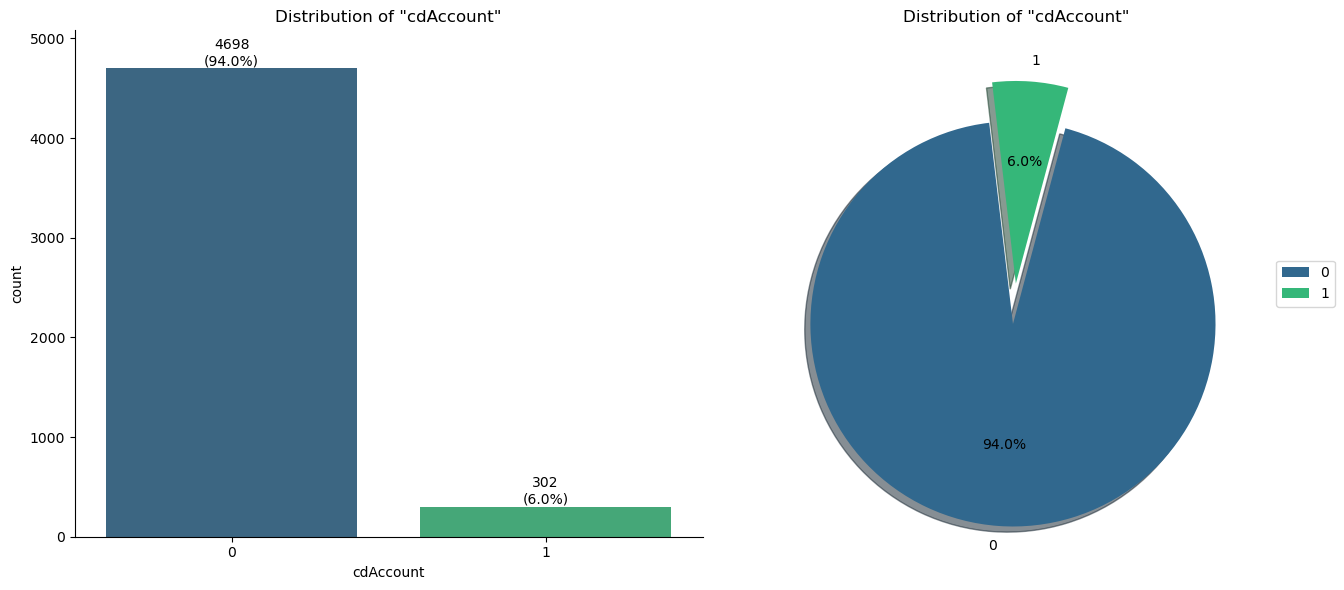



Value counts for online:

online               1       0
Count          2984.00 2016.00
Percentage (%)   59.70   40.30


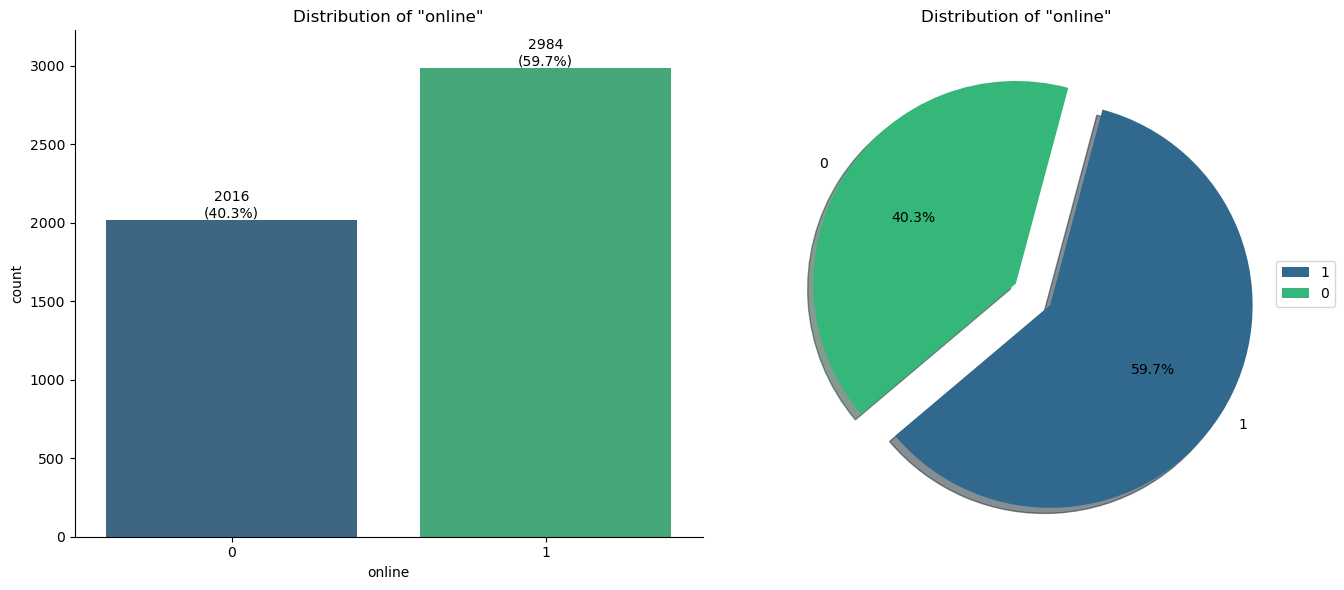



Value counts for creditcard:

creditcard           0       1
Count          3530.00 1470.00
Percentage (%)   70.60   29.40


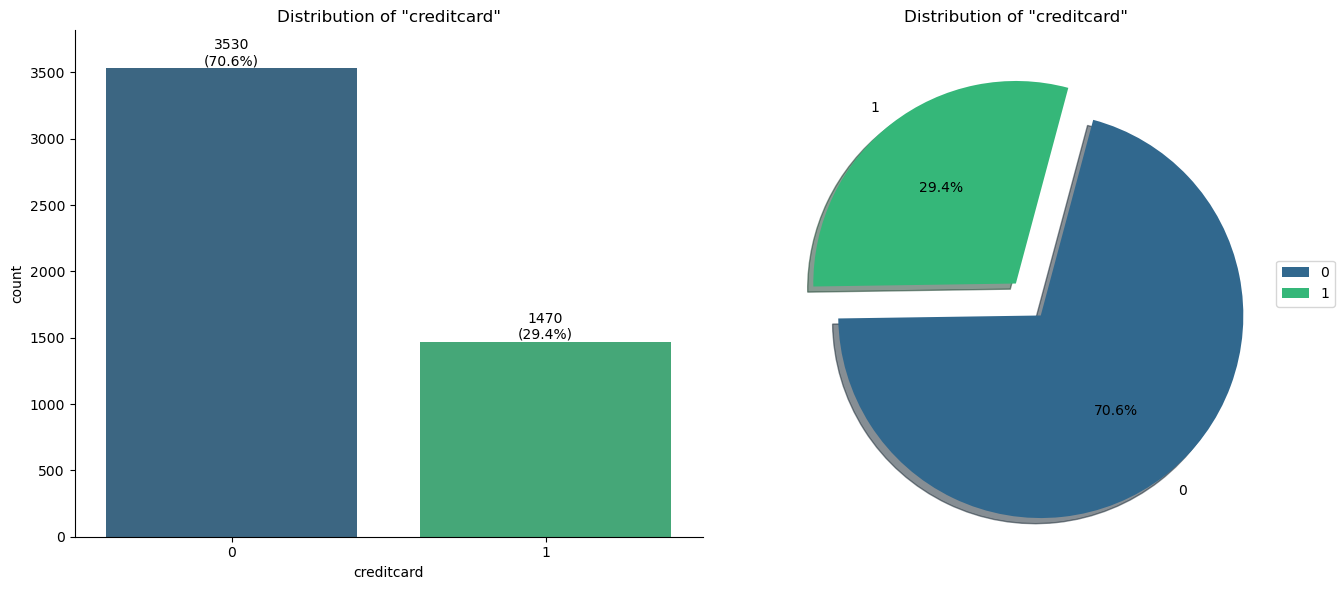



Value counts for education:

education            1       3       2
Count          2096.00 1501.00 1403.00
Percentage (%)   41.90   30.00   28.10


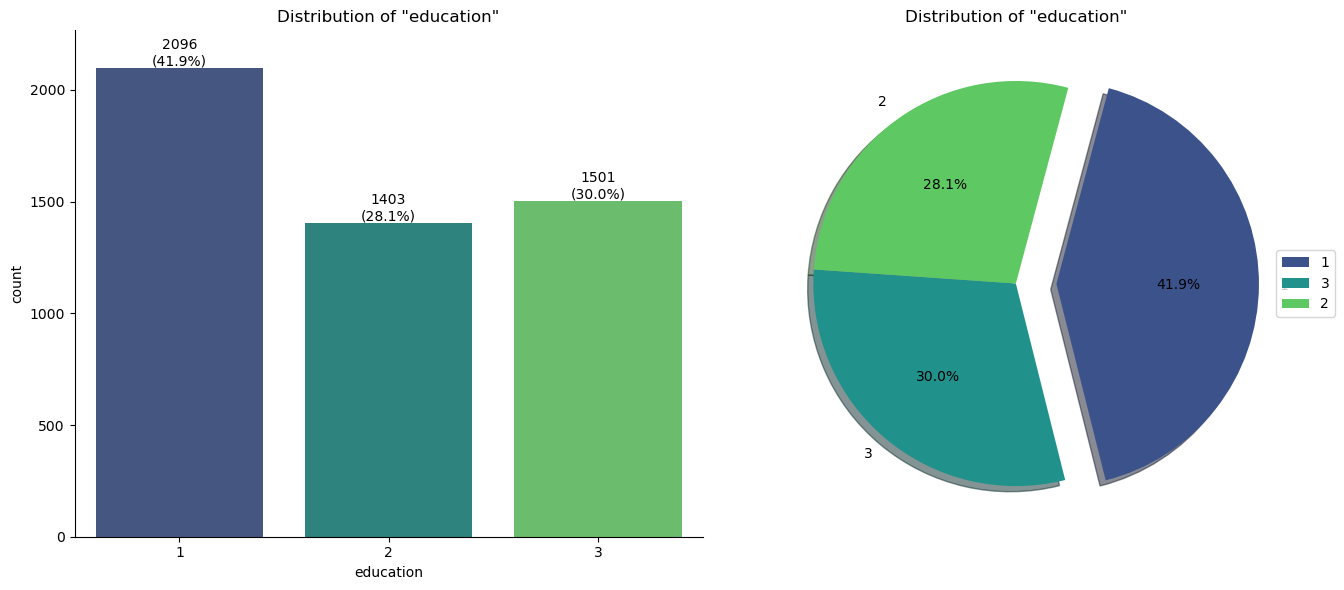



Value counts for incomeBin:

incomeBin       middle   lower   high
Count          2524.00 1914.00 562.00
Percentage (%)   50.50   38.30  11.20


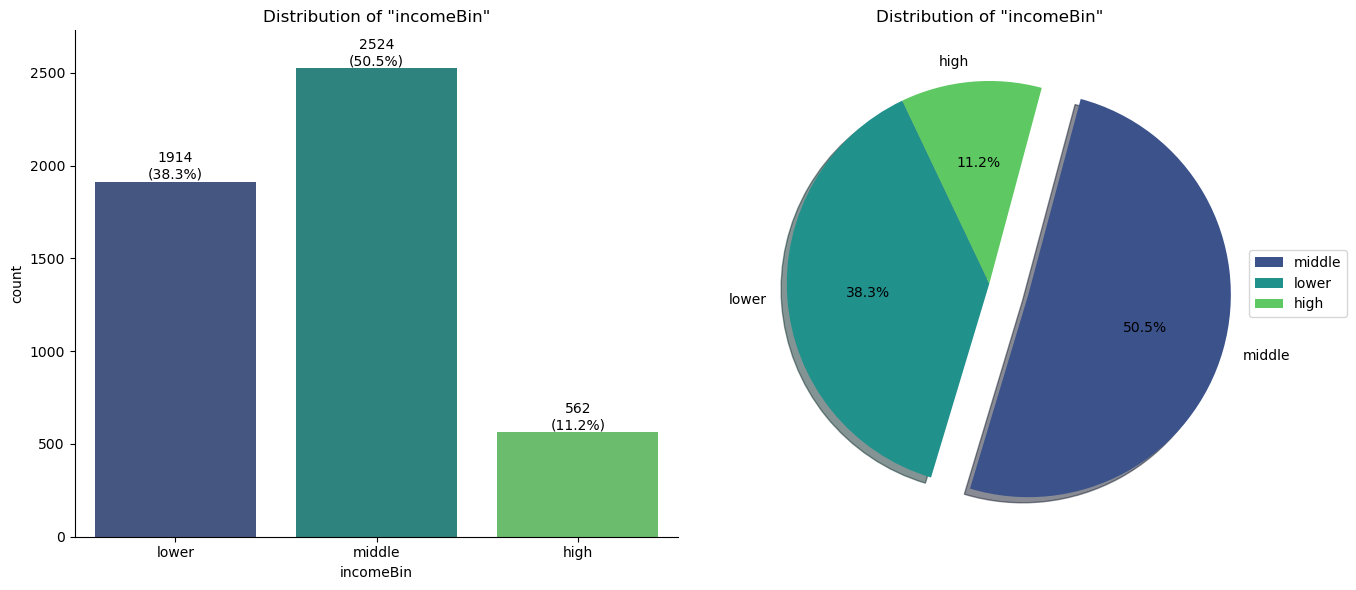



Value counts for spendingBin:

spendingBin     medium     low    high
Count          2371.00 1381.00 1248.00
Percentage (%)   47.40   27.60   25.00


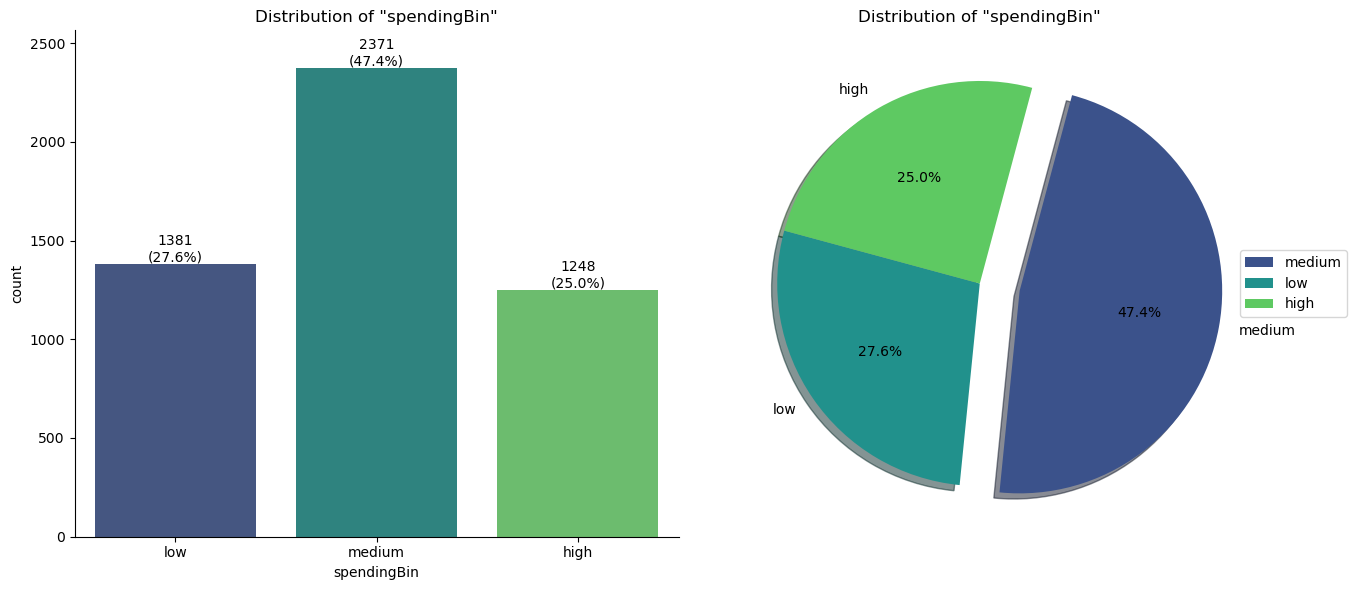



Value counts for family:

family               1       2       4       3
Count          1472.00 1296.00 1222.00 1010.00
Percentage (%)   29.40   25.90   24.40   20.20


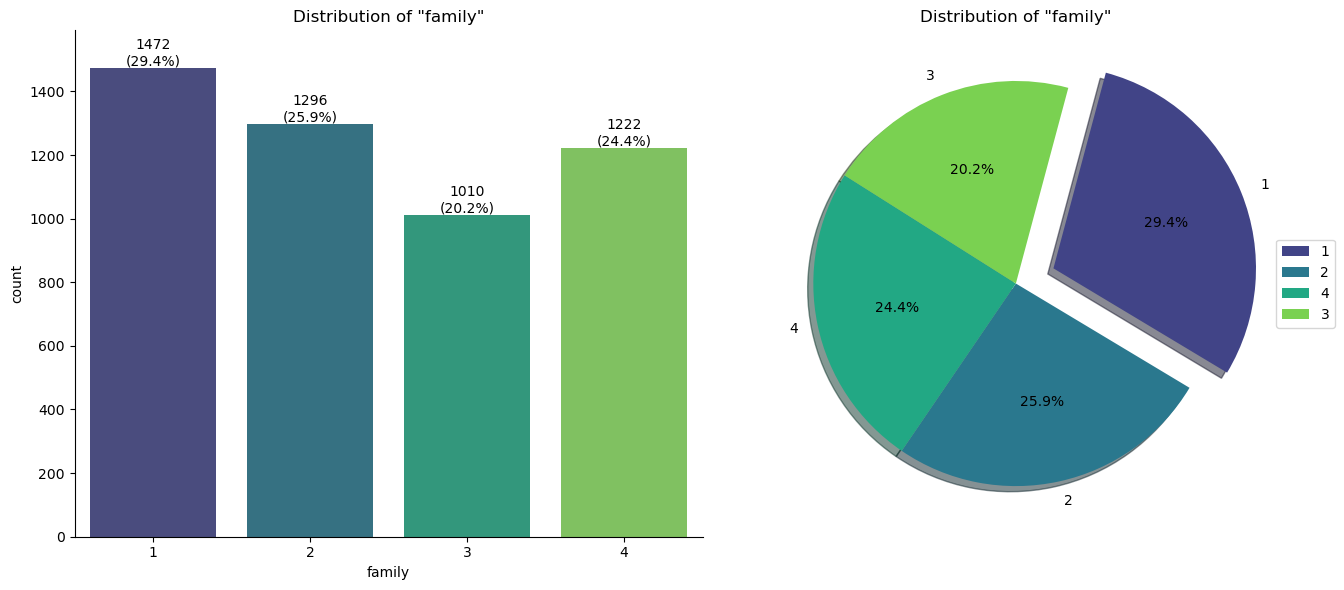



Value counts for ageBin:

ageBin           51-60   41-50   31-40  21-30  61-70
Count          1323.00 1270.00 1236.00 624.00 547.00
Percentage (%)   26.50   25.40   24.70  12.50  10.90


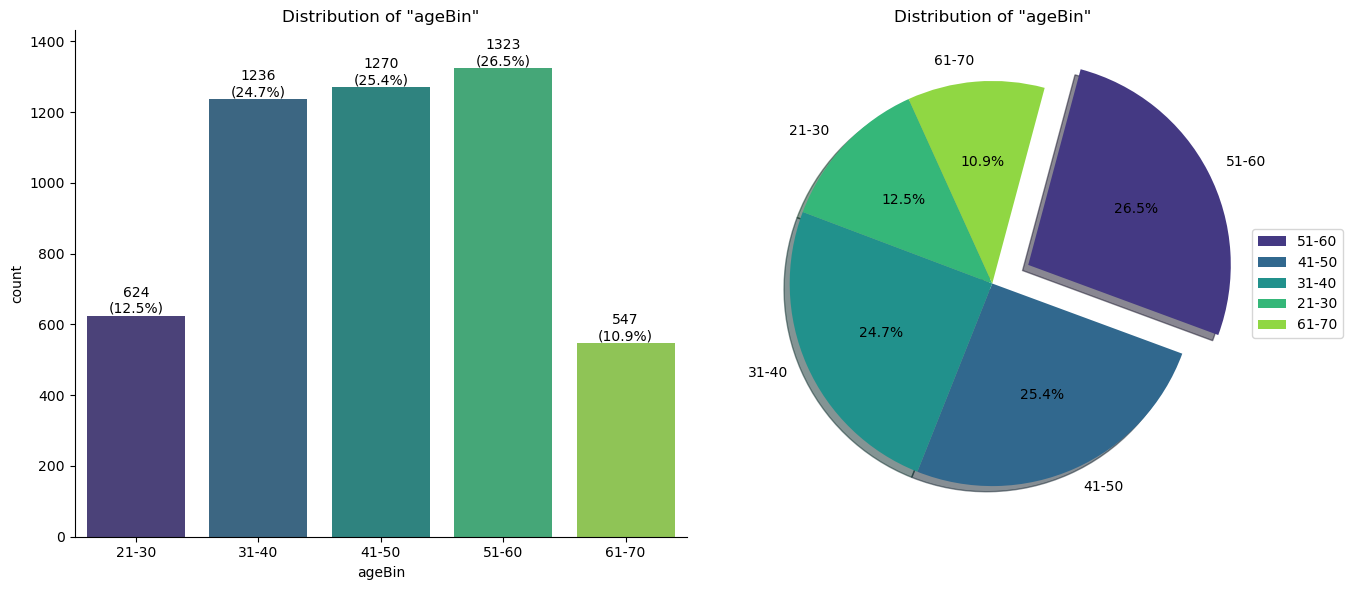



Value counts for region:

region          Bay area  Southern  Los Angeles  Central  Superior
Count            1937.00   1450.00      1095.00   420.00     98.00
Percentage (%)     38.70     29.00        21.90     8.40      2.00


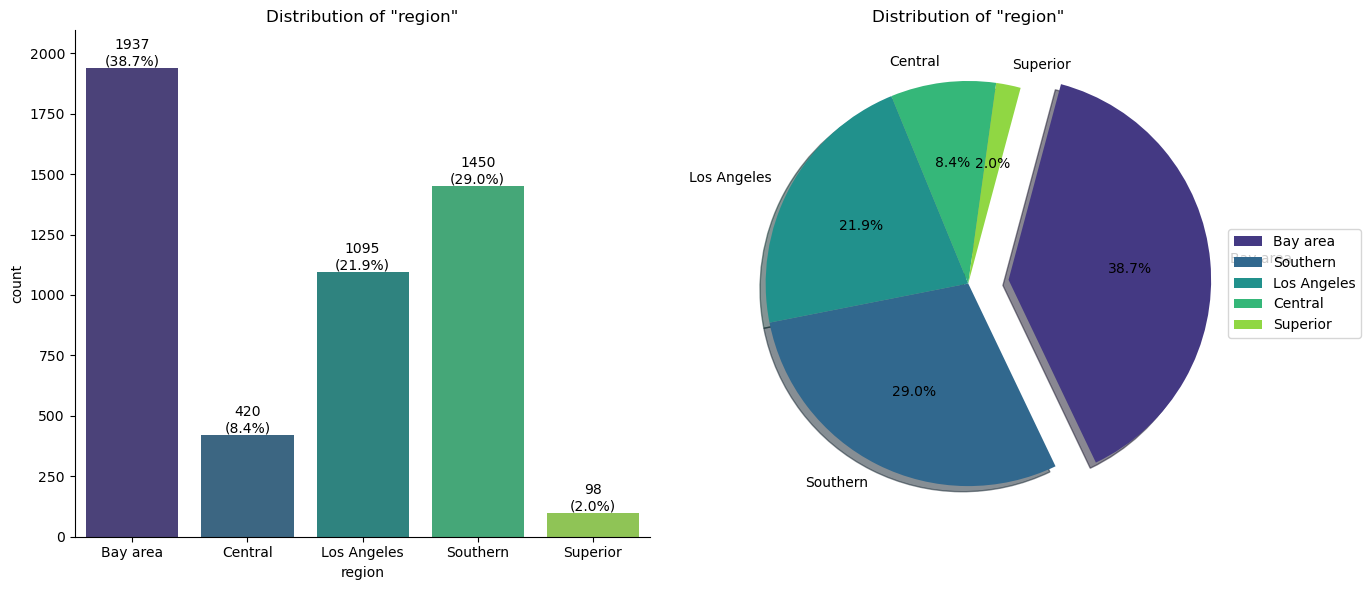

In [64]:
plot_catFeatures(catFeatures0, df)

#### Univariate Visualizations for Numerical Features

In [65]:
numFeatures

['age', 'experience', 'income', 'ccavg', 'mortgage']

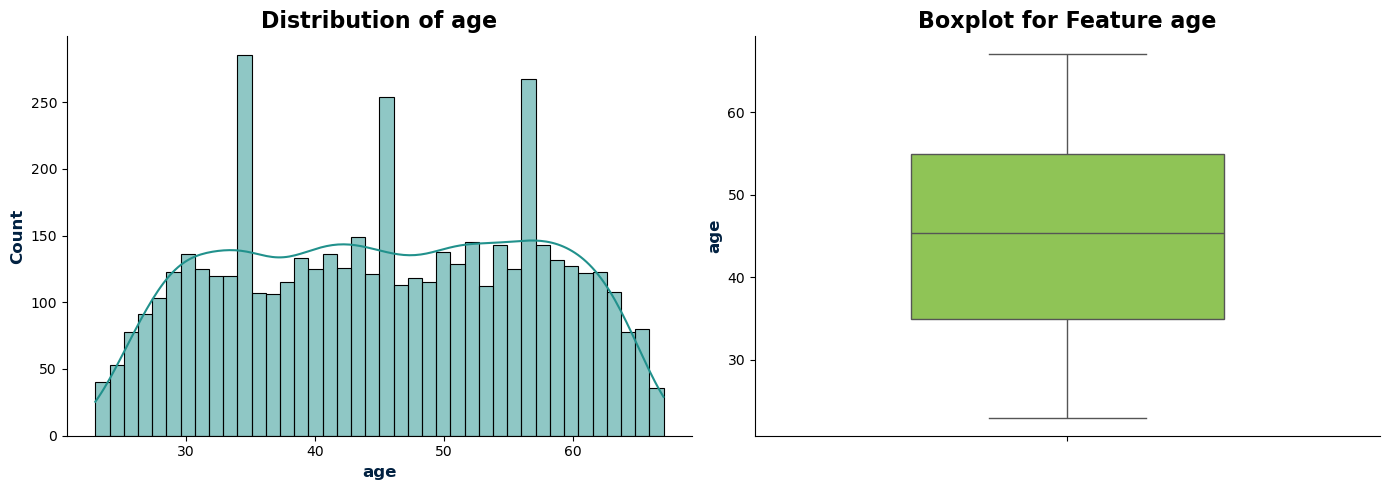

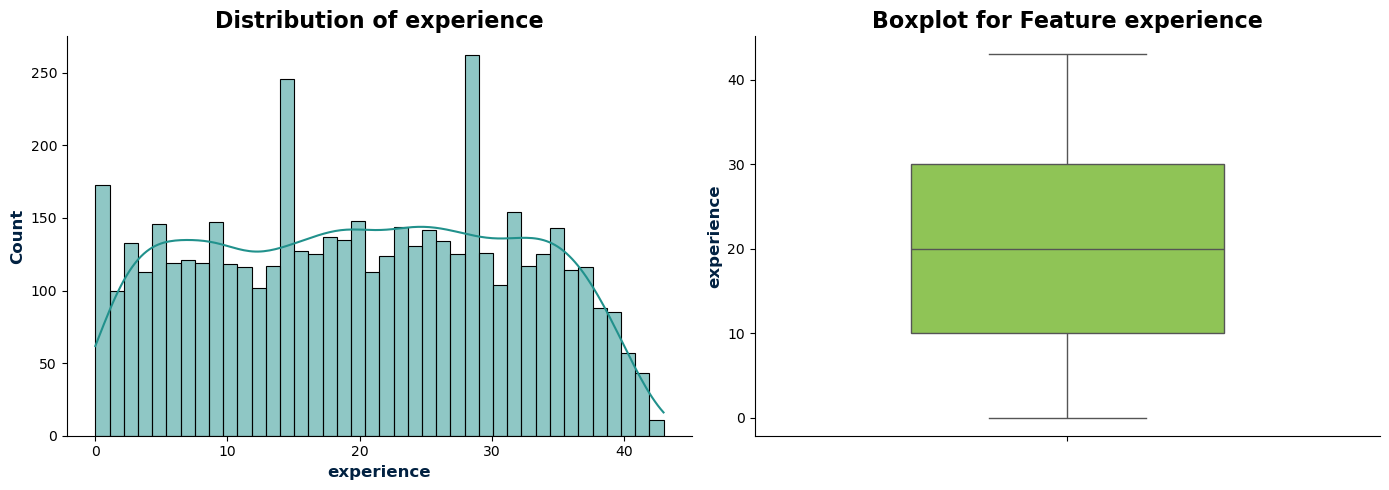

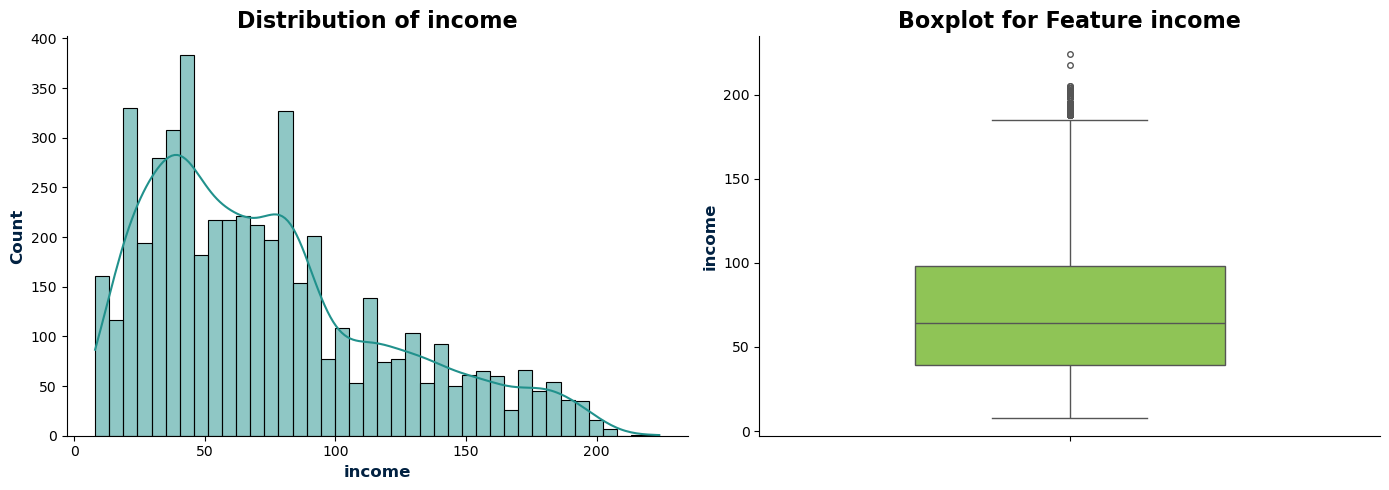

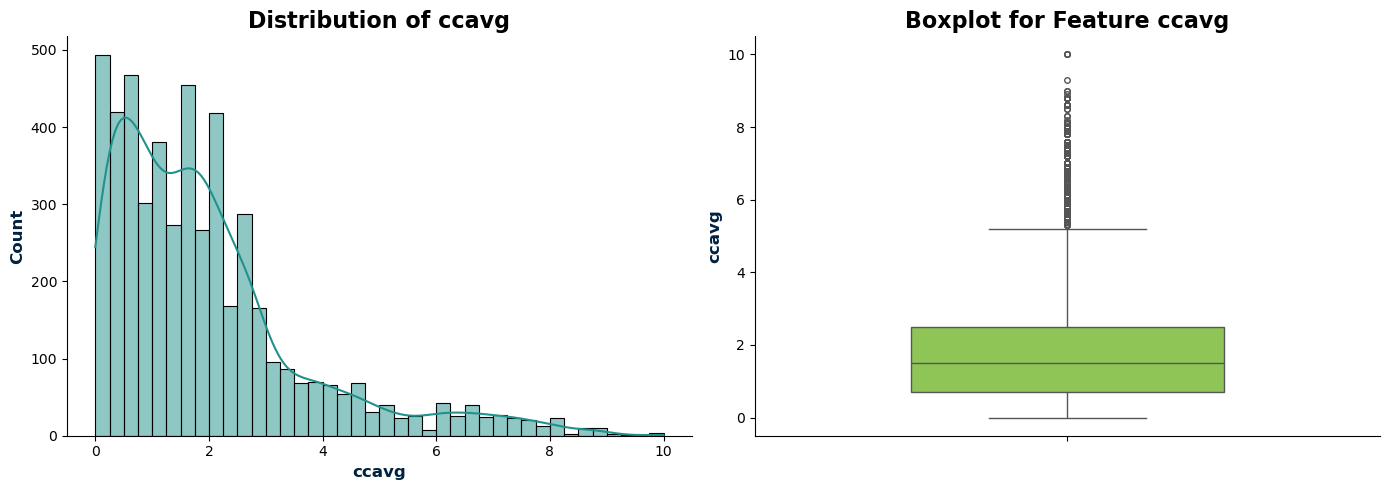

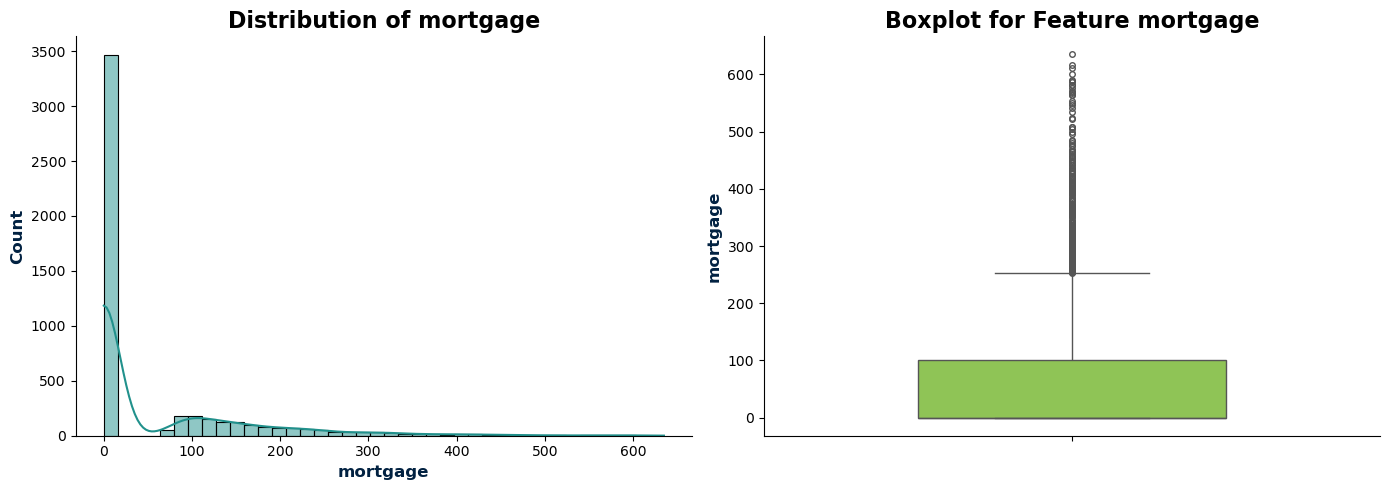

In [66]:
def plots(feature, df):
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    color_hist = sns.color_palette("viridis", 5)[2]
    sns.histplot(df[feature], bins=40, color=color_hist, kde=True, edgecolor='black')
    plt.title(f'Distribution of {feature}', fontsize=16, fontweight='bold')
    plt.xlabel(feature, fontsize=12, fontweight='bold', color='#012141')
    plt.ylabel('Count', fontsize=12, fontweight='bold', color='#012141')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Boxplot
    plt.subplot(1, 2, 2)
    color_box = sns.color_palette("viridis", 5)[4]
    sns.boxplot(y=df[feature], color=color_box, width=0.5, fliersize=4)
    plt.title(f'Boxplot for Feature {feature}', fontsize=16, fontweight='bold')
    plt.ylabel(feature, fontsize=12, fontweight='bold', color='#012141')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    sns.despine(top=True,right=True) # to remove side line from graph
    plt.tight_layout()
    plt.show()

# Apply function for all numerical features
for col in numFeatures:
    plots(col, df)

## Bivariate & Multivariate Analysis

### Cramer's V

The formula for Cramer’s V is:

$V = \sqrt{\frac{\chi^2}{n \times \min(k-1, r-1)} } $

Where:
- $ \chi^2 \$ is the chi-squared statistic from the test of independence.
- n  is the total number of cases (observations).
-  k  is the number of columns in the contingency table.
-  r  is the number of rows in the contingency table.

In [67]:
# from scipy.stats import chi2_contingency

In [68]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return np.sqrt((stat/(obs*mini)))

In [69]:
rows= []
# cat_features
for var1 in df[catFeatures]:
  col = []
  for var2 in df[catFeatures] :
    cramers =cramers_V(df[var1], df[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
    
cramers = np.array(rows)
df_cramers = pd.DataFrame(cramers, columns = df[catFeatures].columns, index =df[catFeatures].columns)
df_cramers


zipCode  family  education  personalLoan  \
zipCode               1.00    0.30       0.31          0.30   
family                0.30    1.00       0.13          0.08   
education             0.31    0.13       1.00          0.15   
personalLoan          0.30    0.08       0.15          1.00   
securitiesAccount     0.30    0.02       0.01          0.02   
cdAccount             0.30    0.04       0.01          0.31   
online                0.30    0.02       0.03          0.01   
creditcard            0.31    0.03       0.02          0.00   
ageBin                0.30    0.07       0.05          0.02   
incomeBin             0.30    0.11       0.13          0.46   
spendingBin           0.30    0.11       0.12          0.38   
county_name           1.00    0.09       0.09          0.09   
region                1.00    0.02       0.05          0.03   

                   securitiesAccount  cdAccount  online  creditcard  ageBin  \
zipCode                         0.30       0.30    0.30        0.31    0.30   
family                          0.02       0.04    0.02        0.03    0.07   
education                       0.01       0.01    0.03        0.02    0.05   
personalLoan                    0.02       0.31    0.01        0.00    0.02   
securitiesAccount               1.00       0.32    0.01        0.01    0.02   
cdAccount                       0.32       1.00    0.18        0.28    0.04   
online                          0.01       0.18    1.00        0.00    0.03   
creditcard                      0.01       0.28    0.00        1.00    0.01   
ageBin                          0.02       0.04    0.03        0.01    1.00   
incomeBin                       0.01       0.17    0.02        0.01    0.04   
spendingBin                     0.02       0.14    0.01        0.00    0.09   
county_name                     0.08       0.09    0.10        0.11    0.09   
region                          0.02       0.03    0.04        0.03    0.03   

                   incomeBin  spendingBin  county_name  region  
zipCode                 0.30         0.30         1.00    1.00  
family                  0.11         0.11         0.09    0.02  
education               0.13         0.12         0.09    0.05  
personalLoan            0.46         0.38         0.09    0.03  
securitiesAccount       0.01         0.02         0.08    0.02  
cdAccount               0.17         0.14         0.09    0.03  
online                  0.02         0.01         0.10    0.04  
creditcard              0.01         0.00         0.11    0.03  
ageBin                  0.04         0.09         0.09    0.03  
incomeBin               1.00         0.39         0.08    0.03  
spendingBin             0.39         1.00         0.07    0.03  
county_name             0.08         0.07         1.00    1.00  
region                  0.03         0.03         1.00    1.00

### Let's plot heatmap for Cateforical Features to visualize their level of assocition 

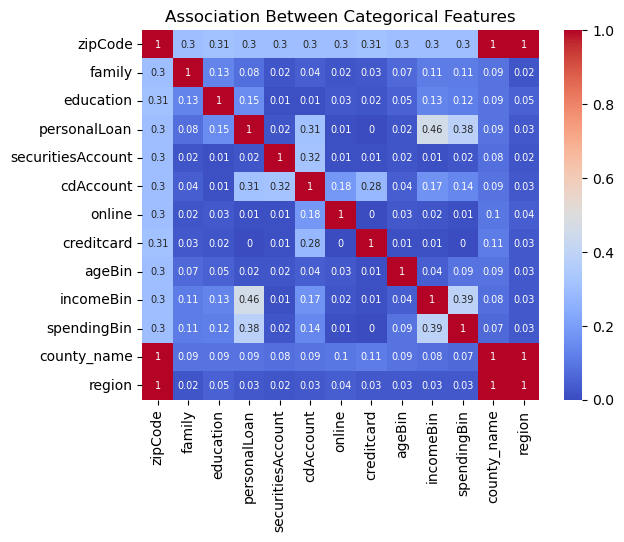

In [70]:
sns.heatmap(df_cramers ,cmap="coolwarm", annot=True, annot_kws={"size": 7}) #Blues
plt.title('Association Between Categorical Features')
plt.show()

**Observations**
- It is obvious that zip_code, county_name and region have a great association as it represents the same location details in different context.
- We can notice some association within incomeBin/personalLoan and spendingBin/personalLoan.
- All other features have weak associations among them.

### Correlation Between Numwric Features

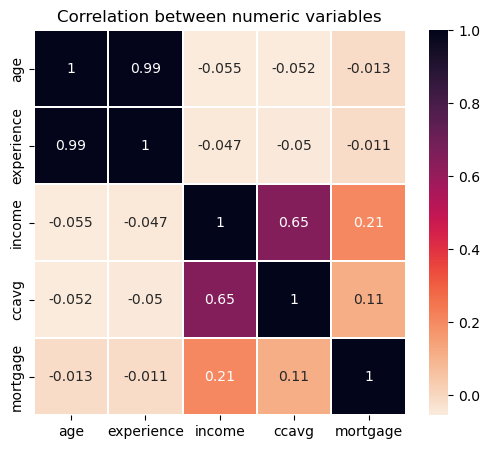

In [71]:
corr=df[numFeatures].corr()
plt.figure(figsize=(6,5))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=0.2, cmap="rocket_r",annot=True)
plt.title("Correlation between numeric variables")
plt.show()


**Observations**
- Age and experience are highly correlated and one of them can be dropped. Since I had to handle (-)ve and 0 experiences, I will drop experience.
- Income and Average spending on credit card are positively corrleated.
- But suprisingly mortgage has weak correlation with income.


### Chi-squared test of independence
- The Chi-square test statistic can be used if the following conditions are satisfied:
1. N, the total frequency, should be reasonably large, say greater than 50. (MET)
2. The sample observations should be independent. (This implies that no individual item should be included twice or more in the sample.) (MET)
3. No expected frequencies should be small. (Small is a relative term. Preferably each expected frequencies should be larger than 10 but in any case not less than 5.)(MET-see test results)


In [72]:
# from scipy.stats import chi2_contingency
def chi_square(c1 ,c2):
    print(f"\nChi-square test of independence: {c1} and {c2}")
    print("-"*(len(c1)+len(c2)+38))
    print(f'\nTest Hypothesis')
    print("-"*16)
    print(f"H0: THE VARIABLES ARE INDEPENDENT(There is no association between {c1} and obtaining a {c2});")
    print(f"H1: THE VARIABLES ARE DEPENDENT(There is an association between {c1} and obtaining a {c2});")
    
    # print('-'*42)
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))# make sure margins = False
    print(f"\nActual values: ")
    print("-"*15)
    print(pd.crosstab(df[c1],df[c2],margins = False))
    print(f"\nExpected values: ")
    print("-"*16)    
    print(exp_val)

    #print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)
    print(f'\nChi-square is        :{chi_2:.4f}\np_value is           :{p_val:.4f}\nDegree of freedom is :{dof}')
    print(f'\nInterpritation of test result: \n{'-'*31}')
    
    if exp_val.min()<5 or np.sum(exp_val)<50 : 
        print("********************************************\nWarning :We have some small expected \
        values or the total number of observations is not enough to get any conclusion\n******************************************** ")
        #Note for sum of all values in dataframe use df.values.sum() and for numpy.ndarray use np.sum(arr)
    elif p_val < 0.05:# consider significan level is 5%
        print(F"There is a statistically significant correlation between {c1} and obtaining a {c2} at 0.05 significant level")
    else:
        print(F"There is no correlation between the two variables(we don't have enough evidence to conclude there is a statistically significant relationship between {c1} and obtaining a {c2}")        

In [73]:
def stacked_plot(x, feature_name, target_variable):
    sns.set_palette(sns.color_palette("Dark2", 8))  # Set color palette
    
    tab1 = pd.crosstab(x, df[target_variable], margins=True)  # Dynamically use target_variable
    print(tab1)
    print('-' * 90)
    
    tab = pd.crosstab(x, df[target_variable], normalize='index')  # Normalize values for percentages
    ax = tab.plot(kind='bar', stacked=False, figsize=(8, 4), width=0.8)  # Store plot axes
    
    plt.xticks(rotation=360)
    
    # Add text labels on bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1%}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=9, color='black', fontweight='bold')

    # Set legend properties dynamically
    labels = list(df[target_variable].unique())
    plt.legend(labels=labels, title=target_variable, loc="upper left", bbox_to_anchor=(1, 1))
    
    sns.despine(top=True, right=True, left=True)  # Remove side lines
    plt.tight_layout()  # Adjust layout to prevent overlap
    
    # Dynamically set the title
    plt.title(f'{target_variable} vs {feature_name}', fontsize=14, fontweight='bold')
    plt.show()

#### Apply Chi-square function and visualizations for following categorical features

personalLoan     0    1   All
family                       
1             1365  107  1472
2             1190  106  1296
3              877  133  1010
4             1088  134  1222
All           4520  480  5000
------------------------------------------------------------------------------------------


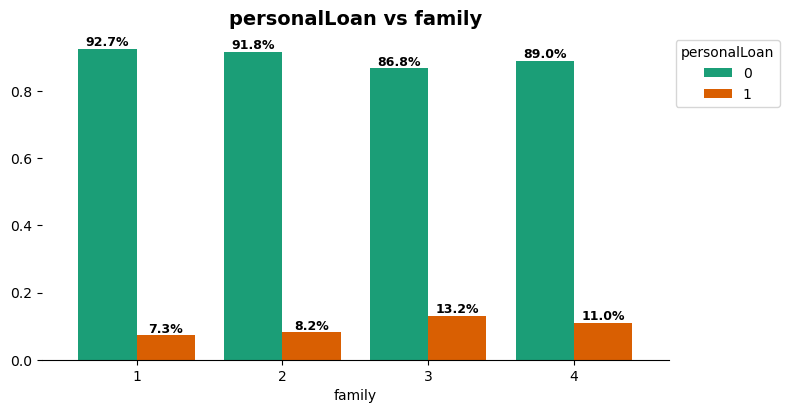


Chi-square test of independence: family and personalLoan
--------------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between family and obtaining a personalLoan);
H1: THE VARIABLES ARE DEPENDENT(There is an association between family and obtaining a personalLoan);

Actual values: 
---------------
personalLoan     0    1
family                 
1             1365  107
2             1190  106
3              877  133
4             1088  134

Expected values: 
----------------
[[1330.688  141.312]
 [1171.584  124.416]
 [ 913.04    96.96 ]
 [1104.688  117.312]]

Chi-square is        :29.6761
p_value is           :0.0000
Degree of freedom is :3

Interpritation of test result: 
-------------------------------
There is a statistically significant correlation between family and obtaining a personalLoan at 0.05 significant level
personalLoan     0    1   All
education                    
1             2003 

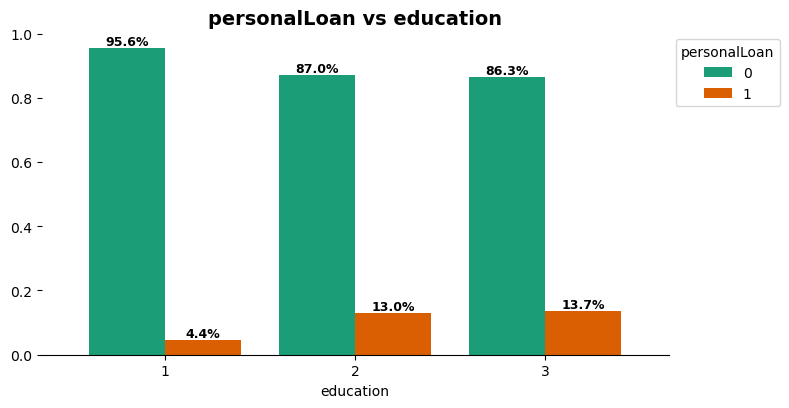


Chi-square test of independence: education and personalLoan
-----------------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between education and obtaining a personalLoan);
H1: THE VARIABLES ARE DEPENDENT(There is an association between education and obtaining a personalLoan);

Actual values: 
---------------
personalLoan     0    1
education              
1             2003   93
2             1221  182
3             1296  205

Expected values: 
----------------
[[1894.784  201.216]
 [1268.312  134.688]
 [1356.904  144.096]]

Chi-square is        :111.2399
p_value is           :0.0000
Degree of freedom is :2

Interpritation of test result: 
-------------------------------
There is a statistically significant correlation between education and obtaining a personalLoan at 0.05 significant level
personalLoan     0    1   All
cdAccount                    
0             4358  340  4698
1              162

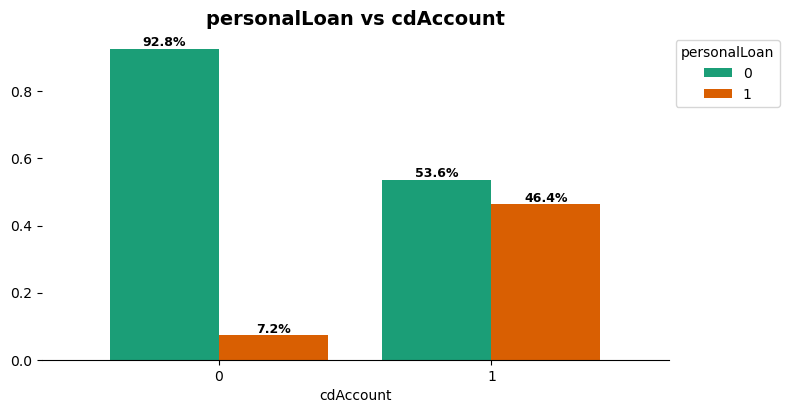


Chi-square test of independence: cdAccount and personalLoan
-----------------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between cdAccount and obtaining a personalLoan);
H1: THE VARIABLES ARE DEPENDENT(There is an association between cdAccount and obtaining a personalLoan);

Actual values: 
---------------
personalLoan     0    1
cdAccount              
0             4358  340
1              162  140

Expected values: 
----------------
[[4246.992  451.008]
 [ 273.008   28.992]]

Chi-square is        :495.9042
p_value is           :0.0000
Degree of freedom is :1

Interpritation of test result: 
-------------------------------
There is a statistically significant correlation between cdAccount and obtaining a personalLoan at 0.05 significant level
personalLoan     0    1   All
creditcard                   
0             3193  337  3530
1             1327  143  1470
All           4520  480  5000
---

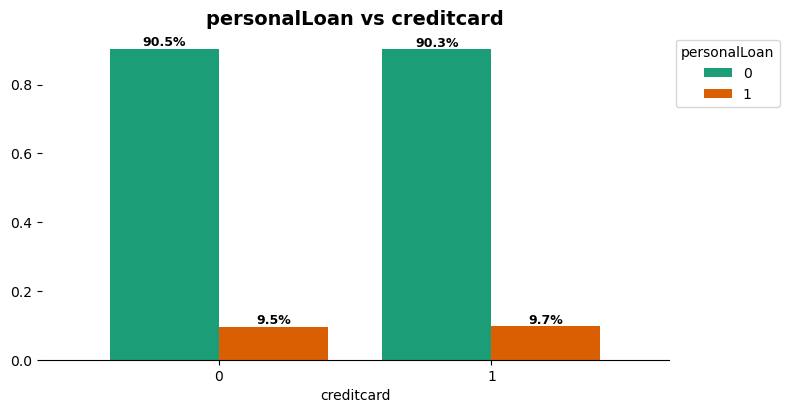


Chi-square test of independence: creditcard and personalLoan
------------------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between creditcard and obtaining a personalLoan);
H1: THE VARIABLES ARE DEPENDENT(There is an association between creditcard and obtaining a personalLoan);

Actual values: 
---------------
personalLoan     0    1
creditcard             
0             3193  337
1             1327  143

Expected values: 
----------------
[[3191.12  338.88]
 [1328.88  141.12]]

Chi-square is        :0.0211
p_value is           :0.8844
Degree of freedom is :1

Interpritation of test result: 
-------------------------------
There is no correlation between the two variables(we don't have enough evidence to conclude there is a statistically significant relationship between creditcard and obtaining a personalLoan
personalLoan     0    1   All
incomeBin                    
lower         1914    0  19

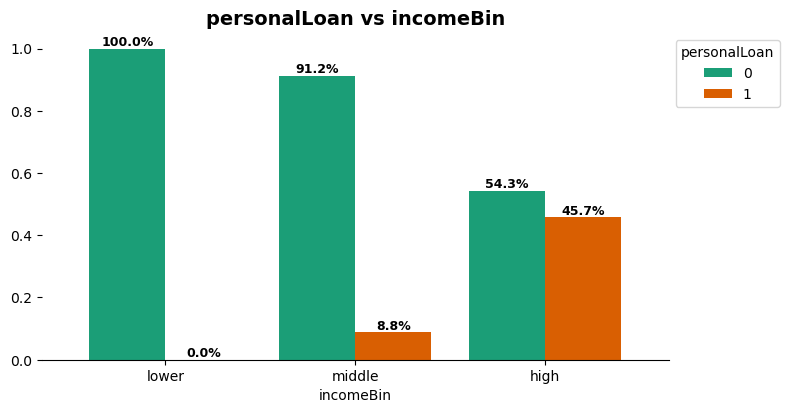


Chi-square test of independence: incomeBin and personalLoan
-----------------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between incomeBin and obtaining a personalLoan);
H1: THE VARIABLES ARE DEPENDENT(There is an association between incomeBin and obtaining a personalLoan);

Actual values: 
---------------
personalLoan     0    1
incomeBin              
lower         1914    0
middle        2301  223
high           305  257

Expected values: 
----------------
[[1730.256  183.744]
 [2281.696  242.304]
 [ 508.048   53.952]]

Chi-square is        :1050.2785
p_value is           :0.0000
Degree of freedom is :2

Interpritation of test result: 
-------------------------------
There is a statistically significant correlation between incomeBin and obtaining a personalLoan at 0.05 significant level
personalLoan     0    1   All
spendingBin                  
low           1342   39  1381
medium        229

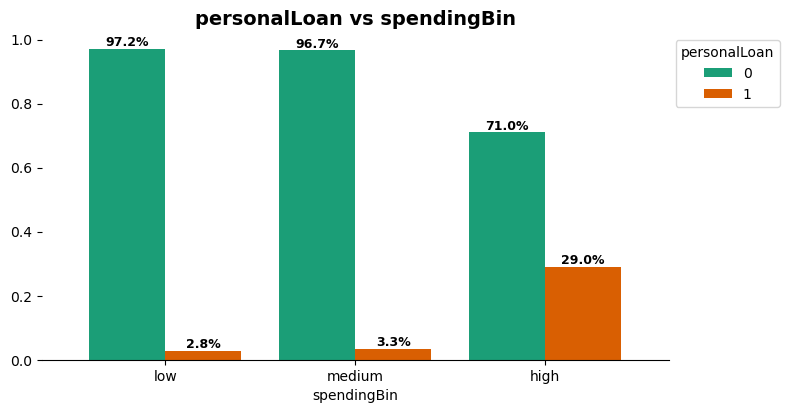


Chi-square test of independence: spendingBin and personalLoan
-------------------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between spendingBin and obtaining a personalLoan);
H1: THE VARIABLES ARE DEPENDENT(There is an association between spendingBin and obtaining a personalLoan);

Actual values: 
---------------
personalLoan     0    1
spendingBin            
low           1342   39
medium        2292   79
high           886  362

Expected values: 
----------------
[[1248.424  132.576]
 [2143.384  227.616]
 [1128.192  119.808]]

Chi-square is        :721.9857
p_value is           :0.0000
Degree of freedom is :2

Interpritation of test result: 
-------------------------------
There is a statistically significant correlation between spendingBin and obtaining a personalLoan at 0.05 significant level
personalLoan     0    1   All
ageBin                       
21-30          558   66   624
31-40   

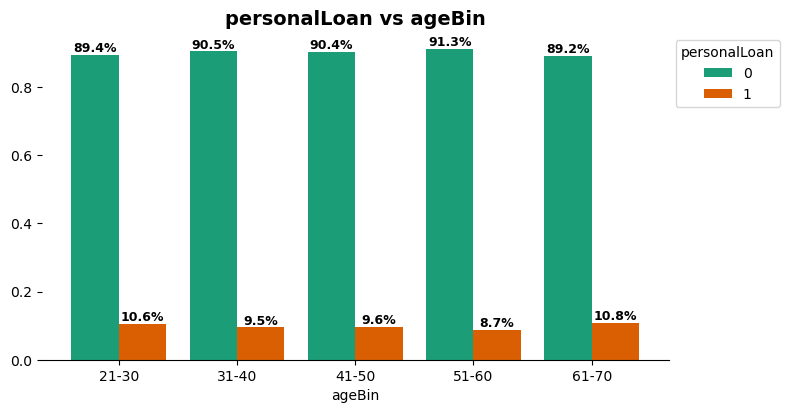


Chi-square test of independence: ageBin and personalLoan
--------------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between ageBin and obtaining a personalLoan);
H1: THE VARIABLES ARE DEPENDENT(There is an association between ageBin and obtaining a personalLoan);

Actual values: 
---------------
personalLoan     0    1
ageBin                 
21-30          558   66
31-40         1118  118
41-50         1148  122
51-60         1208  115
61-70          488   59

Expected values: 
----------------
[[ 564.096   59.904]
 [1117.344  118.656]
 [1148.08   121.92 ]
 [1195.992  127.008]
 [ 494.488   52.512]]

Chi-square is        :2.8329
p_value is           :0.5862
Degree of freedom is :4

Interpritation of test result: 
-------------------------------
There is no correlation between the two variables(we don't have enough evidence to conclude there is a statistically significant relationship between ageB

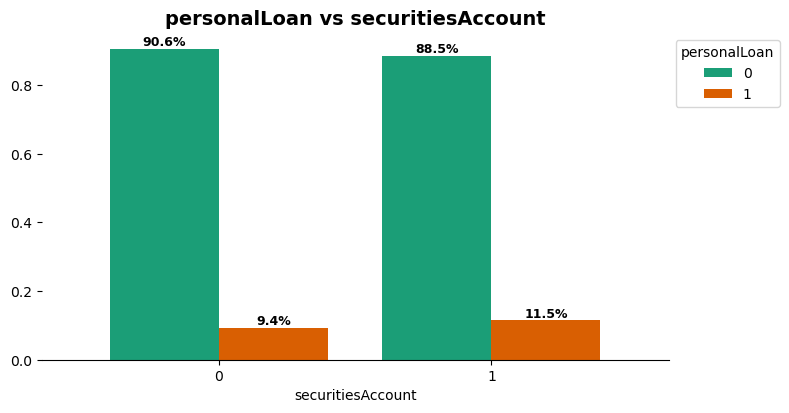


Chi-square test of independence: securitiesAccount and personalLoan
-------------------------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between securitiesAccount and obtaining a personalLoan);
H1: THE VARIABLES ARE DEPENDENT(There is an association between securitiesAccount and obtaining a personalLoan);

Actual values: 
---------------
personalLoan          0    1
securitiesAccount           
0                  4058  420
1                   462   60

Expected values: 
----------------
[[4048.112  429.888]
 [ 471.888   50.112]]

Chi-square is        :2.1723
p_value is           :0.1405
Degree of freedom is :1

Interpritation of test result: 
-------------------------------
There is no correlation between the two variables(we don't have enough evidence to conclude there is a statistically significant relationship between securitiesAccount and obtaining a personalLoan
personalLoan     0    1   Al

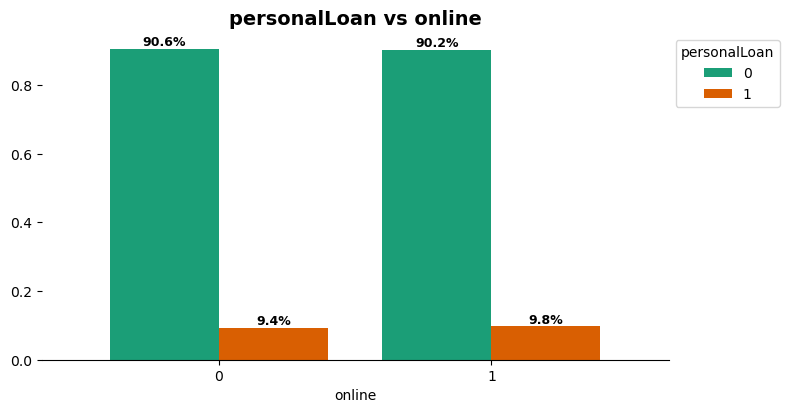


Chi-square test of independence: online and personalLoan
--------------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between online and obtaining a personalLoan);
H1: THE VARIABLES ARE DEPENDENT(There is an association between online and obtaining a personalLoan);

Actual values: 
---------------
personalLoan     0    1
online                 
0             1827  189
1             2693  291

Expected values: 
----------------
[[1822.464  193.536]
 [2697.536  286.464]]

Chi-square is        :0.1560
p_value is           :0.6929
Degree of freedom is :1

Interpritation of test result: 
-------------------------------
There is no correlation between the two variables(we don't have enough evidence to conclude there is a statistically significant relationship between online and obtaining a personalLoan
personalLoan     0    1   All
region                       
Bay area      1741  196  1937
Central      

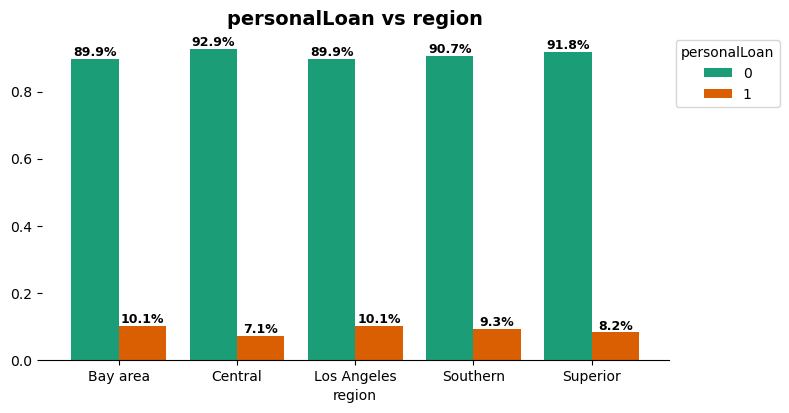


Chi-square test of independence: region and personalLoan
--------------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between region and obtaining a personalLoan);
H1: THE VARIABLES ARE DEPENDENT(There is an association between region and obtaining a personalLoan);

Actual values: 
---------------
personalLoan     0    1
region                 
Bay area      1741  196
Central        390   30
Los Angeles    984  111
Southern      1315  135
Superior        90    8

Expected values: 
----------------
[[1751.048  185.952]
 [ 379.68    40.32 ]
 [ 989.88   105.12 ]
 [1310.8    139.2  ]
 [  88.592    9.408]]

Chi-square is        :4.2597
p_value is           :0.3720
Degree of freedom is :4

Interpritation of test result: 
-------------------------------
There is no correlation between the two variables(we don't have enough evidence to conclude there is a statistically significant relationship between regi

In [74]:
catFeatures_ = ['family', 'education', 'cdAccount', 'creditcard', 'incomeBin', 'spendingBin', 'ageBin', 'securitiesAccount', 'online', 'region']
target_variable = 'personalLoan'

for variable in catFeatures_:
    stacked_plot(df[variable], variable, target_variable)
    chi_square(variable, target_variable)

### Summary of Chi-square test

In [75]:
# from scipy.stats import chi2_contingency
def chi_square(c1 ,c2):
    print(f"\nChi-square test of independence: {c1} and {c2}:")
    print("="*(len(c1)+len(c2)+39))
    # print(f'\nTest Hypothesis')
    # print("-"*16)
    # print(f"H0: THE VARIABLES ARE INDEPENDENT(There is no association between {c1} and obtaining a {c2});")
    # print(f"H1: THE VARIABLES ARE DEPENDENT(There is an association between {c1} and obtaining a {c2});")
    
    # print('-'*42)
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))# make sure margins = False
    # print(f"\nActual values: ")
    # print("-"*15)
    # print(pd.crosstab(df[c1],df[c2],margins = False))
    # print(f"\nExpected values: ")
    # print("-"*16)    
    # print(exp_val)

    #print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)
    print(f'Chi-square is        :{chi_2:.4f}\np_value is           :{p_val:.4f}\nDegree of freedom is :{dof}\n')
    # print(f'\nInterpritation of test result: \n{'-'*31}')
    
    if exp_val.min()<5 or np.sum(exp_val)<50 : 
        print("********************************************\nWarning :We have some small expected \
        values or the total number of observations is not enough to get any conclusion\n******************************************** ")
        #Note for sum of all values in dataframe use df.values.sum() and for numpy.ndarray use np.sum(arr)
    elif p_val < 0.05:# consider significan level is 5%
        print(F"There is a statistically significant correlation between {c1} and obtaining a {c2} at 0.05 significant level")
    else:
        print(F"There is NO correlation between the two variables(we don't have enough evidence to conclude there is a statistically significant relationship between {c1} and obtaining a {c2}")        

# catFeatures_ = ['family', 'education', 'cdAccount', 'creditcard', 'incomeBin', 'spendingBin', 'ageBin', 'securitiesAccount', 'online', 'region']
# I take above two functions and did below for loop to get all above features to gothrough chi-square test at once
for variable in catFeatures_:
    # stacked_plot(df[variable], variable)  # Pass feature name dynamically
    chi_square(variable,'personalLoan')
    


Chi-square test of independence: family and personalLoan:
Chi-square is        :29.6761
p_value is           :0.0000
Degree of freedom is :3

There is a statistically significant correlation between family and obtaining a personalLoan at 0.05 significant level

Chi-square test of independence: education and personalLoan:
Chi-square is        :111.2399
p_value is           :0.0000
Degree of freedom is :2

There is a statistically significant correlation between education and obtaining a personalLoan at 0.05 significant level

Chi-square test of independence: cdAccount and personalLoan:
Chi-square is        :495.9042
p_value is           :0.0000
Degree of freedom is :1

There is a statistically significant correlation between cdAccount and obtaining a personalLoan at 0.05 significant level

Chi-square test of independence: creditcard and personalLoan:
Chi-square is        :0.0211
p_value is           :0.8844
Degree of freedom is :1

There is NO correlation between the two variables(we d

### Handilig Outliers

As per box plot visualizations in univatiate analysis of numerial features, 'income', 'ccavg' and 'mortgage' fetures have outliers. Let's visualize them again.

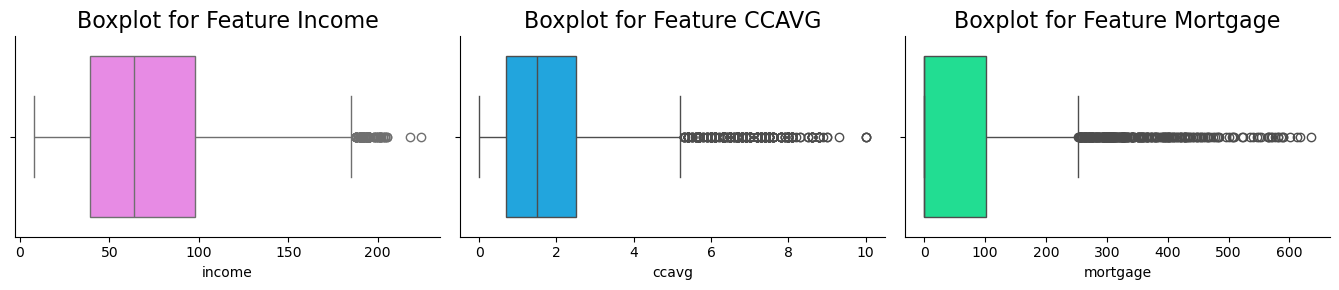

In [76]:
# Visual check
fig, ax = plt.subplots(1, 3, figsize=(13.5, 3))
# Boxplots with individual titles
sns.boxplot(x=df.income, ax=ax[0], color='#F67CF2')  
ax[0].set_title('Boxplot for Feature Income', fontsize=16)  

sns.boxplot(x=df.ccavg, ax=ax[1], color='#03B1FC')  
ax[1].set_title('Boxplot for Feature CCAVG', fontsize=16)  

sns.boxplot(x=df.mortgage, ax=ax[2], color='#03fc98')  
ax[2].set_title('Boxplot for Feature Mortgage', fontsize=16)  

sns.despine(top=True,right=True) # to remove side line from graph
plt.tight_layout()
plt.show()

#### Outlier Analysis: Tukey method:

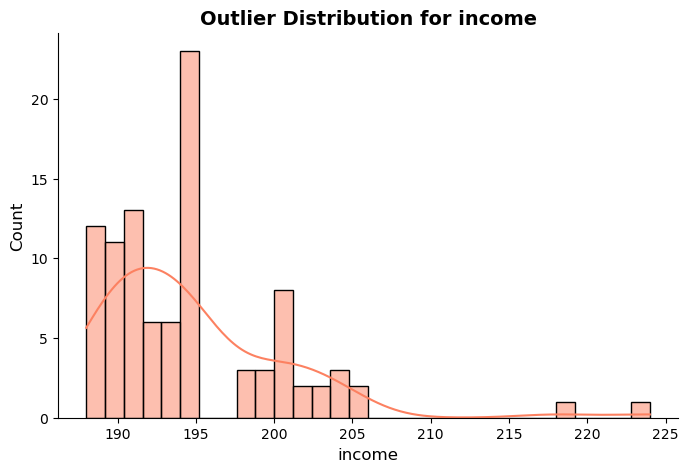

count    96.00
mean    194.67
std       6.06
min     188.00
25%     191.00
50%     193.50
75%     198.00
max     224.00
Name: income, dtype: float64
------------------------------------------------------------------------------------------------


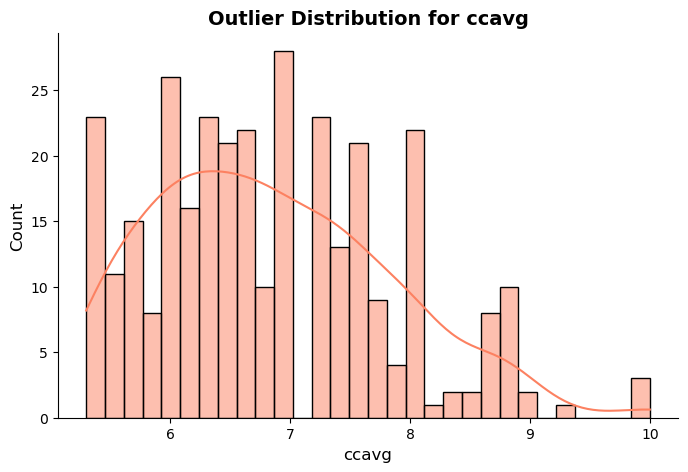

count   324.00
mean      6.85
std       0.99
min       5.30
25%       6.00
50%       6.70
75%       7.50
max      10.00
Name: ccavg, dtype: float64
------------------------------------------------------------------------------------------------


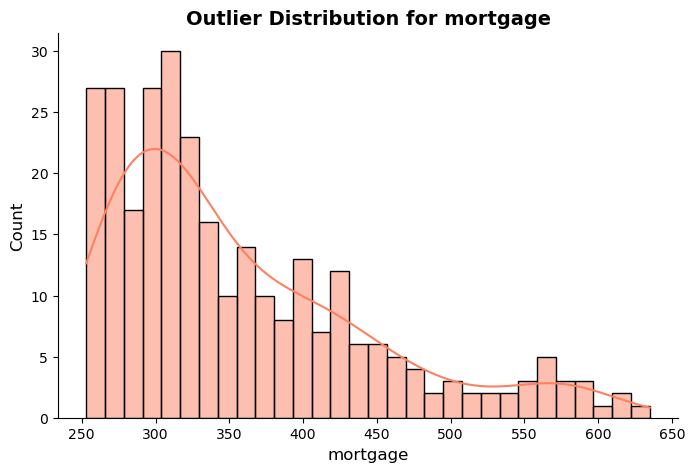

count   291.00
mean    355.66
std      87.69
min     253.00
25%     292.50
50%     328.00
75%     401.00
max     635.00
Name: mortgage, dtype: float64
------------------------------------------------------------------------------------------------


In [77]:
def outlier_analysis(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    UIF = Q3 + 1.5 * IQR  # Upper Inner Fence
    LIF = Q1 - 1.5 * IQR  # Lower Inner Fence
    
    df_out = df[(df[col] < LIF) | (df[col] > UIF)]  # Filter potential outliers
    
    # Create a separate figure for each feature
    plt.figure(figsize=(8, 5))  
    
    color = sns.color_palette("Reds")[2]  # Pick a specific color from the palette
    sns.histplot(df_out[col], kde=True, bins=30, color=color, edgecolor="black")
    # sns.histplot(df_out[col], kde=True, bins=30, palette='colorblind', edgecolor="black")  # Use histplot instead of distplot
    plt.title(f'Outlier Distribution for {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    sns.despine()  # Remove unnecessary plot borders
    plt.show()

    return df_out[col].describe()  # Display summary statistics

# Apply function to each numerical feature separately
numFeatures1 = ['income', 'ccavg', 'mortgage']
for feature in numFeatures1:
    # print(f"\nOutlier analysis for {feature}:")
    print(outlier_analysis(feature))
    print('-' * 96)  # Separator for clarity

#### Check Outliers with Local Outlier Factor Method(only for Experimenting not to take action)
How LOF Works
1. Define Neighborhood:
- LOF measures a point’s density relative to its surrounding data points.
- A parameter k defines the number of nearest neighbors used for comparison.
2. Compute Local Reachability Density (LRD):
- LRD estimates how isolated a point is compared to its neighbors.
- The distance to nearby points is analyzed to determine if a point is densely packed or sparsely placed.
3. Calculate LOF Score:
- LOF computes the ratio of a point’s density compared to its neighbors.
- If a point is significantly less dense than surrounding points, it is flagged as an outlier.
4. LOF Interpretation
- LOF ≈ 1 -> The point is normal (density is similar to neighbors).
- LOF > 1 -> The point is potentially an outlier (lower density than neighbors).
- Higher LOF scores indicate stronger anomalies.

Advantages of LOF
- Detects Local Anomalies -> Can identify outliers in clustered datasets.
- Adaptable to Complex Data Distributions -> Works for non-linear relationships.
- Resistant to Global Threshold Issues -> Instead of relying on absolute distances, LOF adapts to data density.

Limitations
- Sensitive to k value (number of neighbors) -> Choosing k incorrectly may lead to misleading outlier detection.
- Computational Cost for Large Datasets -> Requires nearest neighbor calculations, which can be expensive.

In [78]:
from sklearn.neighbors import LocalOutlierFactor

# initialization
lof = LocalOutlierFactor(n_neighbors=15, contamination='auto', n_jobs=-1)
# prediction
df['lof_outlier'] = lof.fit_predict(df[numFeatures])
# Display the relevant columns with outlier information
print("Relevant columns with outlier information:")
print(numFeatures)
# Count Outliers and Inliers
num_outliers = (df['lof_outlier']==-1).sum()
num_inliers = (df['lof_outlier'] == 1).sum()
print(f"Number of outliers: {num_outliers}")
print(f"Number of inliers: {num_inliers}")

Relevant columns with outlier information:
['age', 'experience', 'income', 'ccavg', 'mortgage']
Number of outliers: 4
Number of inliers: 4996


In [79]:
df[df['lof_outlier']==-1]

age  experience  income  zipCode family  ccavg education  mortgage  \
914  65.00          41     195 91711.00      3   0.40         1         0   
2331 61.00          37      68 90245.00      4   2.30         3         0   
3896 48.00          24     224 93940.00      2   6.67         1         0   
4993 45.00          21     218 91801.00      2   6.67         1         0   

     personalLoan securitiesAccount cdAccount online creditcard ageBin  \
914             1                 1         1      0          1  61-70   
2331            0                 0         0      0          0  61-70   
3896            0                 0         1      1          1  41-50   
4993            0                 0         0      1          0  41-50   

     incomeBin spendingBin  county_name       region  lof_outlier  
914       high         low  Los Angeles  Los Angeles           -1  
2331    middle      medium  Los Angeles  Los Angeles           -1  
3896      high        high     Monterey     Bay area           -1  
4993      high        high  Los Angeles  Los Angeles           -1

#### Scatter plots for all combinations of numerical variables for Outliers

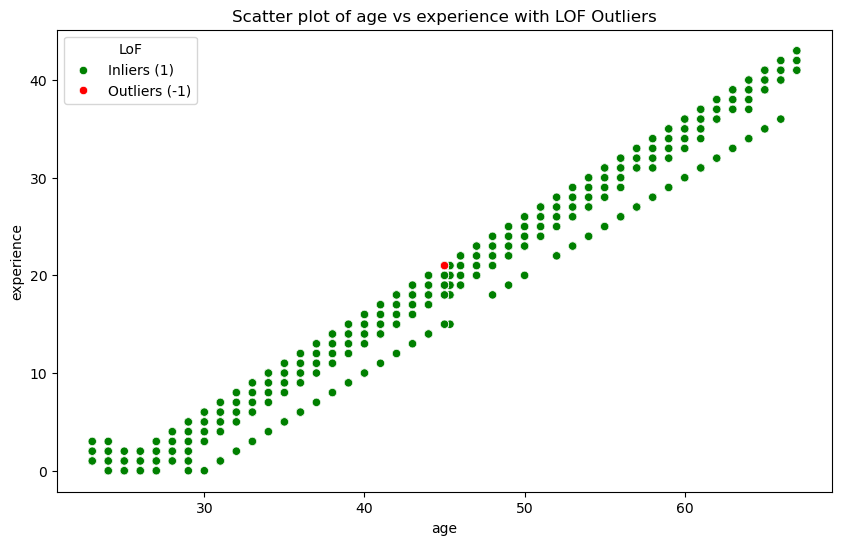

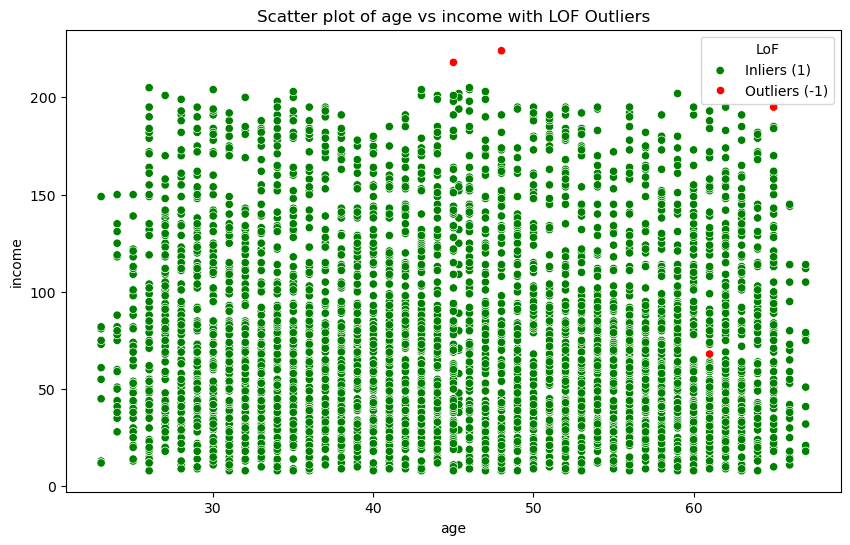

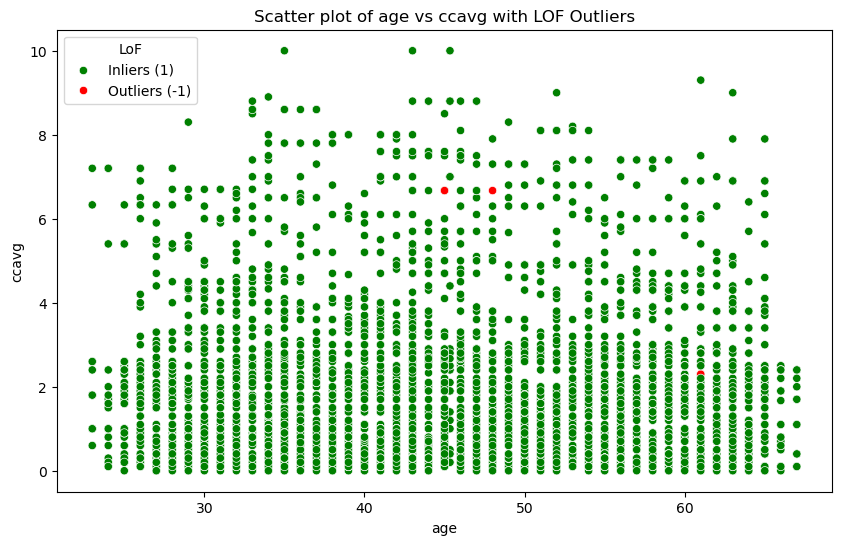

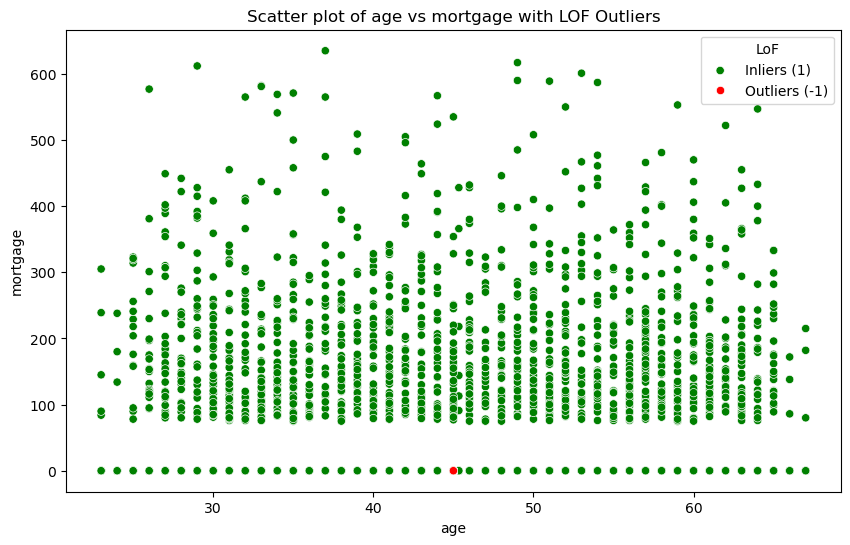

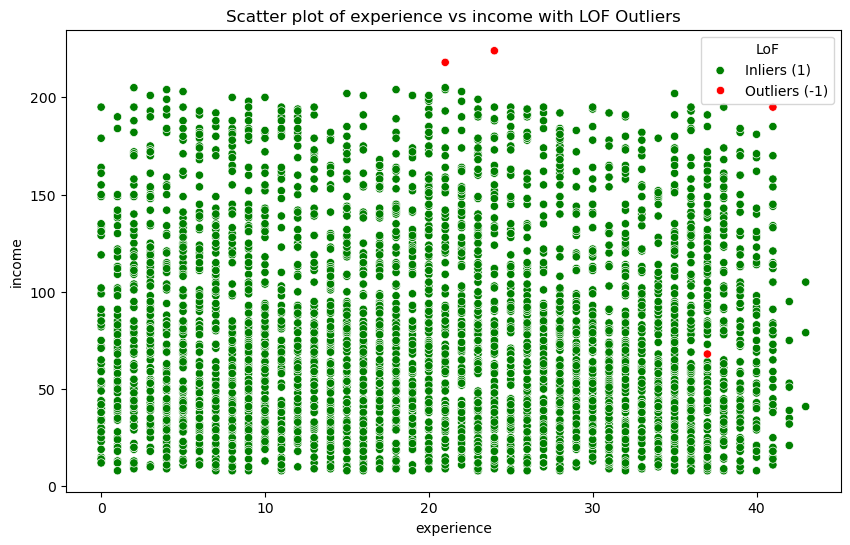

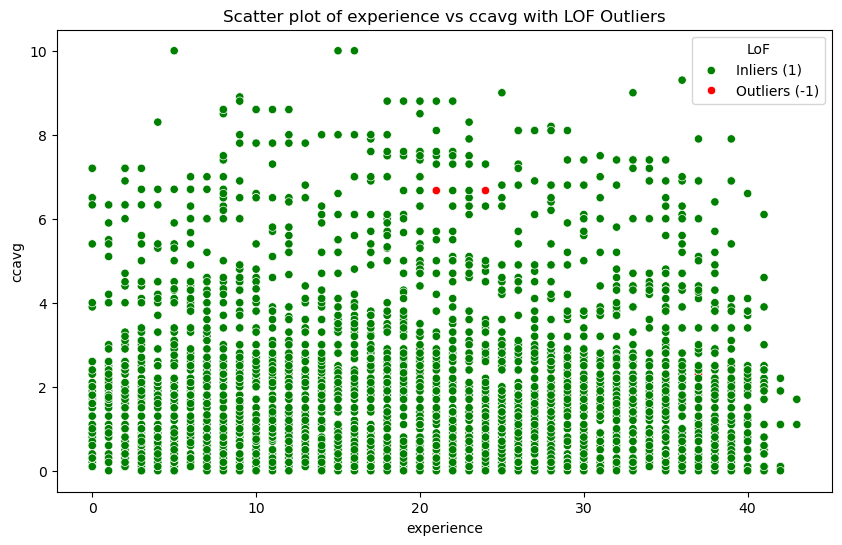

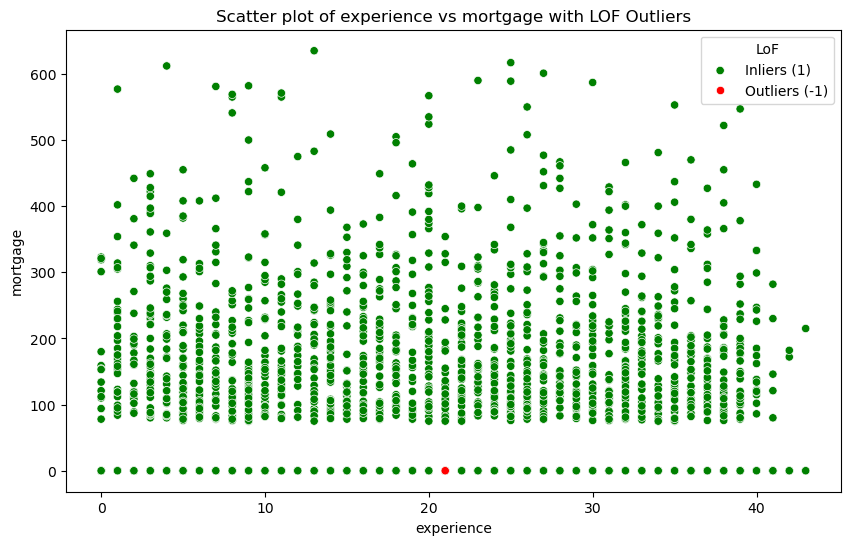

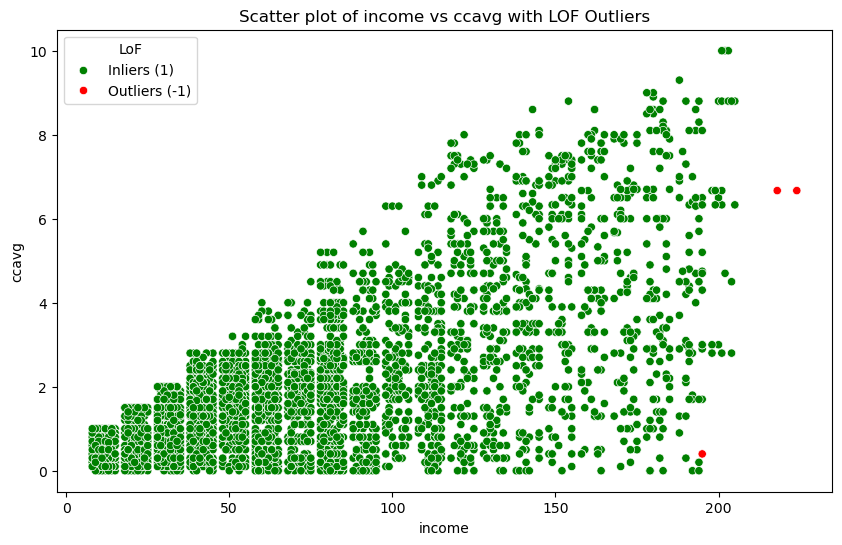

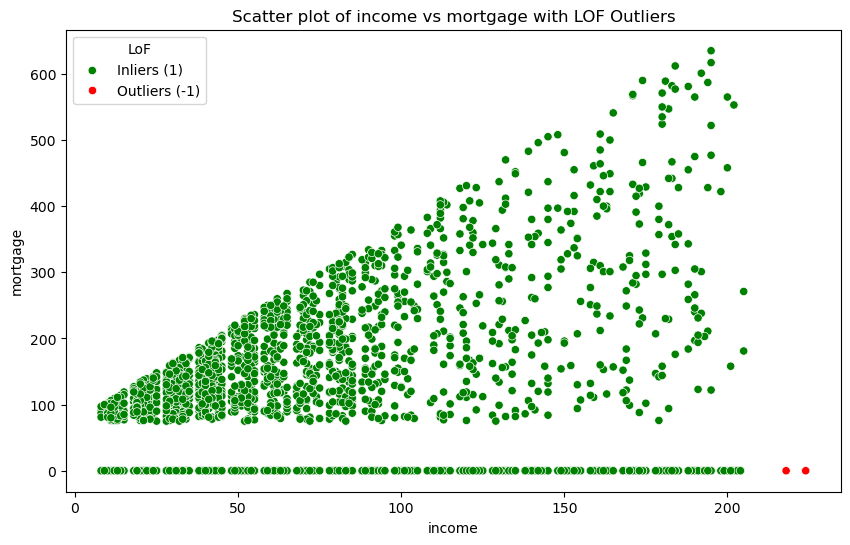

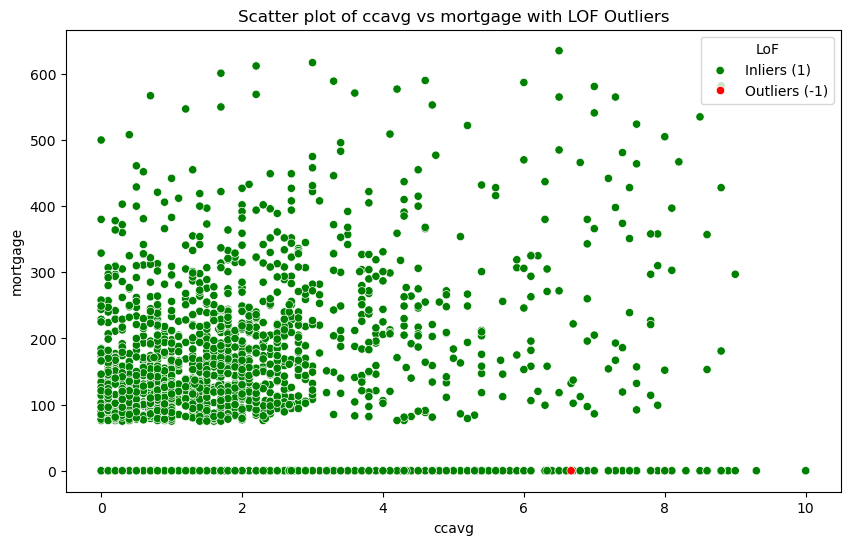

In [80]:
for i in range(len(numFeatures)):
    for j in range(i + 1, len(numFeatures)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=numFeatures[i], y=numFeatures[j], hue='lof_outlier', data=df, palette={-1:'r', 1:'g'})
        plt.title(f'Scatter plot of {numFeatures[i]} vs {numFeatures[j]} with LOF Outliers')
        plt.legend(title='LoF', labels=['Inliers (1)', 'Outliers (-1)'])
        plt.show()

#### Drop Outliers

In [81]:
df_original3 = df.copy() # save a deep copy of the df

### I have not dropped outliers as I am trying to train my model to learn some noice from this dataset as I would find similar outliers in new unseen data.

In [82]:
# drop 'lof_outlier' feature
df = df.drop('lof_outlier', axis = 1)

### T-Test

Assumptions
1. Are the two samples independent( here means mutually exclusivce)? (Assumed this is met)
2. Are the data from each of the 2 groups following a normal distribution? (CLT, ensures normality is not a major concern.)
3. Do the two samples have the same variances (Homogeneity of Variance)?(to be checked)\
Besides them we are not allowd to have significant outliers

**A general rule of thumb for equal variances is to compare the smallest and largest sample standard deviations. \
This is much like the rule of thumb for equal variances for the test for independent means. \
If the ratio of these two sample standard deviations falls within 0.5 to 2, then it may be that the assumption is not violated**

T-Test Hypothesis.

- H0: µyes = µno (the means of both populations are equal)
- H1: µyes ≠ µno (the means of both populations are not equal)

#### age vs personalLoan

#### Summarization

In [83]:
df.groupby(['personalLoan']).agg({'age':'mean'})#or 'Credit Score':np.mean

age
personalLoan      
0            45.37
1            45.07

In [84]:
df.groupby(['personalLoan']).agg({'age':'describe'})

age                                          
               count  mean   std   min   25%   50%   75%   max
personalLoan                                                  
0            4520.00 45.37 11.45 23.00 35.00 45.34 55.00 67.00
1             480.00 45.07 11.59 26.00 35.00 45.00 55.00 65.00

#### Visulization

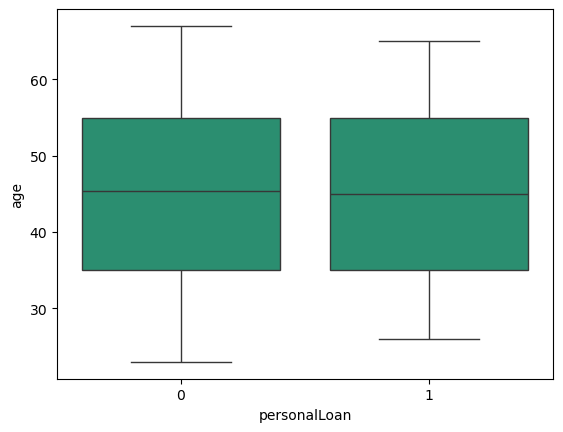

In [85]:
ax = sns.boxplot(x='personalLoan', y='age', data=df)
plt.show()

No outliers

In [86]:
yes = df[(df['personalLoan']==1)]
no = df[(df['personalLoan']==0)]
yes.shape, no.shape

((480, 18), (4520, 18))

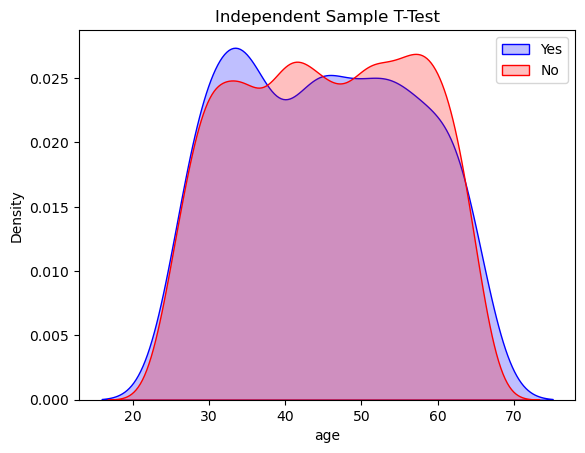

In [87]:
# import seaborn as sns
# import matplotlib.pyplot as plt

sns.kdeplot(yes['age'], fill=True, color='blue', label='Yes')
sns.kdeplot(no['age'], fill=True, color='red', label='No')

plt.title("Independent Sample T-Test")
plt.legend() 
plt.show()

We are ready to test statistically whether these two samples have a different mean using the T-Test. \
To do so first, we have to define our Null and Alternate Hypothesis.

In [88]:
yes=yes.drop(yes[yes['age'].isnull()].index)
no=no.drop(no[no['age'].isnull()].index)
a=yes['age']
b=no['age']
a.shape, b.shape

((480,), (4520,))

I do not have missing values

### Levene Test to check equality of variances across groups.
Levene's test, tests if the different goups have equal variances (Levene, 1960)

In [89]:
# from scipy import stats
stats.levene(a, b) # a is age of who bought personal loans earlier and b is who didn't.

LeveneResult(statistic=0.23827753959944994, pvalue=0.6254743571098551)

- Statistic = 0.238 → A low test statistic indicates little difference in variance between the groups
- p-value = 0.625 → Since the p-value is greater than 0.05, we fail to reject the null hypothesis, meaning there is no significant difference in variances.

In [90]:
tStat, pValue = stats.ttest_ind(a, b, equal_var = True) # equal_var = False runs independent sample T-Test for unequal variance(Welch’s t-test)
print(f"P-Value: {pValue:.5f} | T-Statistic: {tStat:.5f}") # print the P-Value and the T-Statistic

P-Value: 0.58555 | T-Statistic: -0.54534


- T-Statistic = -0.54534 → This measures the difference between the sample means in terms of standard error. A small absolute value (near zero) suggests weak evidence against the null hypothesis.
- P-Value = 0.58555 → Since the p-value is greater than 0.05, we fail to reject the null hypothesis at a 5% significance level.

Conclusion
- Age does not have a statistically significant impact on personal loan sales based on this test.
- There is no strong evidence suggesting that younger or older customers behave differently when it comes to borrowing personal loans.
- This suggests that other factors might play a more critical role in determining customer behavior rather than age alone

### Income vs personalLoan

#### Summarization

In [91]:
df.groupby(['personalLoan']).agg({'income':'mean'}) 

income
personalLoan        
0              66.24
1             144.75

In [92]:
df.groupby(['personalLoan']).agg({'income':'describe'})

income                                               
               count   mean   std   min    25%    50%    75%    max
personalLoan                                                       
0            4520.00  66.24 40.58  8.00  35.00  59.00  84.00 224.00
1             480.00 144.75 31.58 60.00 122.00 142.50 172.00 203.00

#### Visulization

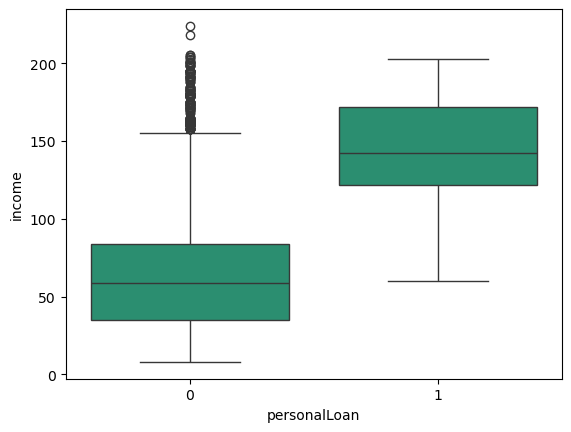

In [93]:
ax = sns.boxplot(x='personalLoan', y='income', data=df)
plt.show()

No majot outliers

#### Check Homogeneity of Variance

In [94]:
yes = df[(df['personalLoan']==1)]
no = df[(df['personalLoan']==0)]
yes.shape, no.shape

((480, 18), (4520, 18))

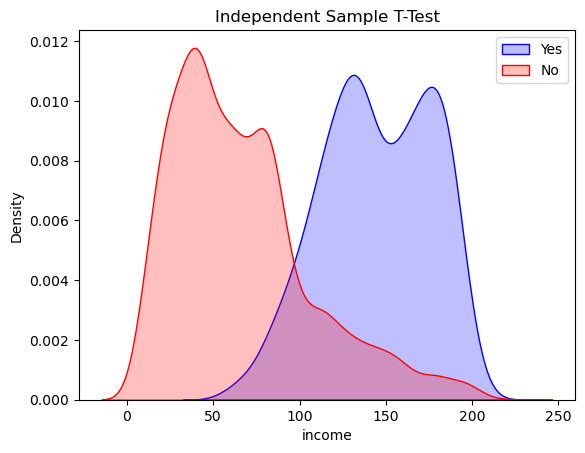

In [95]:
# import seaborn as sns
# import matplotlib.pyplot as plt

sns.kdeplot(yes['income'], fill=True, color='blue', label='Yes')
sns.kdeplot(no['income'], fill=True, color='red', label='No')

plt.title("Independent Sample T-Test")
plt.legend() 
plt.show()

We are ready to test statistically whether these two samples have a different mean using the T-Test.

In [96]:
yes=yes.drop(yes[yes['income'].isnull()].index)
no=no.drop(no[no['income'].isnull()].index)
p=yes['income']
q=no['income']
p.shape, q.shape

((480,), (4520,))

I do not have missing values

### Levene Test to check equality of variances across groups.

In [97]:
# from scipy import stats
stats.levene(p, q) # p is income of customers who bought a P/L and b is who didn't

LeveneResult(statistic=12.834946395482158, pvalue=0.0003434450546349119)

- Statistic = 12.83 → A high test statistic suggests a substantial difference in variance between income groups.
- p-value = 0.00034 → Since this value is significantly less than 0.05, we reject the null hypothesis, meaning the variances of income across different loan groups are NOT equal
- Since variances are not equal, ``the Welch’s t-test`` (Satterthwaite approximation) is the correct choice for comparing group means.
- Welch’s t-test adjusts for unequal variances, ensuring a reliable comparison.
- Since Welch’s t-test does not assume equal variances, we can proceed without concern for homogeneity of variance.

note: 
In this scenario rule of thumb on group varience was not accurate.\
This would have happend may be due to the skewness in data (as we saw in boxplot for class 0 and some outliers in that group)\
So, standard deviation alone may not capture variance disparities properly, while Levene's test detects them


#### Welch’s t-test
- H0: µyes = µno (the means of both populations are equal)
- H1: µyes ≠ µno (the means of both populations are not equal)

In [98]:
tStat, pValue = stats.ttest_ind(a, b, equal_var = False) #equal_var = False runs independent sample T-Test for unequal variance(Welch’s t-test)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))#print the P-Value and the T-Statistic

P-Value:0.5894131740139402 T-Statistic:-0.5399857001227014


- T-Statistic = -0.54 -> A small absolute t-value suggests that the means of the two groups are very close, implying minimal difference.
- P-Value = 0.5894 -> Since this is greater than 0.05, we fail to reject the null hypothesis, meaning there is no strong evidence that the groups differ significantly.
- Conclusion: The tested characteristic does not significantly impact the grouping variable. Further analysis or a larger sample might be required to confirm the trend

### Anova Test

Assumptions
1. Are the two samples independent(here means mutually exclusivce)? (Assumed this is met)
2. Are the data from each of the groups following a normal distribution? (CLT, ensures normality is not a major concern.)
3. Do the samples have the same variances (Homogeneity of Variance)?(Needs to check) Variances across all groups should be equal
4. Besides them we are not allowd to have significant outliers

Anova-Test Hypothesis

- H0: All group means are equal.
- H1: At least one group mean is significantly different from the others.

#### Income vs Family

#### Summarization

In [99]:
df.groupby(['family']).agg({'age':'mean'})#or 'Credit Score':np.mean

age
family      
1      45.76
2      45.50
3      46.13
4      44.02

In [100]:
df.groupby(['family']).agg({'age':'describe'})

age                                          
         count  mean   std   min   25%   50%   75%   max
family                                                  
1      1472.00 45.76 10.94 23.00 36.00 47.00 54.00 67.00
2      1296.00 45.50 11.48 23.00 36.00 45.00 56.00 67.00
3      1010.00 46.13 11.51 23.00 37.00 45.00 56.00 67.00
4      1222.00 44.02 11.91 23.00 33.00 44.00 54.00 67.00

#### Visulization

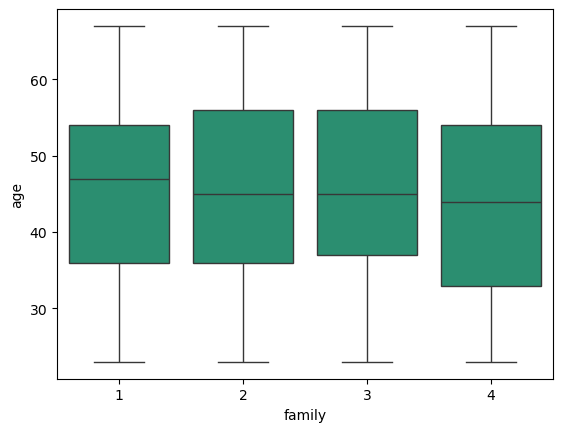

In [101]:
sns.boxplot(x='family', y='age', data=df)
plt.show()

No outliers

In [102]:
df[df['family']==1]['age']

2      39.00
3      35.00
7      50.00
9      34.00
14     67.00
        ... 
4986   32.00
4988   34.00
4989   24.00
4991   51.00
4995   29.00
Name: age, Length: 1472, dtype: float64

#### Levene Test to check equality of variances across groups

In [103]:
grp1=df[df['family']==1]['age']
grp2=df[df['family']==2]['age']
grp3=df[df['family']==3]['age']
grp4=df[df['family']==4]['age']

In [104]:
stats.levene(grp1, grp2, grp3, grp4)

LeveneResult(statistic=9.552952232488241, pvalue=2.744145414468508e-06)

- Statistic = 9.55 -> This relatively high test statistic suggests a considerable difference in variance between age distributions across different family size groups.
- p-value = 2.74e-06 -> Since the p-value is much smaller than 0.05, we reject the null hypothesis, meaning the variances of age across different family sizes are NOT equal
- Age variance significantly differs among different family size categories.
- Some family sizes may have a wider spread of ages, while others may be more clustered around certain age ranges.
- Hence I need to perform Welch’s ANOVA instead of standard ANOVA to accommodate this variance difference.

In [105]:
# import pingouin as pg
df_a = df[['family', 'age']].dropna()
print(pg.welch_anova(dv='age', between='family', data=df_a))

   Source  ddof1   ddof2    F  p-unc  np2
0  family      3 2674.12 7.37   0.00 0.00


ddof1 (Degrees of Freedom Between Groups)\
ddof2 (Degrees of Freedom Within Groups)\
F (F-statistic)

- ddof1 = 3: This represents the degrees of freedom between groups, (there are 4 groups in the analysis).
- ddof2 = 2674.12: This represents the degrees of freedom within groups (related to the sample size and residual variance).
- F-statistic = 7.37 : This indicates a moderate difference in age between family groups.
- p-value = 0.00 : ``Since the p-value is significantly less than 0.05, we reject the null hypothesis``.
- **Conclusion: There is statistically significant evidence that at least one family group mean differs from the others**

Conclusion:
- Age varies significantly across different family groups, meaning family size affects age distributions.
- However, the effect size is very small, indicating that family size may not be a strong determinant of age differences.
- Since Welch’s ANOVA confirmed significant differences, I have to perform post-hoc tests (e.g., Games-Howell test) to pinpoint which specific family groups differ in age

### Games-Howell post-hoc test

So The mean of at-least one group is significantly different.\
We can then perform the Games-Howell post-hoc test to determine exactly which group means are different:

H0: There is no significant difference between the means of the groups being compared\
H1: At least one group differs significantly from another


In [106]:
pg.pairwise_gameshowell(dv='age', between='family', data=df_a)

A  B  mean(A)  mean(B)  diff   se     T      df  pval  hedges
0  1  2    45.76    45.50  0.26 0.43  0.62 2683.42  0.93    0.02
1  1  3    45.76    46.13 -0.37 0.46 -0.80 2096.38  0.86   -0.03
2  1  4    45.76    44.02  1.74 0.44  3.92 2509.03  0.00    0.15
3  2  3    45.50    46.13 -0.63 0.48 -1.31 2166.50  0.56   -0.05
4  2  4    45.50    44.02  1.48 0.47  3.17 2493.34  0.01    0.13
5  3  4    46.13    44.02  2.11 0.50  4.24 2176.86  0.00    0.18

Interpretation:\
p < 0.05\
Statistically Significant Differences between age and fam size:
- Family size 1 vs. 4 (pval = 0.00)
- Family size 2 vs. 4 (pval = 0.01)
- Family size 3 vs. 4 (pval = 0.00)


p ≥ 0.05\
No Statistically Significant Differences between age and fam size:
- Family size 1 vs. 2 (pval = 0.93)
- Family size 1 vs. 3 (pval = 0.87)
- Family size 2 vs. 3 (pval = 0.58)

### Pair Plot for Continuous Features

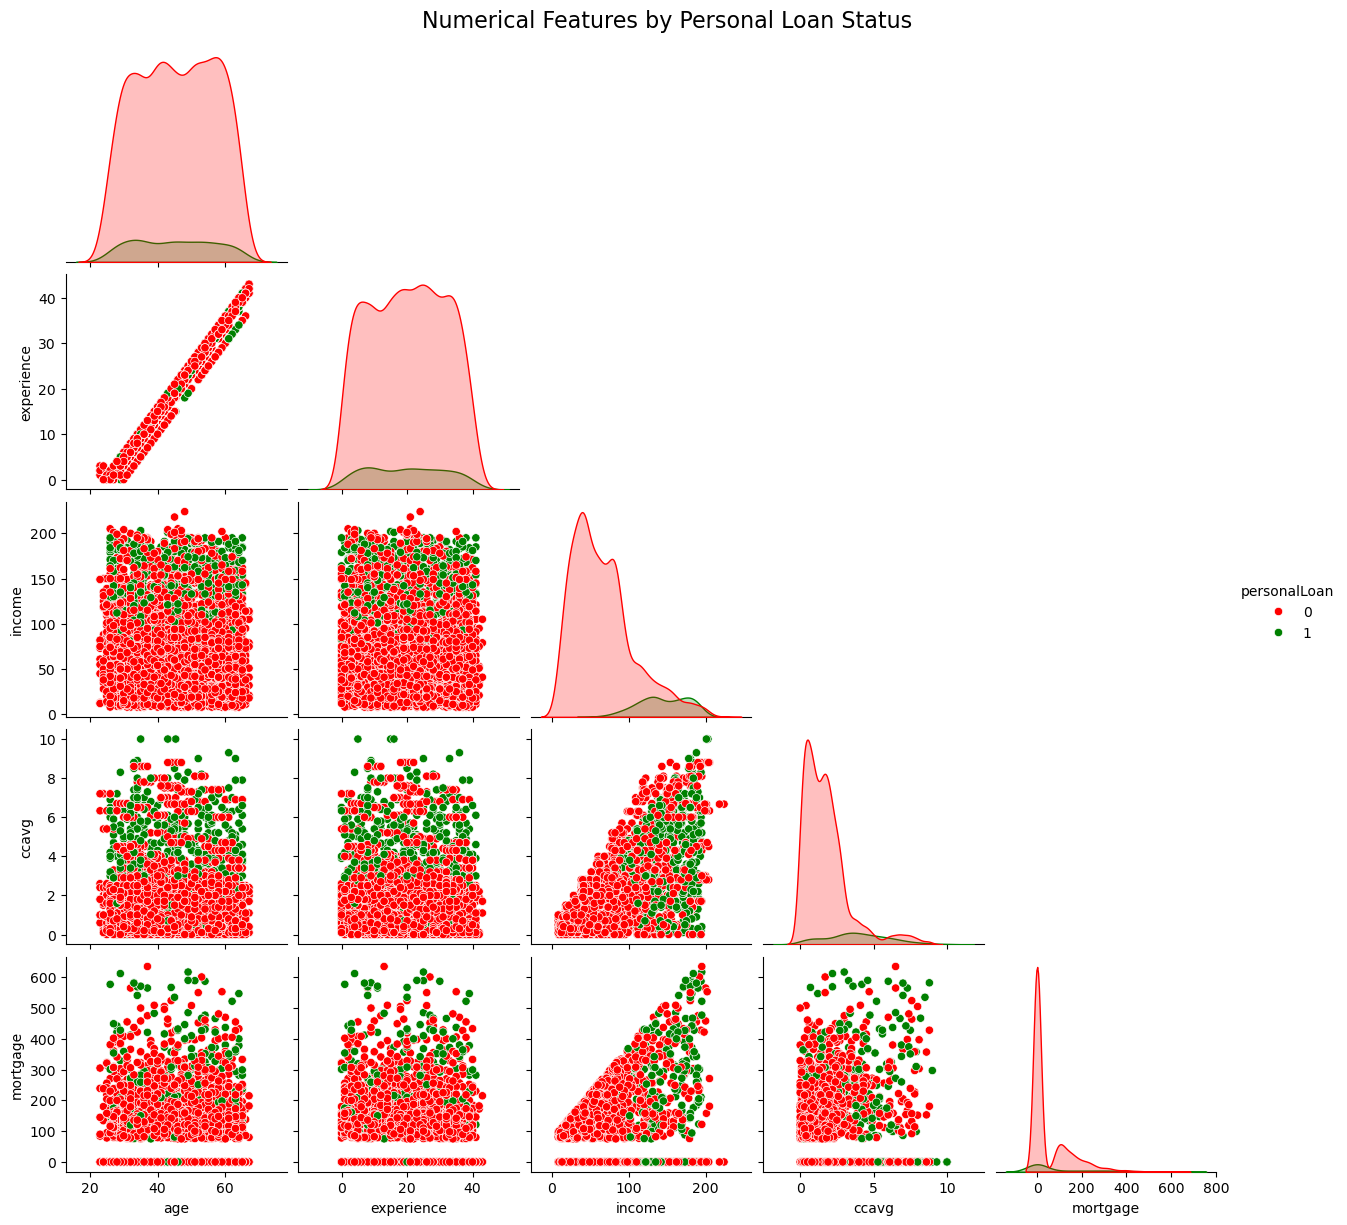

In [107]:
sns.set_palette(sns.color_palette("colorblind", 8))
g = sns.pairplot(df, hue="personalLoan", palette=['red', 'green'], corner=True)
# Set title with adjusted spacing
g.fig.suptitle('Numerical Features by Personal Loan Status', fontsize=16)
g.fig.subplots_adjust(top=0.95)  # Adjust top margin to prevent overlap

plt.show()

#### Scatterplots

Pearson Correlation between age and experience: 0.99398


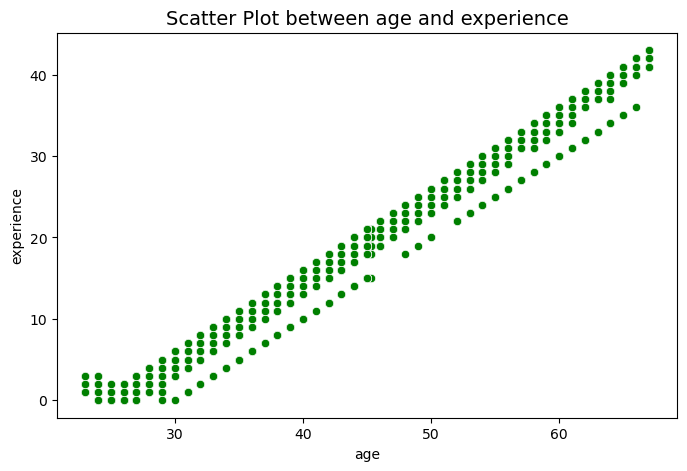

Pearson Correlation between age and income: -0.05520


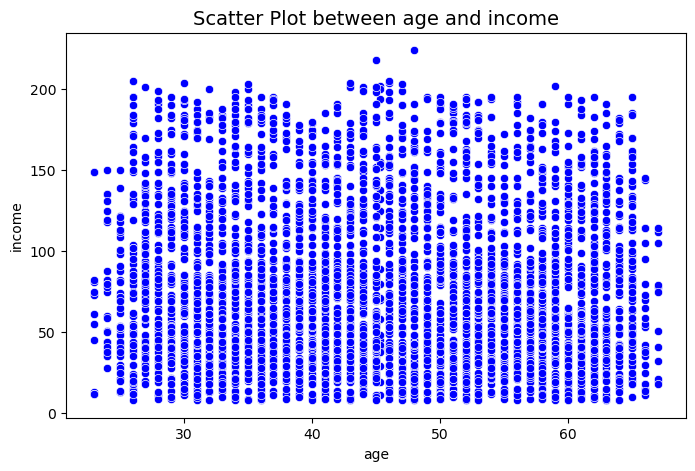

Pearson Correlation between age and ccavg: -0.05189


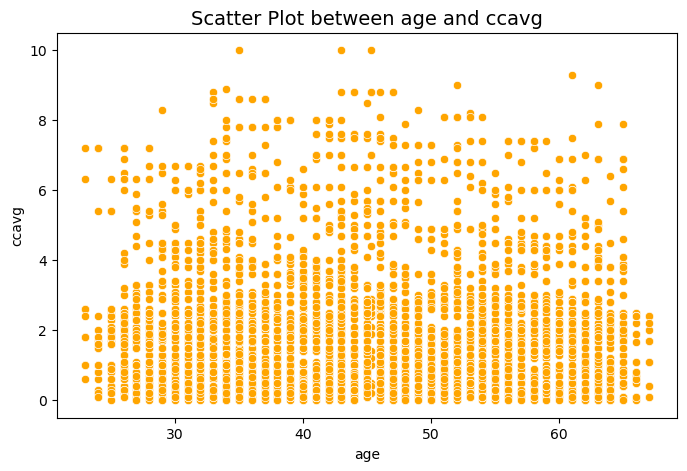

Pearson Correlation between age and mortgage: -0.01254


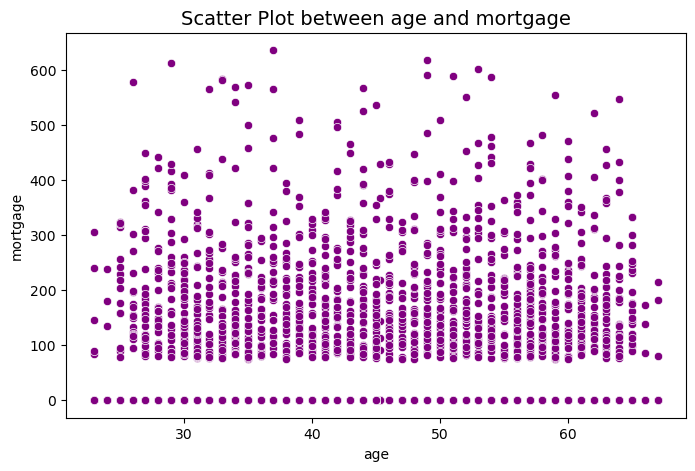

Pearson Correlation between experience and income: -0.04688


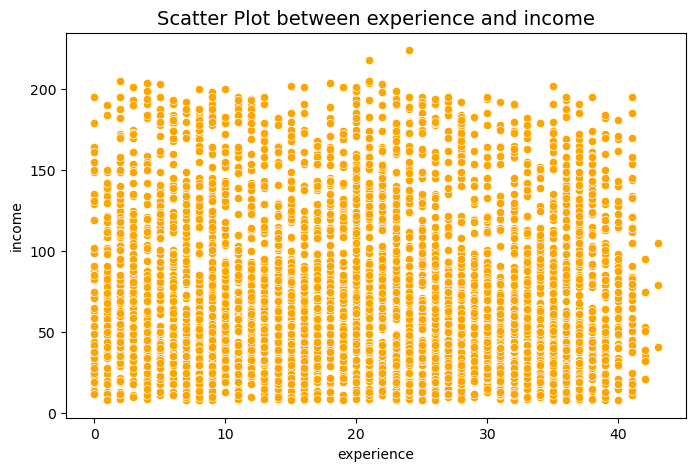

Pearson Correlation between experience and ccavg: -0.04974


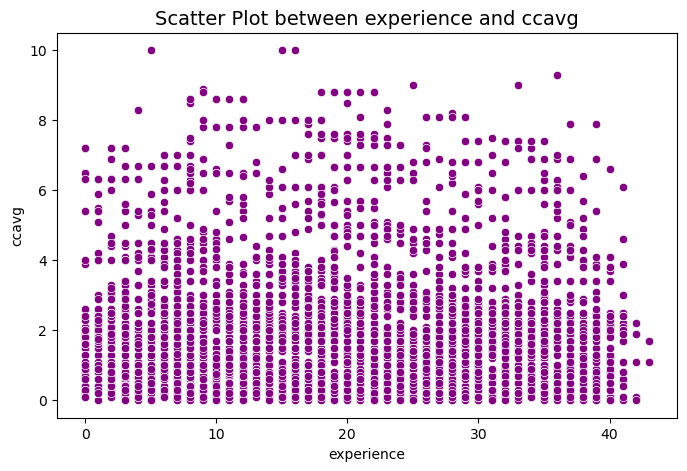

Pearson Correlation between experience and mortgage: -0.01110


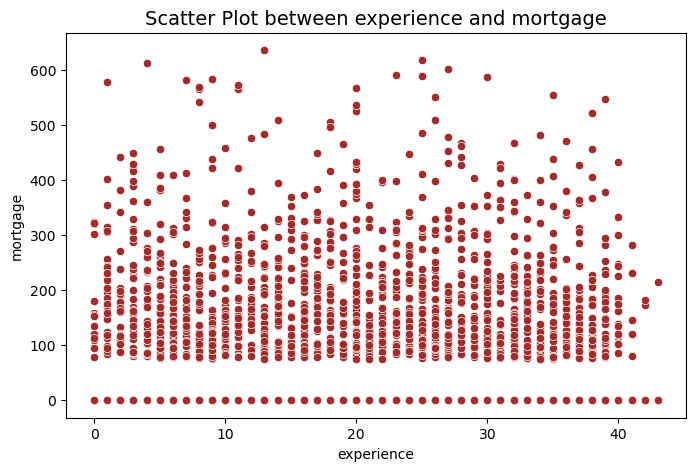

Pearson Correlation between income and ccavg: 0.64598


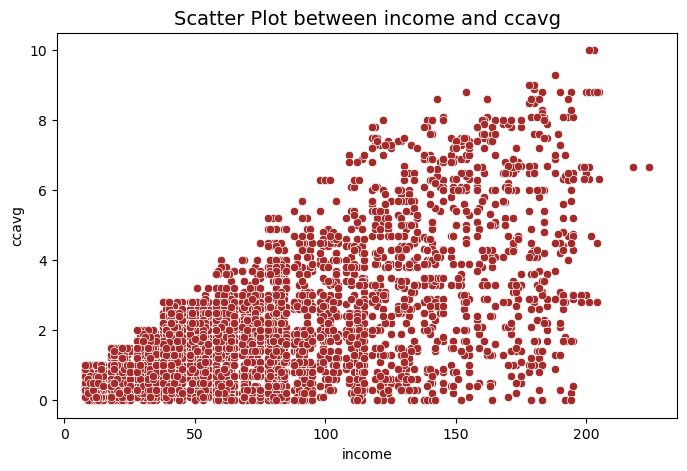

Pearson Correlation between income and mortgage: 0.20681


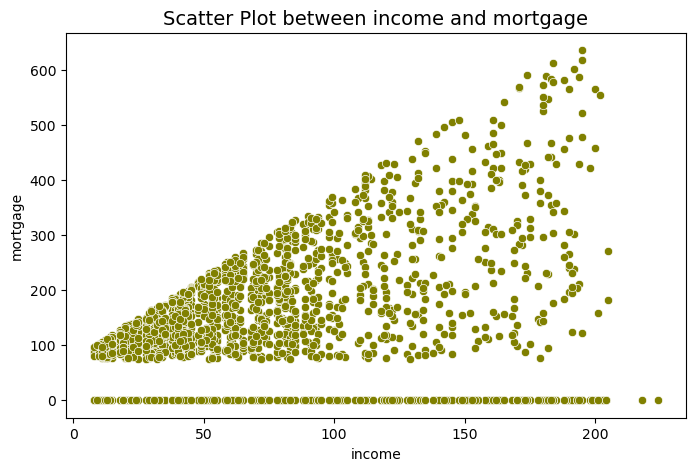

Pearson Correlation between ccavg and mortgage: 0.10990


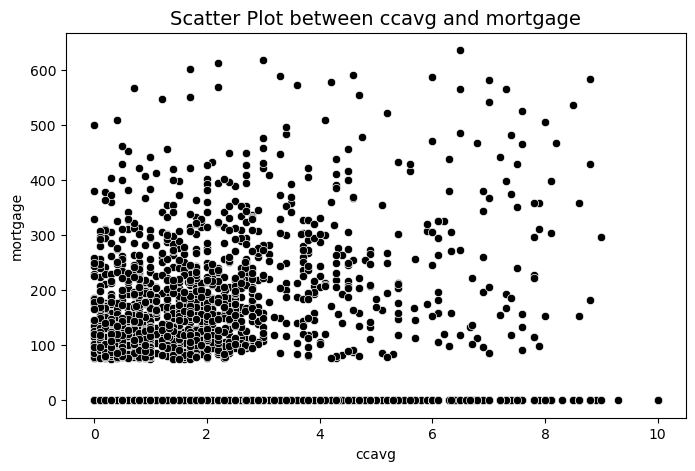

In [108]:

# Scatter plots for all combinations of numerical variables
for i in range(len(numFeatures)):
    for j in range(i + 1, len(numFeatures)):        
        plt.figure(figsize=(8, 5))       

        correlation = df[numFeatures[i]].corr(df[numFeatures[j]])  # Calculate correlation
        print(f"Pearson Correlation between {numFeatures[i]} and {numFeatures[j]}: {correlation:.5f}")

        # Create scatter plot with a unique color
        colors = ['red', 'green', 'blue','orange', 'purple', 'brown', 'olive', 'black']
        sns.scatterplot(x=numFeatures[i], y=numFeatures[j], data=df, color=colors[(i + j) % len(colors)])
        
        plt.title(f'Scatter Plot between {numFeatures[i]} and {numFeatures[j]}', fontsize=14)
        plt.xlabel(numFeatures[i])
        plt.ylabel(numFeatures[j])
        plt.show()

### Drop irrelevant features
- "experience","zipCode","agebin","incomeBin","spendingBin","county_name"

In [109]:
df.drop(columns=["experience","zipCode","ageBin","incomeBin","spendingBin","county_name"], inplace=True)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                5000 non-null   float64 
 1   income             5000 non-null   int64   
 2   family             5000 non-null   category
 3   ccavg              5000 non-null   float64 
 4   education          5000 non-null   category
 5   mortgage           5000 non-null   int64   
 6   personalLoan       5000 non-null   category
 7   securitiesAccount  5000 non-null   category
 8   cdAccount          5000 non-null   category
 9   online             5000 non-null   category
 10  creditcard         5000 non-null   category
 11  region             5000 non-null   category
dtypes: category(8), float64(2), int64(2)
memory usage: 196.6 KB


## Assign Input (X) and Output (y) variable

In [111]:
X = df.drop(['personalLoan'], axis=1)
y = df['personalLoan']

In [112]:
df.describe(include='category')

family  education  personalLoan  securitiesAccount  cdAccount  online  \
count     5000       5000          5000               5000       5000    5000   
unique       4          3             2                  2          2       2   
top          1          1             0                  0          0       1   
freq      1472       2096          4520               4478       4698    2984   

        creditcard    region  
count         5000      5000  
unique           2         5  
top              0  Bay area  
freq          3530      1937

### Encoding categorical Features
- Since 'securitiesAccount','cdAccount','online','creditcard', are binary, I only need to encode, 'family', 'education', 'region'

In [113]:
oneHotCols=['family','education', 'region']
X=pd.get_dummies(X,columns=oneHotCols,drop_first=True)
X.head(2)

age  income  ccavg  mortgage securitiesAccount cdAccount online  \
0 25.00      49   1.60         0                 1         0      0   
1 45.00      34   1.50         0                 1         0      0   

  creditcard  family_2  family_3  family_4  education_2  education_3  \
0          0     False     False      True        False        False   
1          0     False      True     False        False        False   

   region_Central  region_Los Angeles  region_Southern  region_Superior  
0           False                True            False            False  
1           False                True            False            False

### Compute VIF 

Best Approach?
- Apply pd.get_dummies(df, drop_first=True).
- Check VIF (Variance Inflation Factor) after encoding.
- Drop features with high VIF values (>10) if necessary.


Best Approach:
- Check multicollinearity first (using Variance Inflation Factor - VIF or correlation matrix).
- Remove highly collinear features if necessary (drop redundant variables or use dimensionality reduction like PCA).
- Proceed with train-test splitting (on cleaned data).
- Apply scaling on numerical features to optimize model performance.



Since I did not encode binary features, let's convert them into numerical type before I check VIF

In [114]:
X = X.astype(float).copy()

#### Check the VIF valus of the feature variables. 

In [115]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

def calculate_vif(df, threshold=10):
    """
    Calculate and iteratively remove features with high VIF.
    Only numeric columns are evaluated. Original DataFrame is not modified.
    """
    df = df.copy()
    non_numeric = df.select_dtypes(exclude=['number'])  # To preserve if needed
    num_df = df.select_dtypes(include=['number'])

    while True:
        vif_data = pd.DataFrame()
        vif_data['Features'] = num_df.columns
        try:
            vif_data['VIF'] = [variance_inflation_factor(num_df.values, i)
                               for i in range(num_df.shape[1])]
        except np.linalg.LinAlgError:
            print("Matrix inversion failed — check for perfectly collinear columns.")
            break

        max_vif = vif_data['VIF'].max()
        if max_vif > threshold:
            drop_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'Features']
            print(f"Dropping '{drop_feature}' due to high VIF = {max_vif:.2f}")
            num_df = num_df.drop(columns=[drop_feature])
        else:
            break

    print("\nFinal VIF Results:")
    print(vif_data[vif_data['Features'].isin(num_df.columns)])

    # Optionally return numeric + non-numeric parts
    return pd.concat([num_df, non_numeric], axis=1)


In [116]:
calculate_vif(X, threshold=10)


Final VIF Results:
              Features  VIF
0                  age 7.39
1               income 6.11
2                ccavg 3.84
3             mortgage 1.37
4    securitiesAccount 1.26
5            cdAccount 1.39
6               online 2.45
7           creditcard 1.54
8             family_2 1.79
9             family_3 1.64
10            family_4 1.72
11         education_2 1.68
12         education_3 1.70
13      region_Central 1.19
14  region_Los Angeles 1.52
15     region_Southern 1.69
16     region_Superior 1.05


age  income  ccavg  mortgage  securitiesAccount  cdAccount  online  \
0    25.00   49.00   1.60      0.00               1.00       0.00    0.00   
1    45.00   34.00   1.50      0.00               1.00       0.00    0.00   
2    39.00   11.00   1.00      0.00               0.00       0.00    0.00   
3    35.00  100.00   2.70      0.00               0.00       0.00    0.00   
4    35.00   45.00   1.00      0.00               0.00       0.00    0.00   
...    ...     ...    ...       ...                ...        ...     ...   
4995 29.00   40.00   1.90      0.00               0.00       0.00    1.00   
4996 30.00   15.00   0.40     85.00               0.00       0.00    1.00   
4997 63.00   24.00   0.30      0.00               0.00       0.00    0.00   
4998 65.00   49.00   0.50      0.00               0.00       0.00    1.00   
4999 28.00   83.00   0.80      0.00               0.00       0.00    1.00   

      creditcard  family_2  family_3  family_4  education_2  education_3  \
0           0.00      0.00      0.00      1.00         0.00         0.00   
1           0.00      0.00      1.00      0.00         0.00         0.00   
2           0.00      0.00      0.00      0.00         0.00         0.00   
3           0.00      0.00      0.00      0.00         1.00         0.00   
4           1.00      0.00      0.00      1.00         1.00         0.00   
...          ...       ...       ...       ...          ...          ...   
4995        0.00      0.00      0.00      0.00         0.00         1.00   
4996        0.00      0.00      0.00      1.00         0.00         0.00   
4997        0.00      1.00      0.00      0.00         0.00         1.00   
4998        0.00      0.00      1.00      0.00         1.00         0.00   
4999        1.00      0.00      1.00      0.00         0.00         0.00   

      region_Central  region_Los Angeles  region_Southern  region_Superior  
0               0.00                1.00             0.00             0.00  
1               0.00                1.00             0.00             0.00  
2               0.00                0.00             0.00             0.00  
3               0.00                0.00             0.00             0.00  
4               0.00                1.00             0.00             0.00  
...              ...                 ...              ...              ...  
4995            0.00                0.00             1.00             0.00  
4996            0.00                0.00             1.00             0.00  
4997            0.00                0.00             1.00             0.00  
4998            0.00                1.00             0.00             0.00  
4999            0.00                0.00             1.00             0.00  

[5000 rows x 17 columns]

### Train Test Split

In [117]:
#Splitting data in train and test sets
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 17) (1500, 17) (3500,) (1500,)


In [118]:
y_train.value_counts(normalize=True)

personalLoan
0   0.90
1   0.10
Name: proportion, dtype: float64

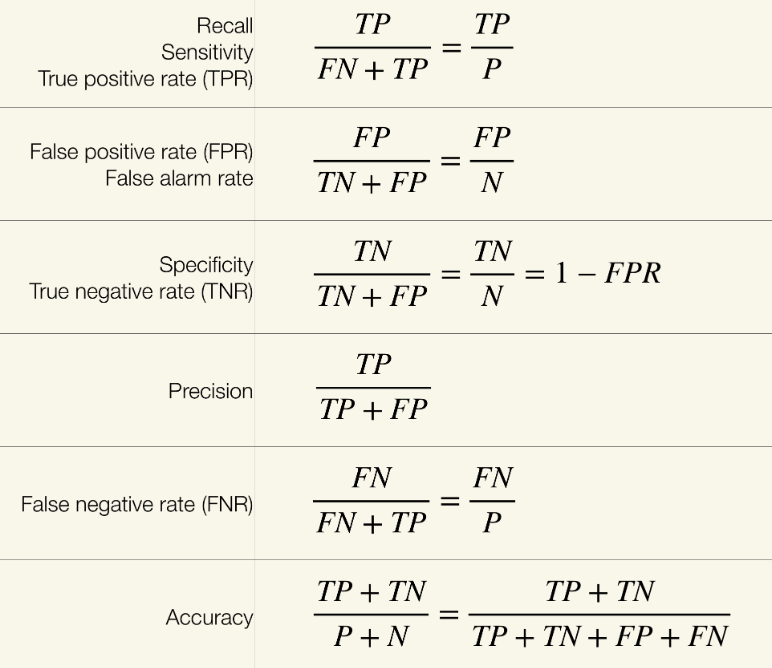

### Scaling Data

In [119]:
# from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
sc = StandardScaler()

# Fit and tranform on training data
X_train_scaled = sc.fit_transform(X_train) 

# Transform the test data using the same scaler
X_test_scaled  = sc.transform(X_test)

print(f"X_train_scaled shape: {X_train_scaled.shape}\nX_test_scaled shape:{X_test_scaled.shape}")

X_train_scaled shape: (3500, 17)
X_test_scaled shape:(1500, 17)


In [120]:
print(f"\nScaled X_train head:")
X_train_scaled


Scaled X_train head:


array([[ 0.14178119,  0.1556284 ,  0.42671114, ..., -0.52311907,
        -0.64709134, -0.13647824],
       [ 0.31534371, -0.92499573, -0.53179783, ...,  1.91161066,
        -0.64709134, -0.13647824],
       [ 0.9228125 , -0.19017132,  1.01788732, ..., -0.52311907,
         1.54537689, -0.13647824],
       ...,
       [ 1.00959376,  1.23625252,  0.44392986, ...,  1.91161066,
        -0.64709134, -0.13647824],
       [-0.46568761,  0.19885336, -0.53179783, ...,  1.91161066,
        -0.64709134, -0.13647824],
       [-1.33350018, -1.09789559, -0.58919357, ..., -0.52311907,
        -0.64709134, -0.13647824]])

In [121]:
print(f"\nScaled X_test head:")
X_test_scaled


Scaled X_test head:


array([[ 1.44350004, -0.64403345, -0.01523611, ..., -0.52311907,
         1.54537689, -0.13647824],
       [-1.33350018,  0.00434102,  0.15695113, ..., -0.52311907,
        -0.64709134, -0.13647824],
       [ 0.48890622, -0.94660821, -0.76138081, ...,  1.91161066,
        -0.64709134, -0.13647824],
       ...,
       [-1.42028143, -0.01727146, -0.64658932, ..., -0.52311907,
        -0.64709134, -0.13647824],
       [-0.72603138,  0.17724088,  0.15695113, ..., -0.52311907,
         1.54537689, -0.13647824],
       [-0.81281263,  1.90623948,  3.83027889, ..., -0.52311907,
        -0.64709134, -0.13647824]])

## Model building

### Model Evaluation Criteria: Optimizing Loan Customer Identification

### Prediction Errors in the Model:
A classification model can make two critical mistakes:
- ``False Positives`` – Predicting that a customer will take a loan when they actually don’t (resource misallocation).
- ``False Negatives`` – Predicting that a customer will not take a loan when they actually do (missed opportunity).

Which Error Matters More?
- Since the ``goal of the campaign is to acquire more customers``, ``minimizing False Negatives (Type II error)`` is crucial. \
  ``A missed potential customer means lost revenue and failed outreach by the sales team.``

How Can We Reduce False Negatives?
- ``Recall should be maximized``, as it measures how well the model identifies actual loan buyers.
- Accuracy is not a reliable metric due to data imbalance, if loan buyers are a minority, accuracy alone may be misleading.
- A higher Recall ensures fewer False Negatives, improving the chances of correctly identifying potential customers.

By prioritizing Recall, banks can ensure their marketing efforts effectively capture the right audience and increase customer acquisition.

### Run LazyClassifier first to get an idea
- Running LazyClassifier first in a machine learning classification project serves as a quick benchmarking tool before manually testing individual algorithms.

In [122]:
# from sklearn.svm import SVC
# from lazypredict.Supervised import LazyClassifier
import time 
start = time.time() 
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

end = time.time()
print(f"Execution time: {end-start} seconds")
models 

 97%|███████████████████████████████████████████████████████████████████████████████▎  | 30/31 [00:07<00:00,  4.59it/s]

[LightGBM] [Info] Number of positive: 336, number of negative: 3164
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.096000 -> initscore=-2.242481
[LightGBM] [Info] Start training from score -2.242481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:08<00:00,  3.60it/s]

Execution time: 8.638136386871338 seconds


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DecisionTreeClassifier             0.99               0.96     0.96      0.99   
XGBClassifier                      0.99               0.96     0.96      0.99   
BaggingClassifier                  0.99               0.96     0.96      0.99   
LGBMClassifier                     0.99               0.95     0.95      0.99   
RandomForestClassifier             0.99               0.95     0.95      0.99   
ExtraTreesClassifier               0.98               0.91     0.91      0.98   
ExtraTreeClassifier                0.96               0.90     0.90      0.96   
AdaBoostClassifier                 0.96               0.88     0.88      0.96   
SVC                                0.98               0.87     0.87      0.97   
Perceptron                         0.93               0.85     0.85      0.93   
LogisticRegression                 0.96               0.85     0.85      0.96   
NearestCentroid                    0.88               0.84     0.84      0.89   
PassiveAggressiveClassifier        0.94               0.84     0.84      0.94   
SGDClassifier                      0.95               0.83     0.83      0.95   
CalibratedClassifierCV             0.96               0.83     0.83      0.96   
LinearSVC                          0.96               0.83     0.83      0.96   
QuadraticDiscriminantAnalysis      0.93               0.82     0.82      0.94   
LinearDiscriminantAnalysis         0.95               0.80     0.80      0.94   
LabelSpreading                     0.94               0.78     0.78      0.94   
LabelPropagation                   0.94               0.78     0.78      0.94   
GaussianNB                         0.88               0.76     0.76      0.89   
KNeighborsClassifier               0.95               0.73     0.73      0.94   
RidgeClassifier                    0.94               0.68     0.68      0.92   
RidgeClassifierCV                  0.94               0.68     0.68      0.92   
BernoulliNB                        0.92               0.62     0.62      0.90   
DummyClassifier                    0.90               0.50     0.50      0.86   

                               Time Taken  
Model                                      
DecisionTreeClassifier               0.04  
XGBClassifier                        0.53  
BaggingClassifier                    0.13  
LGBMClassifier                       0.80  
RandomForestClassifier               0.65  
ExtraTreesClassifier                 0.55  
ExtraTreeClassifier                  0.03  
AdaBoostClassifier                   0.39  
SVC                                  0.47  
Perceptron                           0.02  
LogisticRegression                   0.06  
NearestCentroid                      0.04  
PassiveAggressiveClassifier          0.04  
SGDClassifier                        0.04  
CalibratedClassifierCV               0.14  
LinearSVC                            0.03  
QuadraticDiscriminantAnalysis        0.04  
LinearDiscriminantAnalysis           0.04  
LabelSpreading                       2.13  
LabelPropagation                     1.76  
GaussianNB                           0.04  
KNeighborsClassifier                 0.41  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.06  
BernoulliNB                          0.07  
DummyClassifier                      0.02

In [123]:
# Instantiate the classifiers
classifiers = [
    LogisticRegression(class_weight='balanced', random_state=42),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(class_weight='balanced', probability=True, random_state=42),
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    RandomForestClassifier(class_weight='balanced', random_state=42),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1, random_state=42),
    AdaBoostClassifier(random_state=42)
]

# Define a result list to collect metrics
results = []

# Train the models and compute metrics
for cls in classifiers:
    model = cls.fit(X_train_scaled, y_train)
    yproba = model.predict_proba(X_test_scaled)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)

    results.append({
        'classifiers': cls.__class__.__name__,
        'fpr': fpr,
        'tpr': tpr,
        'auc': auc
    })

# Convert the results list to a DataFrame
result_table = pd.DataFrame(results)
result_table.set_index('classifiers', inplace=True)

In [124]:
result_table

fpr  \
classifiers                                                                 
LogisticRegression      [0.0, 0.0, 0.0, 0.0007374631268436578, 0.00073...   
GaussianNB              [0.0, 0.0, 0.0, 0.0007374631268436578, 0.00073...   
KNeighborsClassifier    [0.0, 0.0, 0.0007374631268436578, 0.0029498525...   
SVC                     [0.0, 0.0, 0.0, 0.0007374631268436578, 0.00073...   
DecisionTreeClassifier                    [0.0, 0.01032448377581121, 1.0]   
RandomForestClassifier  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
XGBClassifier           [0.0, 0.0, 0.0, 0.0007374631268436578, 0.00073...   
AdaBoostClassifier      [0.0, 0.0, 0.0, 0.0007374631268436578, 0.00073...   

                                                                      tpr  auc  
classifiers                                                                     
LogisticRegression      [0.0, 0.006944444444444444, 0.3055555555555556... 0.97  
GaussianNB              [0.0, 0.006944444444444444, 0.0555555555555555... 0.91  
KNeighborsClassifier    [0.0, 0.125, 0.3055555555555556, 0.47222222222... 0.90  
SVC                     [0.0, 0.006944444444444444, 0.5486111111111112... 0.99  
DecisionTreeClassifier                     [0.0, 0.9166666666666666, 1.0] 0.95  
RandomForestClassifier  [0.0, 0.013888888888888888, 0.0277777777777777... 1.00  
XGBClassifier           [0.0, 0.006944444444444444, 0.9166666666666666... 1.00  
AdaBoostClassifier      [0.0, 0.006944444444444444, 0.3541666666666667... 0.98

In [125]:
result_table['Mean TPR'] =result_table['tpr'].apply(lambda x: np.mean(x))
result_table['Mean FPR'] = result_table['fpr'].apply(lambda x: np.mean(x))

In [126]:
result_table

fpr  \
classifiers                                                                 
LogisticRegression      [0.0, 0.0, 0.0, 0.0007374631268436578, 0.00073...   
GaussianNB              [0.0, 0.0, 0.0, 0.0007374631268436578, 0.00073...   
KNeighborsClassifier    [0.0, 0.0, 0.0007374631268436578, 0.0029498525...   
SVC                     [0.0, 0.0, 0.0, 0.0007374631268436578, 0.00073...   
DecisionTreeClassifier                    [0.0, 0.01032448377581121, 1.0]   
RandomForestClassifier  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
XGBClassifier           [0.0, 0.0, 0.0, 0.0007374631268436578, 0.00073...   
AdaBoostClassifier      [0.0, 0.0, 0.0, 0.0007374631268436578, 0.00073...   

                                                                      tpr  \
classifiers                                                                 
LogisticRegression      [0.0, 0.006944444444444444, 0.3055555555555556...   
GaussianNB              [0.0, 0.006944444444444444, 0.0555555555555555...   
KNeighborsClassifier    [0.0, 0.125, 0.3055555555555556, 0.47222222222...   
SVC                     [0.0, 0.006944444444444444, 0.5486111111111112...   
DecisionTreeClassifier                     [0.0, 0.9166666666666666, 1.0]   
RandomForestClassifier  [0.0, 0.013888888888888888, 0.0277777777777777...   
XGBClassifier           [0.0, 0.006944444444444444, 0.9166666666666666...   
AdaBoostClassifier      [0.0, 0.006944444444444444, 0.3541666666666667...   

                        auc  Mean TPR  Mean FPR  
classifiers                                      
LogisticRegression     0.97      0.75      0.09  
GaussianNB             0.91      0.61      0.13  
KNeighborsClassifier   0.90      0.48      0.16  
SVC                    0.99      0.82      0.06  
DecisionTreeClassifier 0.95      0.64      0.34  
RandomForestClassifier 1.00      0.73      0.04  
XGBClassifier          1.00      0.98      0.56  
AdaBoostClassifier     0.98      0.94      0.47

In [127]:
result_table[['Mean TPR', 'Mean FPR','auc']].sort_values(by = 'Mean FPR', ascending=True)

Mean TPR  Mean FPR  auc
classifiers                                    
RandomForestClassifier      0.73      0.04 1.00
SVC                         0.82      0.06 0.99
LogisticRegression          0.75      0.09 0.97
GaussianNB                  0.61      0.13 0.91
KNeighborsClassifier        0.48      0.16 0.90
DecisionTreeClassifier      0.64      0.34 0.95
AdaBoostClassifier          0.94      0.47 0.98
XGBClassifier               0.98      0.56 1.00

### Model Training and Evaluation

### Define Models and Param Grids

In [128]:
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "KNN": KNeighborsClassifier(),
#     "SVM": SVC(probability=True),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(),
#     "AdaBoost": AdaBoostClassifier(),
#     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# }

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42, n_jobs=-1),
    "KNN": KNeighborsClassifier(n_jobs=-1),
    "SVM": SVC(probability=True, class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced',random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced',random_state=42, n_jobs=-1),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=42)
}

In [129]:
# param_grids = {
#     "Logistic Regression": {"C": [0.01, 0.1, 0.5, 1, 10], "penalty": ["l1", "l2", "elasticnet", None], "solver": ["saga", "liblinear", 'newton-cholesky']},    
#     "KNN": {"n_neighbors": [5, 7, 9, 11, 13], "weights": ["distance", "uniform"], "metric" :["euclidean", "manhattan", "minkowski"] },  # Larger K for smoother decision boundary    
#     "SVM": {"C": [0.1, 0.5, 1], "kernel": ['linear', 'rbf'], "gamma": ['scale', 'auto']},  # Lower C & Gamma    
#     "Decision Tree": {"max_depth": [3, 5], "min_samples_split": [5, 10], "min_samples_leaf": [3, 5]},  # More constraints    
#     "Random Forest": {"n_estimators": [50, 100, 150],"max_depth": [5, 7, 10],"min_samples_split": [5, 10, 15],
#                       "min_samples_leaf": [3, 5],"max_features": ["sqrt", "log2", 0.5]},
#     "AdaBoost": {"n_estimators": [40, 50],"learning_rate": [0.3, 0.5],"algorithm": ["SAMME", "SAMME.R"]},
#     # "Random Forest": {"n_estimators": [100, 200], "max_depth": [5, 10], "min_samples_split": [5, 10],
#     #                   "min_samples_leaf": [3, 5], "max_features": ["sqrt", "log2"]},  # Reduced complexity    
#     # "AdaBoost": {"n_estimators": [30, 50], "learning_rate": [0.1, 0.3], "algorithm": ["SAMME", "SAMME.R"]},  # Adjusted Boosting    
#     "XGBoost": {"n_estimators": [75, 100], "learning_rate": [0.05, 0.1], "max_depth": [3, 4],
#                 "subsample": [0.75], "colsample_bytree": [0.75], "reg_alpha": [0.5], "reg_lambda": [0.6]}
# }

param_grids = {
    "Logistic Regression": {"C": [0.01, 0.1, 0.5, 1, 10], "penalty": ["l1", "l2", "elasticnet", None], "solver": ["saga", "liblinear", 'newton-cholesky']},
    "KNN": {"n_neighbors": [5, 7, 9, 11, 13], "weights": ["distance", "uniform"], "metric" :["euclidean", "manhattan", "minkowski"] },
    "SVM": {"C": [0.1, 0.5, 1], "kernel": ['linear', 'rbf'], "gamma": ['scale', 'auto']},
    "Decision Tree": {"max_depth": [4, 5, 6], "min_samples_split": [4, 5, 7], "min_samples_leaf": [4, 5, 7]},
    "Random Forest": {"n_estimators": [50, 100, 150],"max_depth": [5, 7, 10],"min_samples_split": [5, 10, 15],"min_samples_leaf": [3, 5],"max_features": ["sqrt", "log2", 0.5]},
    "AdaBoost": {"n_estimators": [40, 50],"learning_rate": [0.3, 0.5],"algorithm": ["SAMME", "SAMME.R"]},
    "XGBoost": {"n_estimators": [75, 100], "learning_rate": [0.05, 0.1], "max_depth": [3, 4],"subsample": [0.75], "colsample_bytree": [0.75], "reg_alpha": [0.5], "reg_lambda": [0.6]}
}

### Hyperparameter Tuning using StratifiedKFold(Classification)

In [130]:
start = time.time() 

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
best_estimators = {}

for name, model in models.items():
    print(f"\nTuning {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=cv, verbose=1, n_jobs=-1, scoring='recall')
    grid.fit(X_train_scaled, y_train)
    best_estimators[name] = grid.best_estimator_
    print(f"Best Params for {name}: {grid.best_params_}")
    
end = time.time()
print(f"\nExecution time: {end-start} seconds")


Tuning Logistic Regression...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Params for Logistic Regression: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

Tuning KNN...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Params for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

Tuning SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Params for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

Tuning Decision Tree...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Params for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 4}

Tuning Random Forest...
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Params for Random Forest: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 150}

Tuning AdaBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params for AdaBoo

### Evaluate Tuned Models

In [131]:
focused_results = {}
proba_dict = {}

for name, model in best_estimators.items():
    y_train_pred = model.predict(X_train_scaled)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    proba_dict[name] = y_proba

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    rec_train = recall_score(y_train, y_train_pred)
    cm = confusion_matrix(y_test, y_pred)
    overfit_gap = rec_train - rec

    focused_results[name] = {
        "Train Recall": rec_train,
        "Test Recall": rec,
        "Overfit Gap": overfit_gap,
        "Accuracy": acc,
        "Precision (class 1)": prec,
        "Recall (class 1)": rec,
        "AUC": auc,
        "Confusion Matrix": cm
    }

#### Create a Separate XGBoost with HP tuning(For manual tuning/Experimenting)

In [132]:
xgb_manual = XGBClassifier(
    n_estimators=75, # Reduced tree count to prevent overfitting
    learning_rate=0.17, # Smoother optimization
    max_depth=3, # Shallower trees for better generalization
    subsample=0.9, # Introduces randomness
    colsample_bytree=0.9, # Reduces feature correlation
    reg_alpha=0.1,  # L1 regularization
    reg_lambda=0.6,  # L2 regularization
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_manual.fit(X_train_scaled, y_train)
y_pred_manual_test = xgb_manual.predict(X_test_scaled)
y_pred_manual_train = xgb_manual.predict(X_train_scaled)
y_proba_manual = xgb_manual.predict_proba(X_test_scaled)[:, 1]

cm_manual = confusion_matrix(y_test, y_pred_manual_test)

print("\nUpdated Manual XGBoost Results:")
print(f"Accuracy (Test): {accuracy_score(y_test, y_pred_manual_test):.2f}")
print(f"Precision (Test): {precision_score(y_test, y_pred_manual_test):.2f}")
print(f"Recall (Test): {recall_score(y_test, y_pred_manual_test):.2f}")
print(f"AUC (Test): {roc_auc_score(y_test, y_proba_manual):.2f}")
print("Confusion Matrix (Test):")
print(cm_manual)

print("\nClassification Report (Train):")
print(classification_report(y_train, y_pred_manual_train))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_manual_test))

# storing evaluation metrics for your XGBoost (Manual) model into a dictionary
rec_train_manual = recall_score(y_train, y_pred_manual_train)
rec_test_manual = recall_score(y_test, y_pred_manual_test)

focused_results["XGBoost (Manual)"] = {
    "Train Recall": rec_train_manual,
    "Test Recall": rec_test_manual,
    "Overfit Gap": rec_train_manual - rec_test_manual,
    "Accuracy": accuracy_score(y_test, y_pred_manual_test),
    "Precision (class 1)": precision_score(y_test, y_pred_manual_test),
    "AUC": roc_auc_score(y_test, y_proba_manual),
    "Recall (class 1)": recall_score(y_test, y_pred_manual_test, average="binary", zero_division=0),  # Explicit class 1 recall
    "Confusion Matrix": cm_manual
}

best_estimators["XGBoost (Manual)"] = xgb_manual


Updated Manual XGBoost Results:
Accuracy (Test): 0.99
Precision (Test): 0.96
Recall (Test): 0.94
AUC (Test): 1.00
Confusion Matrix (Test):
[[1350    6]
 [   9  135]]

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3164
           1       0.99      0.93      0.96       336

    accuracy                           0.99      3500
   macro avg       0.99      0.97      0.98      3500
weighted avg       0.99      0.99      0.99      3500


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.96      0.94      0.95       144

    accuracy                           0.99      1500
   macro avg       0.98      0.97      0.97      1500
weighted avg       0.99      0.99      0.99      1500



### Display Results Ranked by Recall

In [133]:
results_df = pd.DataFrame(focused_results).T.sort_values(by=["Test Recall", "Overfit Gap"], ascending=[False, False])
print("\n================================= Model Performance Ranked by Recall ================================")
results_df


================================= Model Performance Ranked by Recall ================================


Train Recall Test Recall Overfit Gap Accuracy  \
Decision Tree               1.00        0.99        0.00     0.90   
Random Forest               0.99        0.97        0.02     0.90   
Logistic Regression         0.93        0.95       -0.02     0.87   
SVM                         0.95        0.94        0.01     0.92   
XGBoost (Manual)            0.93        0.94       -0.00     0.99   
XGBoost                     0.96        0.93        0.03     0.99   
AdaBoost                    0.72        0.76       -0.04     0.97   
KNN                         1.00        0.47        0.53     0.95   

                    Precision (class 1) Recall (class 1)  AUC  \
Decision Tree                      0.49             0.99 0.99   
Random Forest                      0.49             0.97 0.99   
Logistic Regression                0.42             0.95 0.96   
SVM                                0.55             0.94 0.98   
XGBoost (Manual)                   0.96             0.94 1.00   
XGBoost                            0.96             0.93 1.00   
AdaBoost                           0.92             0.76 0.98   
KNN                                0.94             0.47 0.92   

                            Confusion Matrix  
Decision Tree        [[1205, 151], [1, 143]]  
Random Forest        [[1211, 145], [5, 139]]  
Logistic Regression  [[1169, 187], [7, 137]]  
SVM                  [[1246, 110], [9, 135]]  
XGBoost (Manual)       [[1350, 6], [9, 135]]  
XGBoost               [[1350, 6], [10, 134]]  
AdaBoost             [[1346, 10], [35, 109]]  
KNN                    [[1352, 4], [76, 68]]

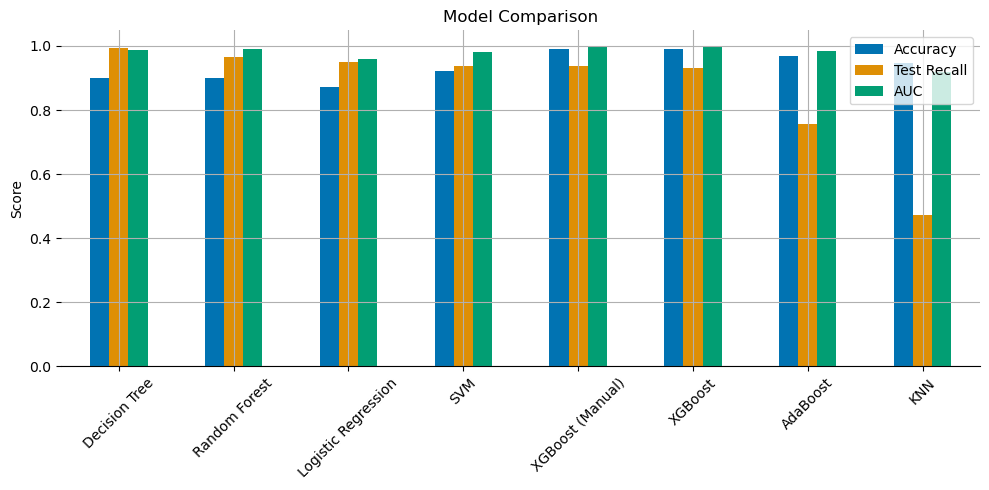

In [134]:
results_df[['Accuracy', 'Test Recall', 'AUC']].plot(kind='bar', figsize=(10,5))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.show()


### Check what's wrong with KNN py plotting KNN Validation Curve

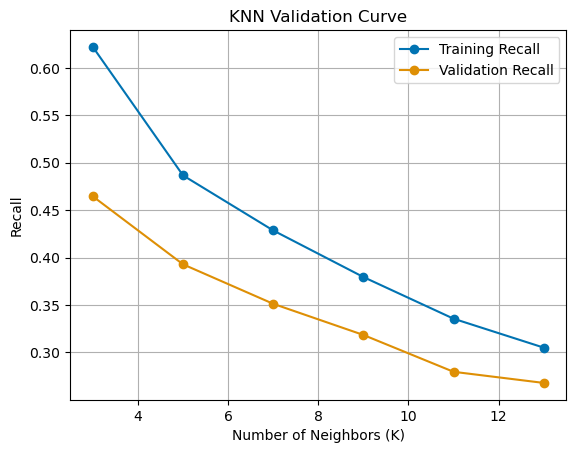

In [135]:
# from sklearn.model_selection import validation_curve
param_range = [3, 5, 7, 9, 11, 13]
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(n_jobs=-1),
    X_train_scaled,
    y_train,
    param_name="n_neighbors",
    param_range=param_range,
    cv=cv,
    scoring="recall"
)

mean_train = np.mean(train_scores, axis=1)
mean_test = np.mean(test_scores, axis=1)

plt.plot(param_range, mean_train, label="Training Recall", marker="o")
plt.plot(param_range, mean_test, label="Validation Recall", marker="o")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Recall")
plt.title("KNN Validation Curve")
plt.legend()
plt.grid()
plt.show()

in the hyper parameter tuning it has sellected right k=5 as we can see in above plot as well. So I will leave KNN model

### Plot Confusion Matrices & Show Classification Reports


Classification Report for Logistic Regression (Train):
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      3164
           1       0.41      0.93      0.57       336

    accuracy                           0.86      3500
   macro avg       0.70      0.89      0.74      3500
weighted avg       0.94      0.86      0.89      3500


Classification Report for Logistic Regression (Test):
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1356
           1       0.42      0.95      0.59       144

    accuracy                           0.87      1500
   macro avg       0.71      0.91      0.75      1500
weighted avg       0.94      0.87      0.89      1500



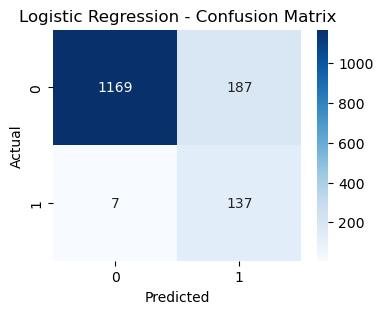


Classification Report for KNN (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3164
           1       1.00      1.00      1.00       336

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500


Classification Report for KNN (Test):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1356
           1       0.94      0.47      0.63       144

    accuracy                           0.95      1500
   macro avg       0.95      0.73      0.80      1500
weighted avg       0.95      0.95      0.94      1500



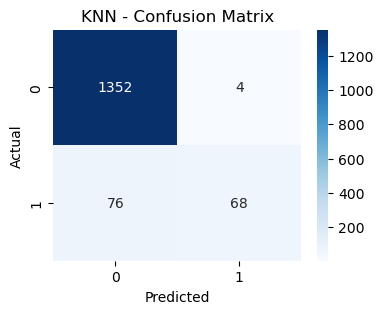


Classification Report for SVM (Train):
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      3164
           1       0.60      0.95      0.73       336

    accuracy                           0.93      3500
   macro avg       0.80      0.94      0.85      3500
weighted avg       0.96      0.93      0.94      3500


Classification Report for SVM (Test):
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1356
           1       0.55      0.94      0.69       144

    accuracy                           0.92      1500
   macro avg       0.77      0.93      0.82      1500
weighted avg       0.95      0.92      0.93      1500



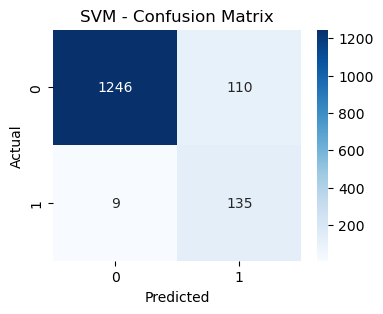


Classification Report for Decision Tree (Train):
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      3164
           1       0.46      1.00      0.63       336

    accuracy                           0.89      3500
   macro avg       0.73      0.94      0.78      3500
weighted avg       0.95      0.89      0.91      3500


Classification Report for Decision Tree (Test):
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1356
           1       0.49      0.99      0.65       144

    accuracy                           0.90      1500
   macro avg       0.74      0.94      0.80      1500
weighted avg       0.95      0.90      0.91      1500



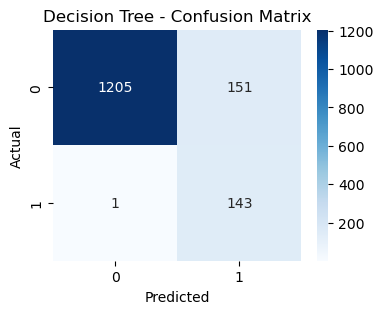


Classification Report for Random Forest (Train):
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      3164
           1       0.51      0.99      0.67       336

    accuracy                           0.91      3500
   macro avg       0.75      0.94      0.81      3500
weighted avg       0.95      0.91      0.92      3500


Classification Report for Random Forest (Test):
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1356
           1       0.49      0.97      0.65       144

    accuracy                           0.90      1500
   macro avg       0.74      0.93      0.80      1500
weighted avg       0.95      0.90      0.91      1500



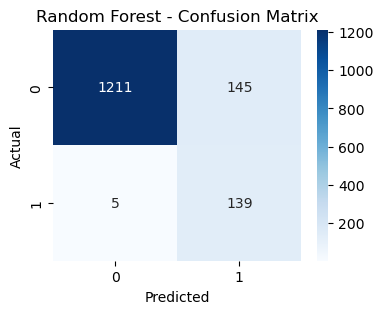


Classification Report for AdaBoost (Train):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3164
           1       0.93      0.72      0.81       336

    accuracy                           0.97      3500
   macro avg       0.95      0.86      0.90      3500
weighted avg       0.97      0.97      0.97      3500


Classification Report for AdaBoost (Test):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.92      0.76      0.83       144

    accuracy                           0.97      1500
   macro avg       0.95      0.87      0.91      1500
weighted avg       0.97      0.97      0.97      1500



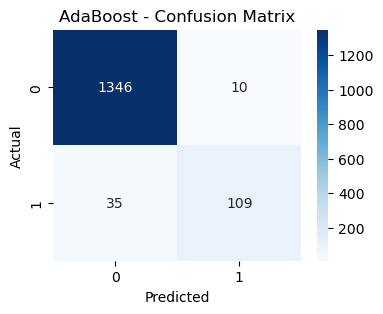


Classification Report for XGBoost (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3164
           1       0.99      0.96      0.98       336

    accuracy                           1.00      3500
   macro avg       0.99      0.98      0.99      3500
weighted avg       1.00      1.00      1.00      3500


Classification Report for XGBoost (Test):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.96      0.93      0.94       144

    accuracy                           0.99      1500
   macro avg       0.97      0.96      0.97      1500
weighted avg       0.99      0.99      0.99      1500



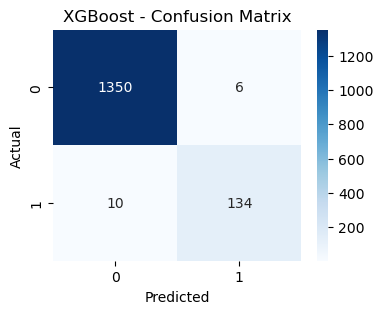


Classification Report for XGBoost (Manual) (Train):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3164
           1       0.99      0.93      0.96       336

    accuracy                           0.99      3500
   macro avg       0.99      0.97      0.98      3500
weighted avg       0.99      0.99      0.99      3500


Classification Report for XGBoost (Manual) (Test):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.96      0.94      0.95       144

    accuracy                           0.99      1500
   macro avg       0.98      0.97      0.97      1500
weighted avg       0.99      0.99      0.99      1500



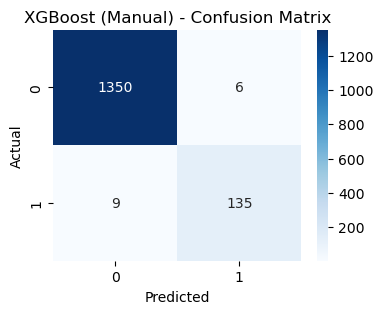

In [136]:
# Plot Confusion Matrices & Show Classification Reports ===
for name in focused_results:
    model = best_estimators[name]

    print(f"\nClassification Report for {name} (Train):")
    print(classification_report(y_train, model.predict(X_train_scaled)))

    print(f"\nClassification Report for {name} (Test):")
    print(classification_report(y_test, model.predict(X_test_scaled)))

    plt.figure(figsize=(4,3))
    sns.heatmap(focused_results[name]['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

### Plot ROC Curves
ROC is good when false positives and false negatives are equally costly.

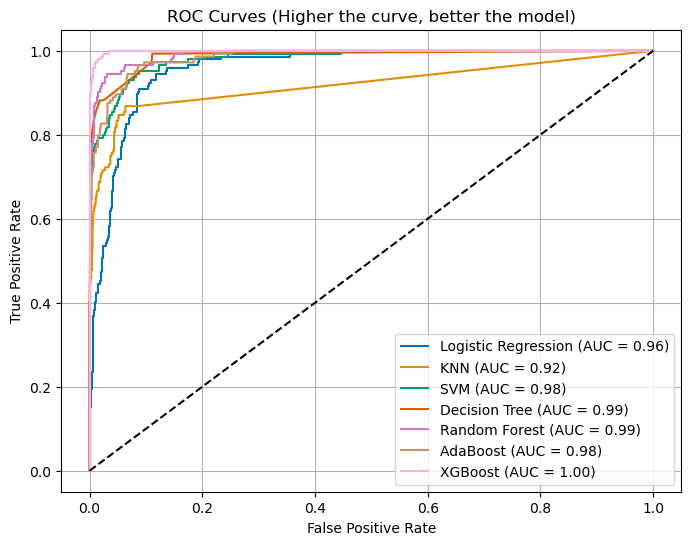

In [137]:
plt.figure(figsize=(8,6))
for name, y_proba in proba_dict.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")#, linewidth=1 + 1.5 * auc_score

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curves (Higher the curve, better the model)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


### Check whether we can further tune Precision-Recall Threshold for All Models

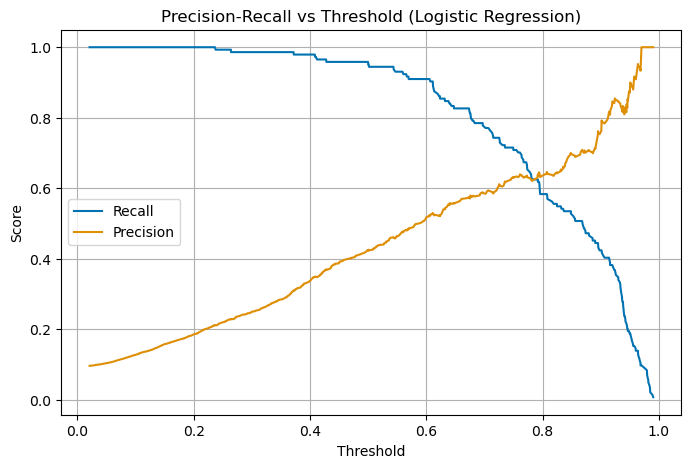

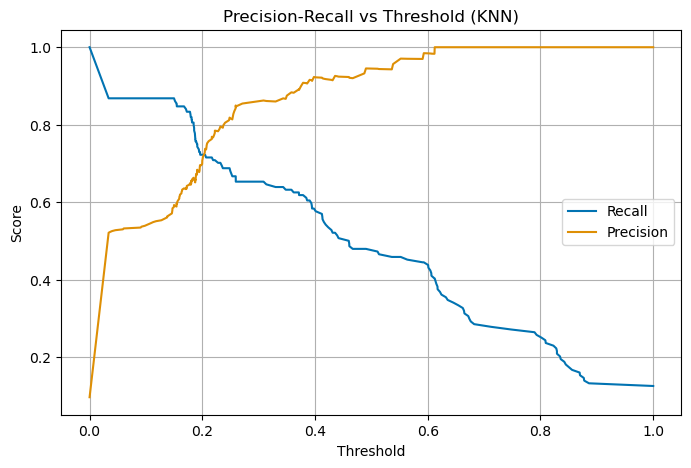

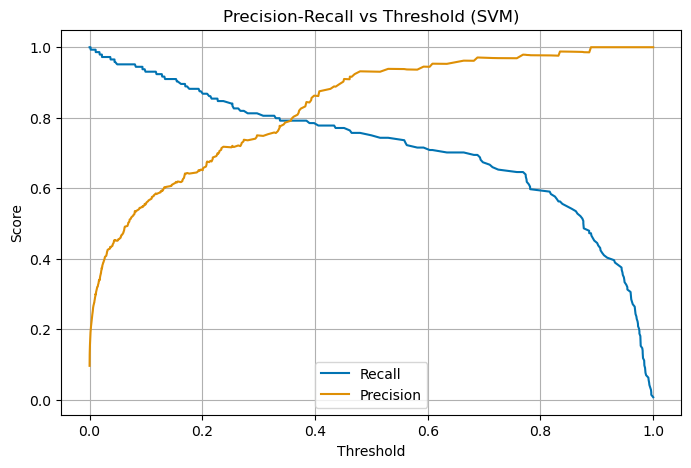

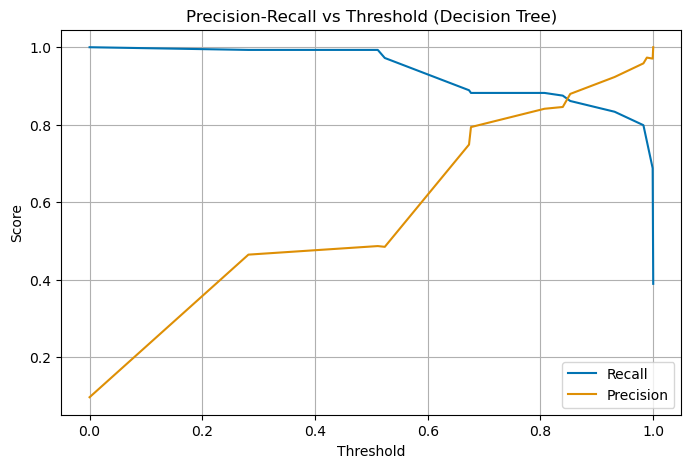

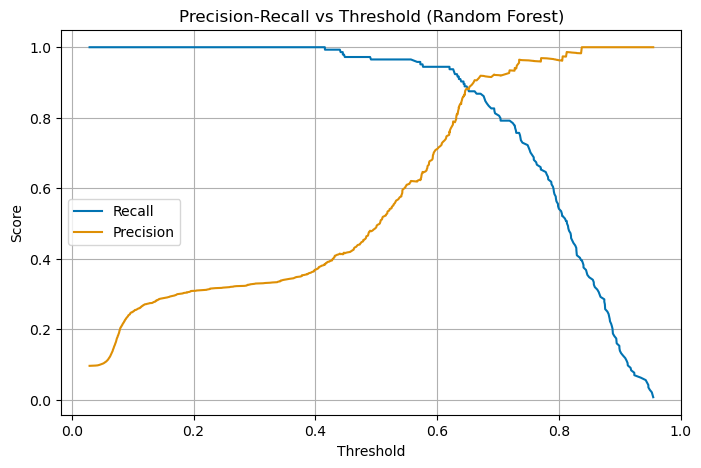

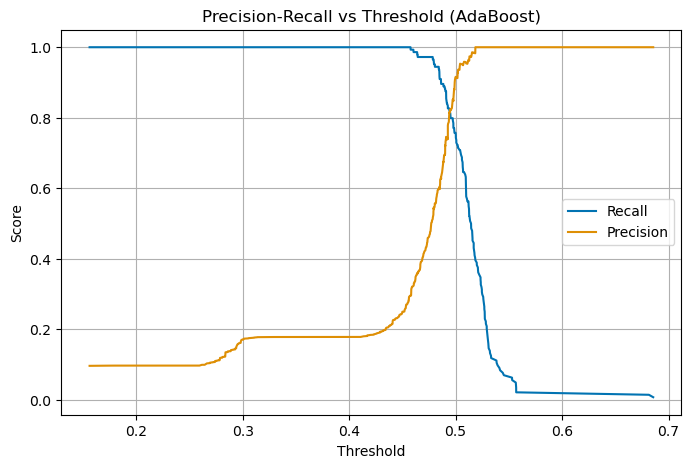

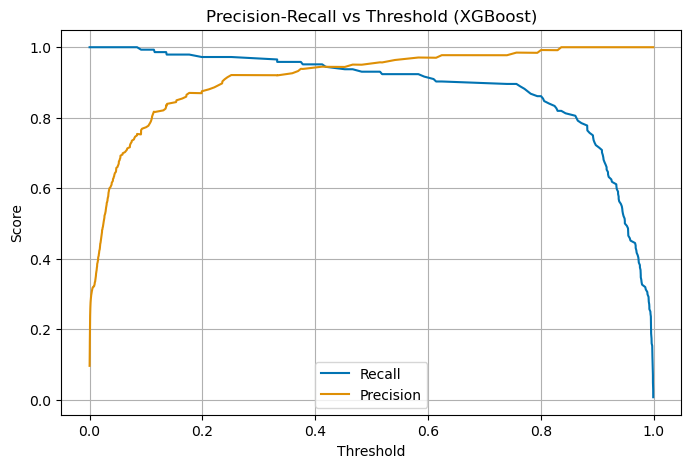

In [138]:
threshold_dict = {}
for name, y_scores in proba_dict.items():
    prec, rec, thresholds = precision_recall_curve(y_test, y_scores)
    plt.figure(figsize=(8,5))
    plt.plot(thresholds, rec[:-1], label='Recall')
    plt.plot(thresholds, prec[:-1], label='Precision')
    plt.title(f"Precision-Recall vs Threshold ({name})")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    plt.show()

### Plot Precision-Recall (PR) Curves
To assess how well a model identifies true positive cases without generating false positives.\
PR curve is more informative when classes are imbalanced, as it focuses on the minority class (here, loan buyers).

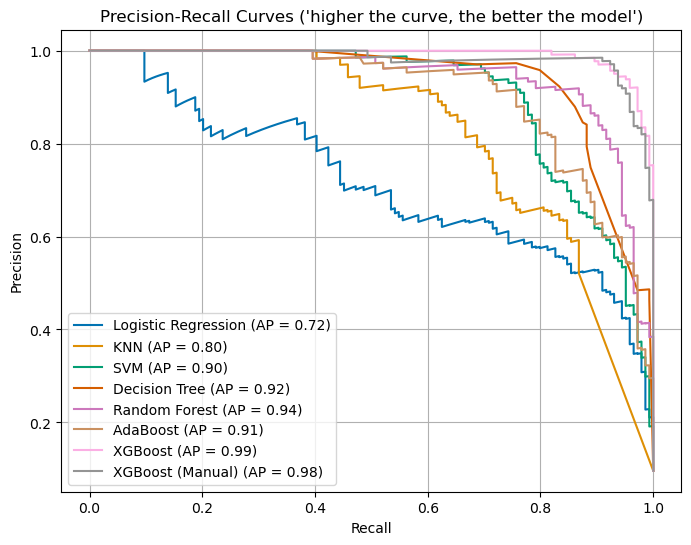

In [139]:
plt.figure(figsize=(8, 6))
for name, model in best_estimators.items():
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    avg_prec = average_precision_score(y_test, y_proba)
    plt.plot(recall, precision, label=f"{name} (AP = {avg_prec:.2f})")

plt.title(f"Precision-Recall Curves ('higher the curve, the better the model')")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()


### Feature Importance for Tree-based Models

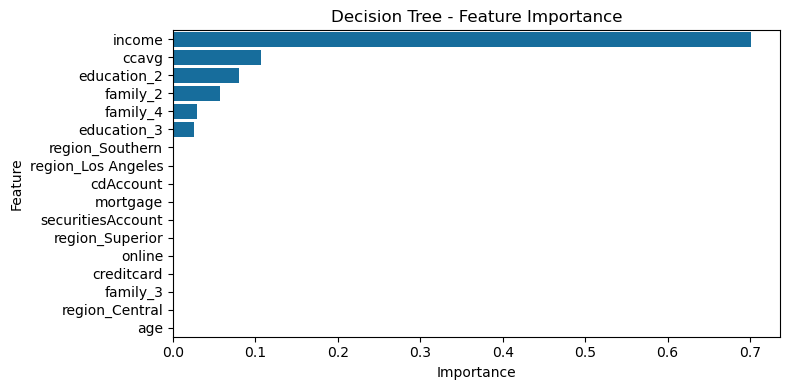

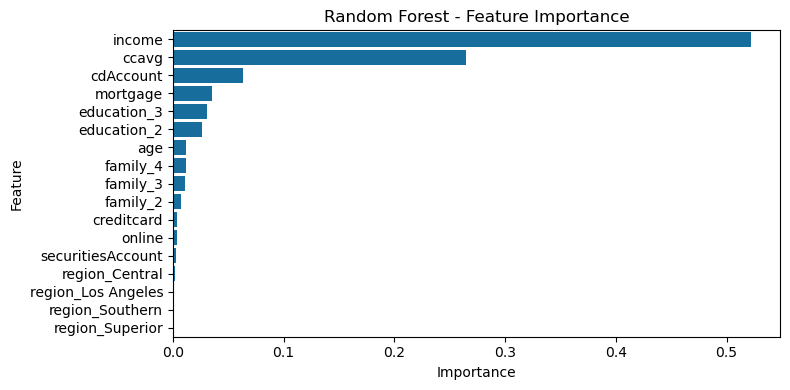

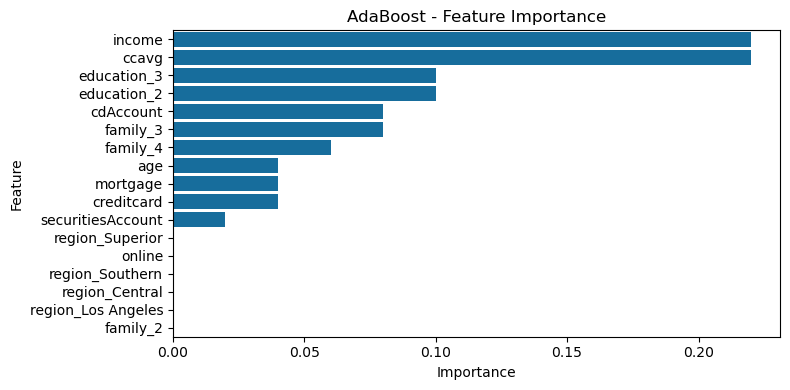

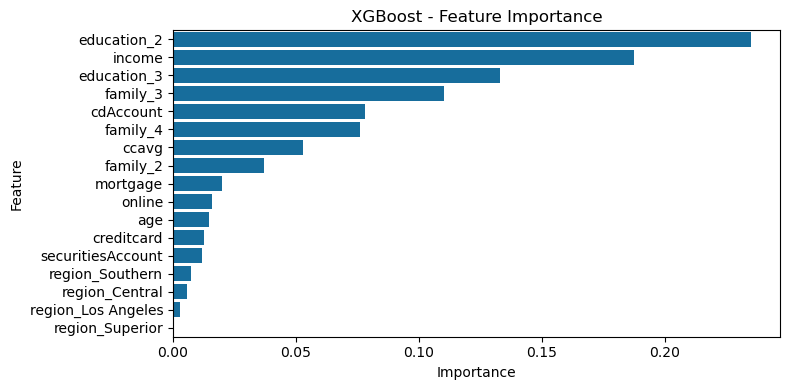

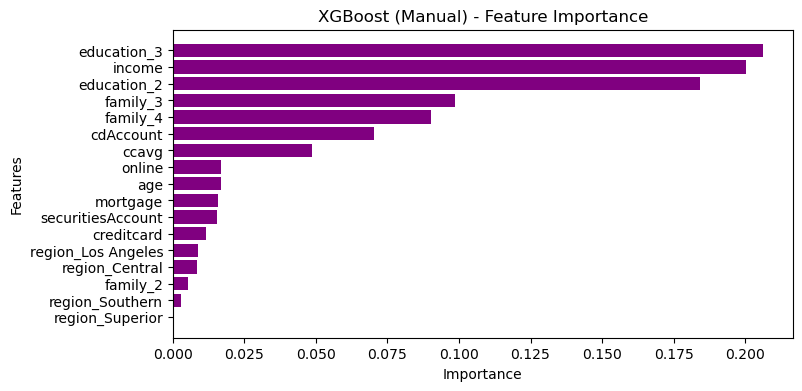

In [140]:
tree_models = ["Decision Tree", "Random Forest", "AdaBoost", "XGBoost"]
feature_names = X.columns

for name in tree_models:
    model = best_estimators[name]
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(8, 4))
        sns.barplot(x=importances[indices], y=feature_names[indices])
        plt.title(f"{name} - Feature Importance")
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()

# XGBoost (Manual)
imp = xgb_manual.feature_importances_
feature_n = X.columns

# Create a DataFrame and sort by importance
feature_importance_df = pd.DataFrame({"Feature": feature_n, "Importance": imp})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=True)  # Sort for correct bar order

# Plot sorted feature importance
plt.figure(figsize=(8, 4))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="purple")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("XGBoost (Manual) - Feature Importance")
plt.show()

### Visualize Decision Tree

<Figure size 4000x6000 with 0 Axes>

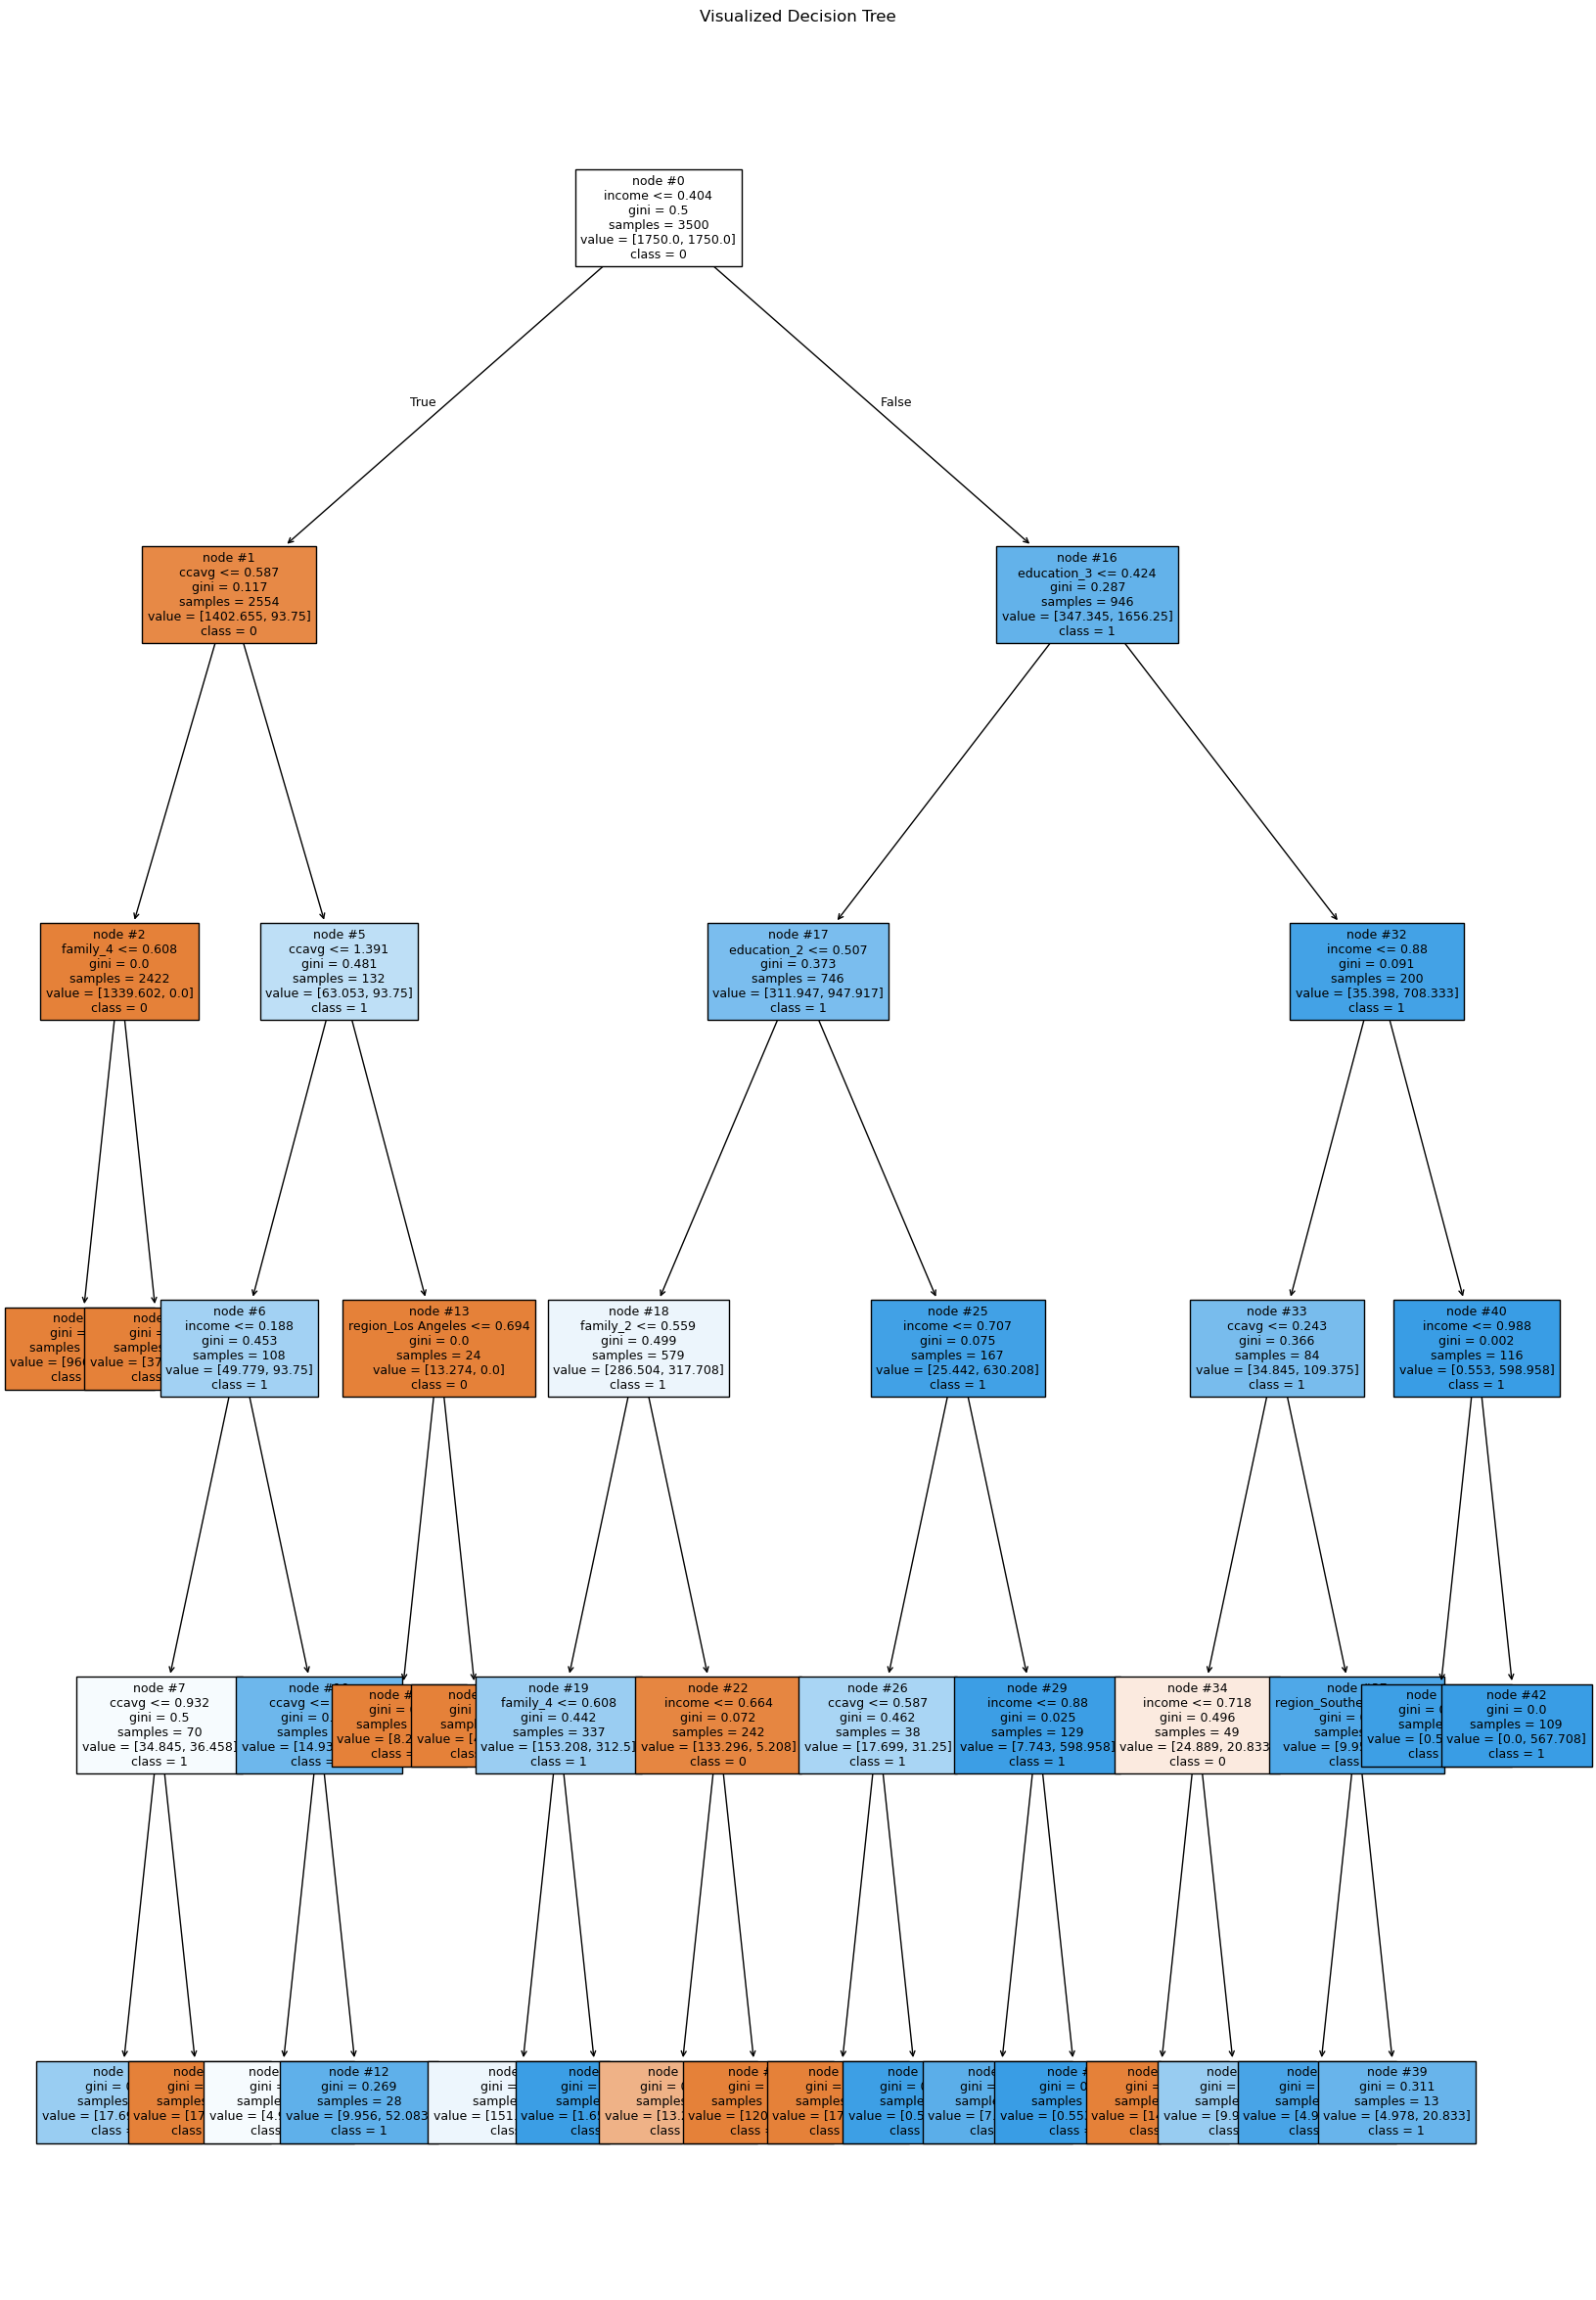

In [141]:
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn import tree

plt.figure(figsize=(40,60))
dt_model = best_estimators["Decision Tree"]
class_names = [str(cls) for cls in np.unique(y)]
plt.figure(figsize=(20, 30))
out = tree.plot_tree(dt_model, feature_names=feature_names, filled=True, fontsize=9, node_ids=True, class_names=class_names)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.title("Visualized Decision Tree")
plt.show()

### Text report showing the rules of a decision tree 

In [142]:
# from sklearn.tree import export_text
# Extract the decision tree rules as text
rules = export_text(dt_model, feature_names=feature_names)
# Print the rules
print(rules)

|--- income <= 0.40
|   |--- ccavg <= 0.59
|   |   |--- family_4 <= 0.61
|   |   |   |--- class: 0
|   |   |--- family_4 >  0.61
|   |   |   |--- class: 0
|   |--- ccavg >  0.59
|   |   |--- ccavg <= 1.39
|   |   |   |--- income <= 0.19
|   |   |   |   |--- ccavg <= 0.93
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- ccavg >  0.93
|   |   |   |   |   |--- class: 0
|   |   |   |--- income >  0.19
|   |   |   |   |--- ccavg <= 0.82
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- ccavg >  0.82
|   |   |   |   |   |--- class: 1
|   |   |--- ccavg >  1.39
|   |   |   |--- region_Los Angeles <= 0.69
|   |   |   |   |--- class: 0
|   |   |   |--- region_Los Angeles >  0.69
|   |   |   |   |--- class: 0
|--- income >  0.40
|   |--- education_3 <= 0.42
|   |   |--- education_2 <= 0.51
|   |   |   |--- family_2 <= 0.56
|   |   |   |   |--- family_4 <= 0.61
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- family_4 >  0.61
|   |   |   |   |   |--- class: 1
|   |   |   |--- fam

### Save Best Models

In [143]:
import joblib
for name, model in best_estimators.items():
    joblib.dump(model, f"{name.replace(' ', '_')}_model.pkl")
    print(f"Saved: {name.replace(' ', '_')}_model.pkl")

Saved: Logistic_Regression_model.pkl
Saved: KNN_model.pkl
Saved: SVM_model.pkl
Saved: Decision_Tree_model.pkl
Saved: Random_Forest_model.pkl
Saved: AdaBoost_model.pkl
Saved: XGBoost_model.pkl
Saved: XGBoost_(Manual)_model.pkl


### Why Save Models as .pkl Files?
- Preserves Model State -> Once trained, the model parameters and structure are stored for future use without retraining.
- Faster Deployment -> Instead of re-running training (which could take hours), you can instantly load the model and start making predictions.
- Avoids Redundant Computation -> No need to recompute feature engineering steps or hyperparameter tuning when reusing the model.
- Allows Reproducibility -> Ensures consistent predictions across different environments (production, research, etc.).
- Supports Large-Scale Systems -> Enables models to be integrated into applications, APIs, or pipelines without performance loss

### Conclusion

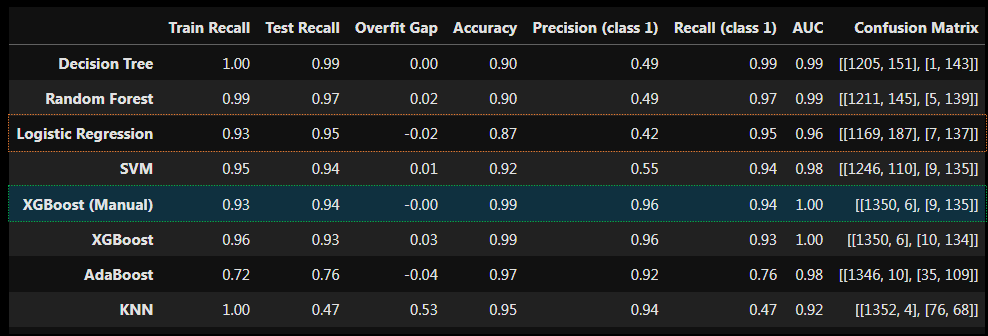


In [144]:
print("\n* Final Model Comparison Summary:")
print(results_df[['Accuracy', 'Precision (class 1)', 'Test Recall', 'AUC']])

# Extract the top 3 models
best_model_names = results_df.index[:3]

print("\n* Best Performing Models (based on Recall):")
for model_name in best_model_names:
    best_model_metrics = results_df.loc[model_name]  # Get metrics for each model
    
    print(f"\nModel\t\t: {model_name}")
    print(f"Recall (Test)\t: {best_model_metrics['Test Recall']:.2f}")
    print(f"Accuracy\t: {best_model_metrics['Accuracy']:.2f}")
    print(f"Precision\t: {best_model_metrics['Precision (class 1)']:.2f}")
    print(f"AUC\t\t: {best_model_metrics['AUC']:.2f}")

print("\n* Recommendation:")
print(f"The models {', '.join(best_model_names)} are best suited for identifying potential personal loan buyers, "
      f"as they achieve the highest recall, ensuring fewer actual loan buyers are missed.")


* Final Model Comparison Summary:
                    Accuracy Precision (class 1) Test Recall  AUC
Decision Tree           0.90                0.49        0.99 0.99
Random Forest           0.90                0.49        0.97 0.99
Logistic Regression     0.87                0.42        0.95 0.96
SVM                     0.92                0.55        0.94 0.98
XGBoost (Manual)        0.99                0.96        0.94 1.00
XGBoost                 0.99                0.96        0.93 1.00
AdaBoost                0.97                0.92        0.76 0.98
KNN                     0.95                0.94        0.47 0.92

* Best Performing Models (based on Recall):

Model		: Decision Tree
Recall (Test)	: 0.99
Accuracy	: 0.90
Precision	: 0.49
AUC		: 0.99

Model		: Random Forest
Recall (Test)	: 0.97
Accuracy	: 0.90
Precision	: 0.49
AUC		: 0.99

Model		: Logistic Regression
Recall (Test)	: 0.95
Accuracy	: 0.87
Precision	: 0.42
AUC		: 0.96

* Recommendation:
The models Decision Tree, Rando

- We analyzed the Personal Loan campaign data using EDA and by using different models like Logistic Regression and Decision Tree Classifier to build a likelihood of Customer buying Loan.
- We used performance metric Recall to assess the model performance. The most important features for classification were Income, Education, CD account ,Family and CCAvg.
- Coefficient of Income, Graduate and Advanced Education, Family_3,Family 4,CCavg,CD account,Age, are positive , ie a one unit increase in these will lead to increase in chances of a person borrowing loan
- Coefficient of Securities account,online ,Family_2 credit card are negative increase in these will lead to decrease in chances of a person borrowing a loan.
- We also improved the performance using GridSearch and Hyperparameter tuning. 
- Decision tree can easily overfit. They require less data preprocessing compared to logistic Regression and are easy to understand.
- Income, Customers with graduate degree, customers having 3 family members are some of the most important variables in predicting if the customers will purchase a personal loan.

### Recommendation

Decision trees doesn't require to much data preparation or handling of outliers like logistic regression. \
They are easy to understand. Decision tress can easily overfit , so we have to be careful using decision tree.

- Based on EDA, logistic Regression , Decision tree , Income ,Educatoin,Family,CCavg are most important features.
- Customers who have income above 90k dollars, Advance/graduate level education, a family of more than 2, such \
  customers have higher chances of taking personal loans.
- For this campaign we can have different profiles for customers.
  High Profile Clients :-Higher income,Advanced/Graduate level education, 3 /4 Family members,high spending
  Average Profile :- Medium income group, Graduate level education.3-4Family members, medium spending
  Low Profile:-Lower income group,undergrads ,3-4 Family Emmber, low spending
- For the upcoming campaign We can first focus on high profile customers, by providing them with a personal \
  relationship managers who can address there concerns and can pursue them to buy loan from the bank with completive interest rates.
- Prequalifying for Loan can also attract more customers.
- Second target segment would be Medium profile customers.
- However, the models cannot identify well if there are some extraordinary cases when low profile customer is ready to buy a personal loan.

### Thank you!

2025-06-03